## Problem Statement

### Business Problem:

A FMCG company has entered into the instant noodles business two years back. Their higher management has notices that there is a miss match in the demand and supply. Where the demand is high, supply is pretty low and where the demand is low, supply is pretty high. In both the ways it is an inventory cost loss to the company; hence, the higher management wants to optimize the supply quantity in each and every warehouse in entire country.

Goal & Objective: The objective of this exercise is to build a model, using historical data that will determine an optimum weight of the product to be shipped each time to the warehouse.

Also try to analysis the demand pattern in different pockets of the country so management can drive the advertisement campaign particular in those pockets.

This is the first phase of the agreement; hence, company has shared very limited information. Once you are able to showcase a tangible impact with this much of information then company will open the 360 degree data lake for your consulting company to build a more robust model.

In [389]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [390]:
df = pd.read_csv("C:/Users/Anshul/OneDrive/Desktop/Data Science GL/Capstone Project/Data.csv")


In [391]:
pd.options.display.max_columns = None

In [392]:
pd.options.display.max_rows= None

In [393]:
df.head()

Ware_house_ID WH_Manager_ID Location_type WH_capacity_size   zone  \
0     WH_100000     EID_50000         Urban            Small   West   
1     WH_100001     EID_50001         Rural            Large  North   
2     WH_100002     EID_50002         Rural              Mid  South   
3     WH_100003     EID_50003         Rural              Mid  North   
4     WH_100004     EID_50004         Rural            Large  North   

  WH_regional_zone  num_refill_req_l3m  transport_issue_l1y  \
0           Zone 6                   3                    1   
1           Zone 5                   0                    0   
2           Zone 2                   1                    0   
3           Zone 3                   7                    4   
4           Zone 5                   3                    1   

   Competitor_in_mkt  retail_shop_num  wh_owner_type  distributor_num  \
0                  2             4651         Rented               24   
1                  4             6217  Company Owned               47   
2                  4             4306  Company Owned               64   
3                  2             6000         Rented               50   
4                  2             4740  Company Owned               42   

   flood_impacted  flood_proof  electric_supply  dist_from_hub  workers_num  \
0               0            1                1             91         29.0   
1               0            0                1            210         31.0   
2               0            0                0            161         37.0   
3               0            0                0            103         21.0   
4               1            0                1            112         25.0   

   wh_est_year  storage_issue_reported_l3m  temp_reg_mach  \
0          NaN                          13              0   
1          NaN                           4              0   
2          NaN                          17              0   
3          NaN                          17              1   
4       2009.0                          18              0   

  approved_wh_govt_certificate  wh_breakdown_l3m  govt_check_l3m  \
0                            A                 5              15   
1                            A                 3              17   
2                            A                 6              22   
3                           A+                 3              27   
4                            C                 6              24   

   product_wg_ton  
0           17115  
1            5074  
2           23137  
3           22115  
4           24071

In [394]:
df.duplicated().sum()

0

In [395]:
pd.DataFrame(df.columns)

0
0                  Ware_house_ID
1                  WH_Manager_ID
2                  Location_type
3               WH_capacity_size
4                           zone
5               WH_regional_zone
6             num_refill_req_l3m
7            transport_issue_l1y
8              Competitor_in_mkt
9                retail_shop_num
10                 wh_owner_type
11               distributor_num
12                flood_impacted
13                   flood_proof
14               electric_supply
15                 dist_from_hub
16                   workers_num
17                   wh_est_year
18    storage_issue_reported_l3m
19                 temp_reg_mach
20  approved_wh_govt_certificate
21              wh_breakdown_l3m
22                govt_check_l3m
23                product_wg_ton

In [396]:
df.shape

(25000, 24)

## Looking at data information and types

In [397]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ware_house_ID                 25000 non-null  object 
 1   WH_Manager_ID                 25000 non-null  object 
 2   Location_type                 25000 non-null  object 
 3   WH_capacity_size              25000 non-null  object 
 4   zone                          25000 non-null  object 
 5   WH_regional_zone              25000 non-null  object 
 6   num_refill_req_l3m            25000 non-null  int64  
 7   transport_issue_l1y           25000 non-null  int64  
 8   Competitor_in_mkt             25000 non-null  int64  
 9   retail_shop_num               25000 non-null  int64  
 10  wh_owner_type                 25000 non-null  object 
 11  distributor_num               25000 non-null  int64  
 12  flood_impacted                25000 non-null  int64  
 13  f

In [398]:
## From above we can see that there 8 columns which are object type

In [399]:
df.isnull().sum()

Ware_house_ID                       0
WH_Manager_ID                       0
Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [400]:
df.describe(include = ("int","float")).T

count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
Competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
flood_impacted              25000.0      0.098160      0.297537     0.0   
flood_proof                 25000.0      0.054640      0.227281     0.0   
electric_supply             25000.0      0.656880      0.474761     0.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 24010.0     28.944398      7.872534    10.0   
wh_est_year                 13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108     0.0   
temp_reg_mach               25000.0      0.303280      0.459684     0.0   
wh_breakdown_l3m            25000.0      3.482040      1.690335     0.0   
govt_check_l3m              25000.0     18.812280      8.632382     1.0   
product_wg_ton              25000.0  22102.632920  11607.755077  2065.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
Competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4313.0   4859.0   5500.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
flood_impacted                  0.0      0.0      0.0      1.0  
flood_proof                     0.0      0.0      0.0      1.0  
electric_supply                 0.0      1.0      1.0      1.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
wh_est_year                  2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
temp_reg_mach                   0.0      0.0      1.0      1.0  
wh_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13059.0  22101.0  30103.0  55151.0

In [401]:
df.describe(include = "object").T

count unique            top   freq
Ware_house_ID                 25000  25000      WH_100000      1
WH_Manager_ID                 25000  25000      EID_50000      1
Location_type                 25000      2          Rural  22957
WH_capacity_size              25000      3          Large  10169
zone                          25000      4          North  10278
WH_regional_zone              25000      6         Zone 6   8339
wh_owner_type                 25000      2  Company Owned  13578
approved_wh_govt_certificate  24092      5              C   5501

workers_num, wh_est_year, approved_wh_govt_certificate have missing values

## Dropping "Ware_house_ID" & "WH_Manager_ID"

In [402]:
df = df.drop( ["Ware_house_ID","WH_Manager_ID"], axis = 1)

In [403]:
df.shape

(25000, 22)

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  object 
 1   WH_capacity_size              25000 non-null  object 
 2   zone                          25000 non-null  object 
 3   WH_regional_zone              25000 non-null  object 
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  object 
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int64  
 11  flood_proof                   25000 non-null  int64  
 12  electric_supply               25000 non-null  int64  
 13  d

In [405]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate      908
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [406]:
(990/25000)*100

3.9600000000000004

In [407]:
(11881/25000)*100

47.524

In [408]:
(908/25000)*100

3.6319999999999997

In [409]:
#pip install missingno

In [410]:
import missingno as msno

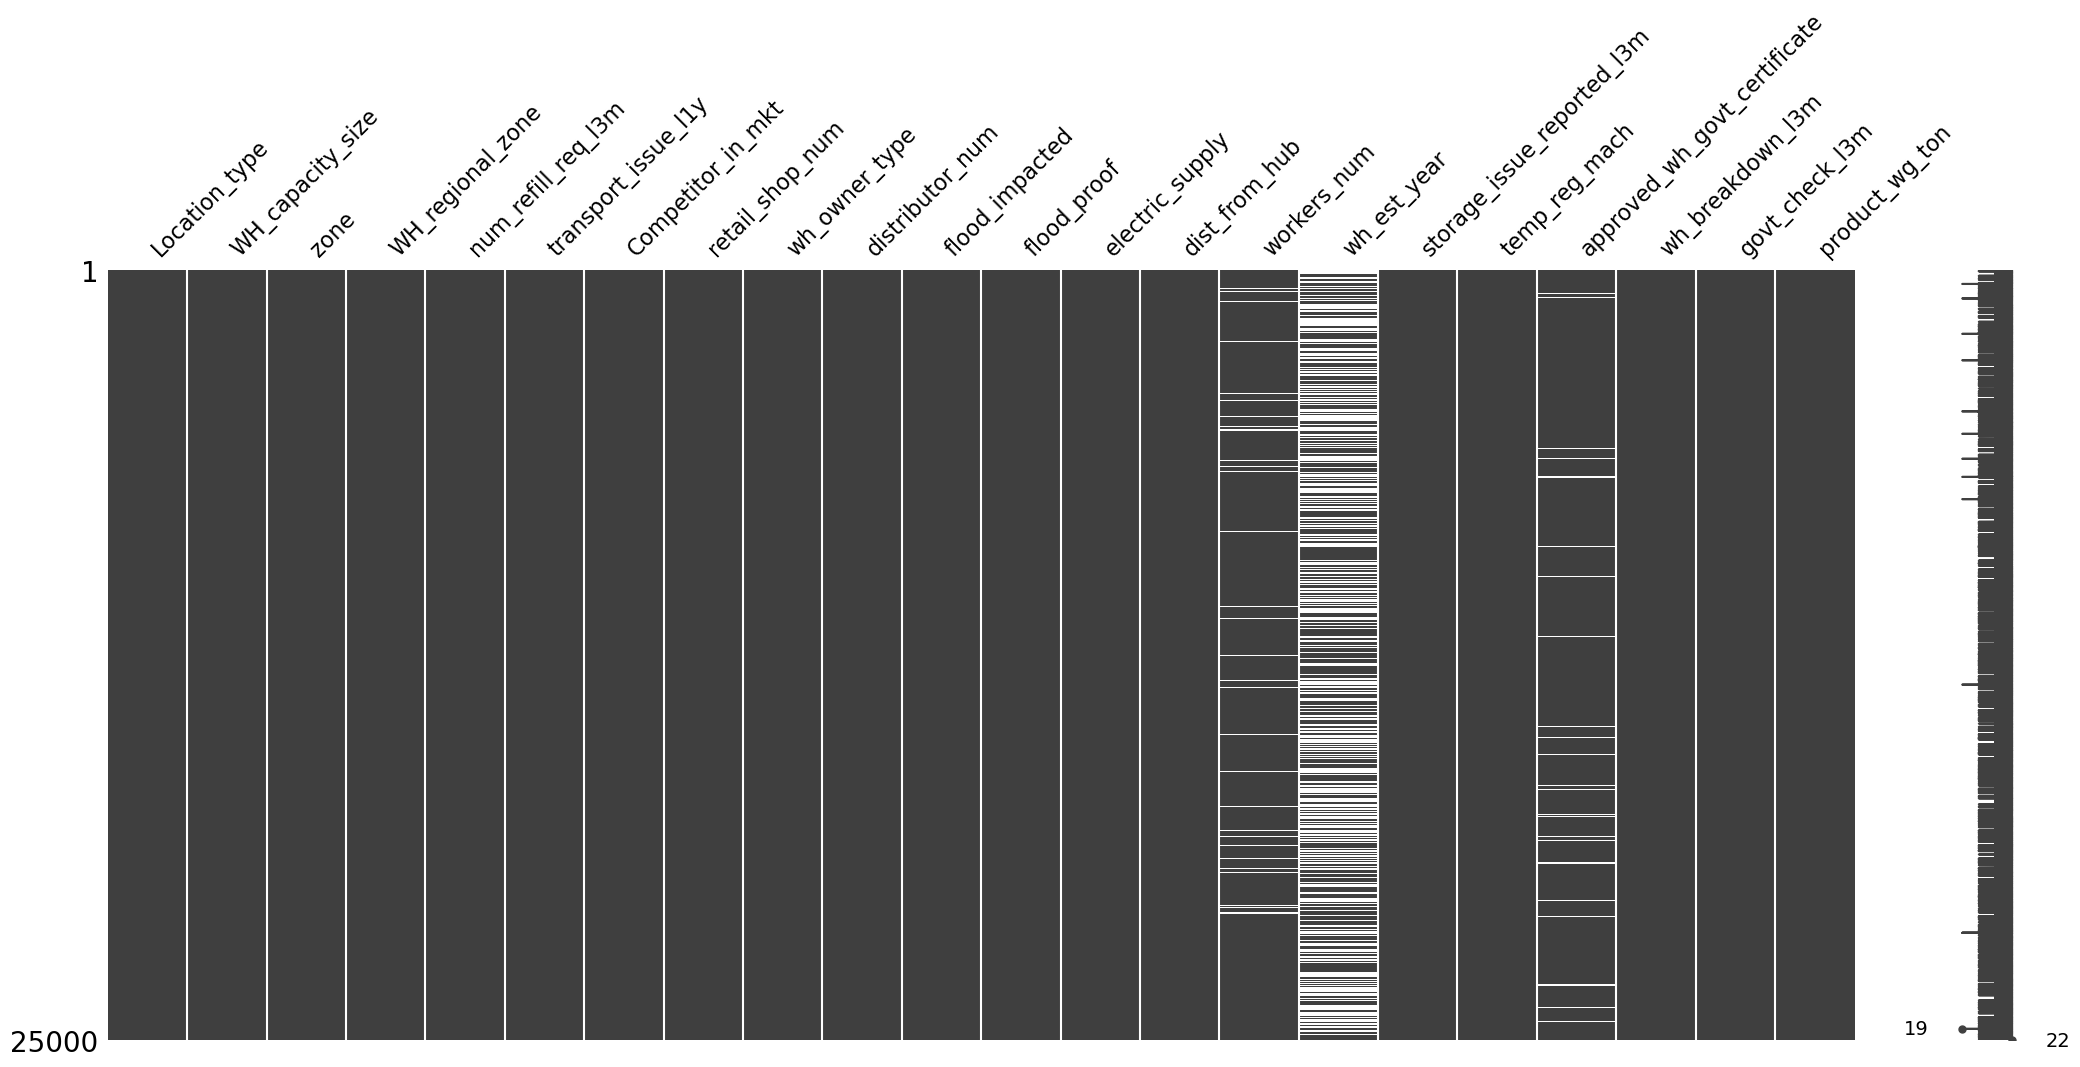

In [411]:
msno.matrix(df);

workers_num, wh_est_year, approved_wh_govt_certificate have missing values

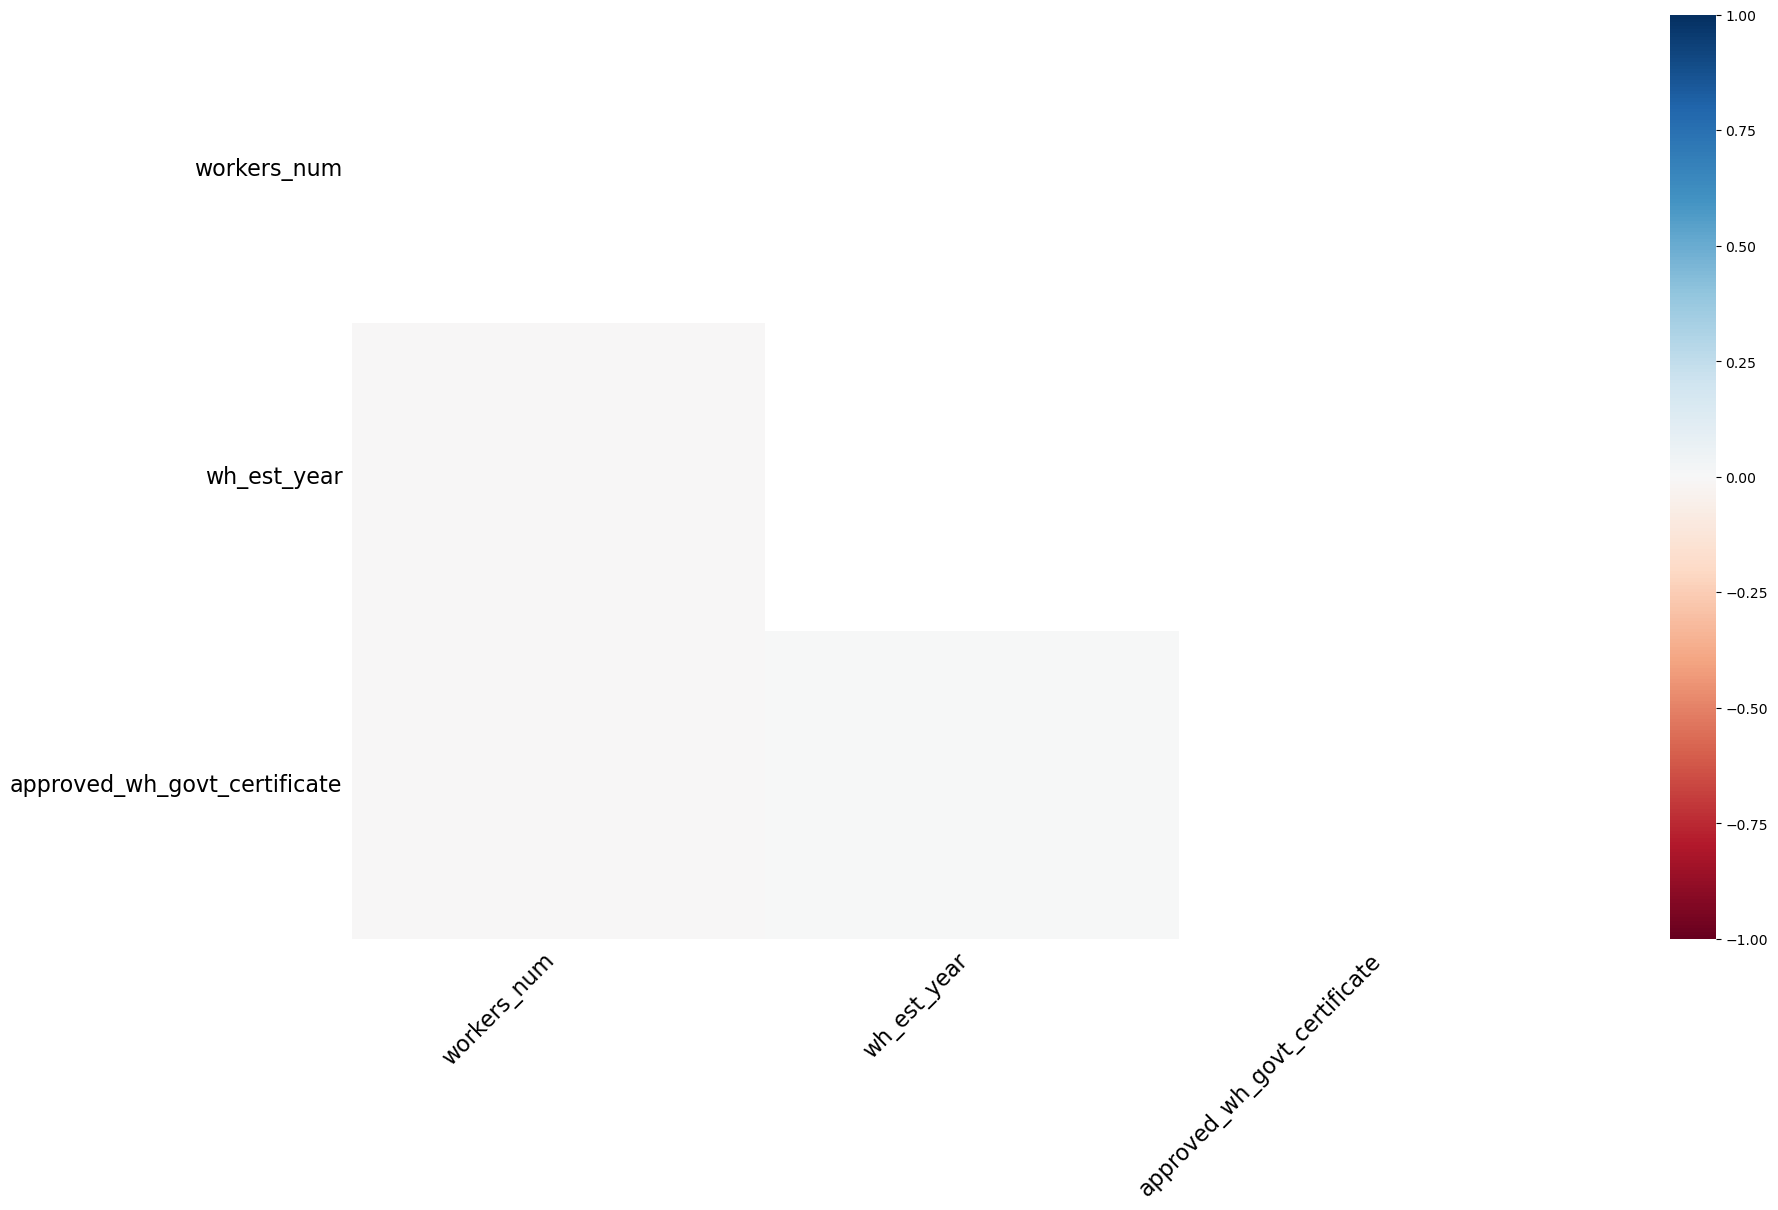

In [412]:
msno.heatmap(df);

#MCAR, MAR, MNAR

The workers_num & approved_wh_govt_certificate  can be considered as MCAR because of two reasons:
The proportion of values is small
Missing values are scattered entirely in the dataset

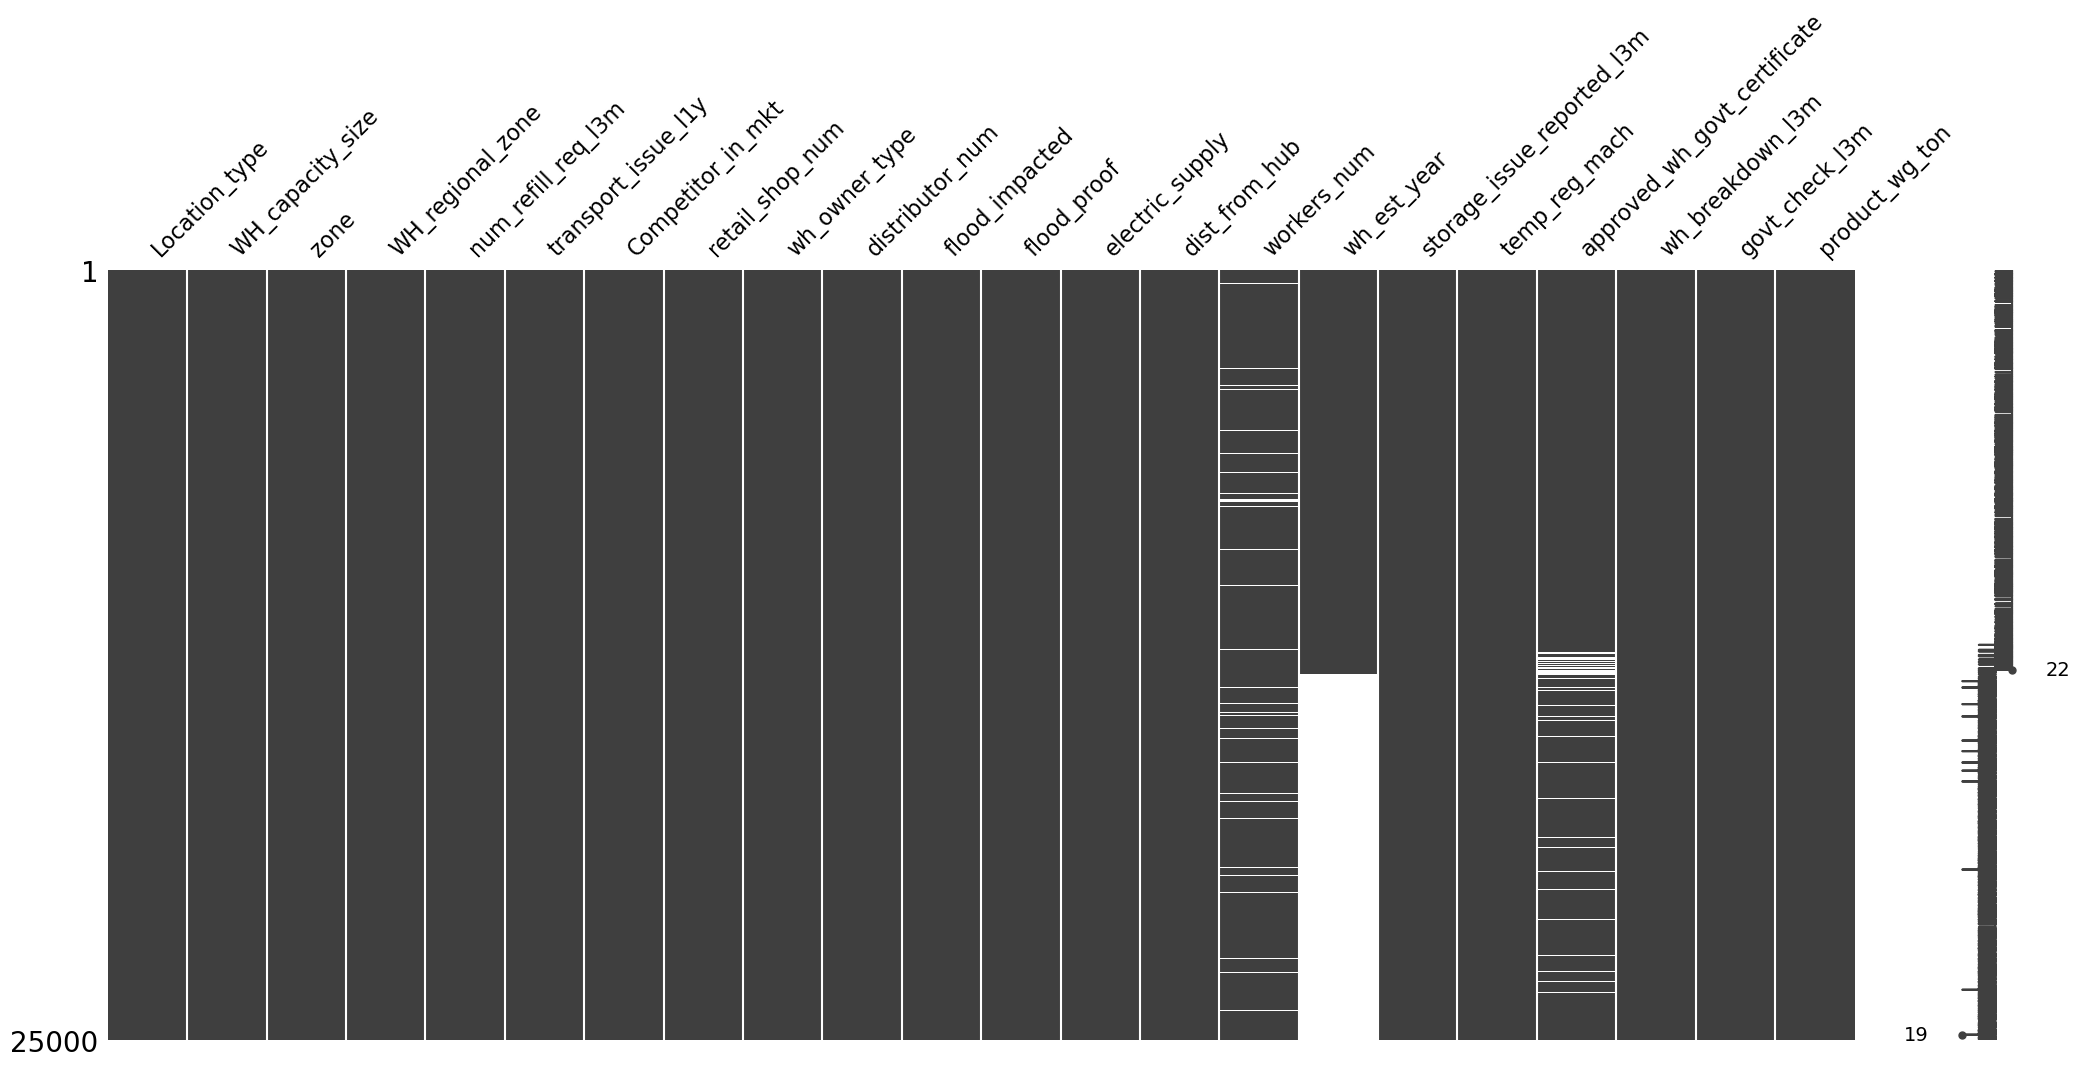

In [413]:
msno.matrix(df.sort_values("wh_est_year"));

the plot shows if a datapoint is missing in approved_wh_govt_certificate, then it is also missing in wh_est_year and vice versa.
although both have weak correlation, but has some relationship. In other words it is not missing at random MAR

In [414]:
df.describe(include = 'object').T

count unique            top   freq
Location_type                 25000      2          Rural  22957
WH_capacity_size              25000      3          Large  10169
zone                          25000      4          North  10278
WH_regional_zone              25000      6         Zone 6   8339
wh_owner_type                 25000      2  Company Owned  13578
approved_wh_govt_certificate  24092      5              C   5501

Changing flood_impacted, flood_proof, electric_supply, temp_reg_mach to categorical type

In [415]:
df["flood_impacted"] = df["flood_impacted"].astype('category')
df["flood_proof"] = df["flood_proof"].astype('category')
df["electric_supply"] = df["electric_supply"].astype('category')
df["temp_reg_mach"] = df["temp_reg_mach"].astype('category')

In [416]:
df.describe(include = 'category').T

count  unique  top   freq
flood_impacted   25000       2    0  22546
flood_proof      25000       2    0  23634
electric_supply  25000       2    1  16422
temp_reg_mach    25000       2    0  17418

In [417]:
df_num = df.select_dtypes(include=('int', 'float'))
df_cat = df.select_dtypes(include=('object','category'))
df_cat.head()

Location_type WH_capacity_size   zone WH_regional_zone  wh_owner_type  \
0         Urban            Small   West           Zone 6         Rented   
1         Rural            Large  North           Zone 5  Company Owned   
2         Rural              Mid  South           Zone 2  Company Owned   
3         Rural              Mid  North           Zone 3         Rented   
4         Rural            Large  North           Zone 5  Company Owned   

  flood_impacted flood_proof electric_supply temp_reg_mach  \
0              0           1               1             0   
1              0           0               1             0   
2              0           0               0             0   
3              0           0               0             1   
4              1           0               1             0   

  approved_wh_govt_certificate  
0                            A  
1                            A  
2                            A  
3                           A+  
4                            C

In [418]:
df.describe(include = ('int','float')).T

count          mean           std     min  \
num_refill_req_l3m          25000.0      4.089040      2.606612     0.0   
transport_issue_l1y         25000.0      0.773680      1.199449     0.0   
Competitor_in_mkt           25000.0      3.104200      1.141663     0.0   
retail_shop_num             25000.0   4985.711560   1052.825252  1821.0   
distributor_num             25000.0     42.418120     16.064329    15.0   
dist_from_hub               25000.0    163.537320     62.718609    55.0   
workers_num                 24010.0     28.944398      7.872534    10.0   
wh_est_year                 13119.0   2009.383185      7.528230  1996.0   
storage_issue_reported_l3m  25000.0     17.130440      9.161108     0.0   
wh_breakdown_l3m            25000.0      3.482040      1.690335     0.0   
govt_check_l3m              25000.0     18.812280      8.632382     1.0   
product_wg_ton              25000.0  22102.632920  11607.755077  2065.0   

                                25%      50%      75%      max  
num_refill_req_l3m              2.0      4.0      6.0      8.0  
transport_issue_l1y             0.0      0.0      1.0      5.0  
Competitor_in_mkt               2.0      3.0      4.0     12.0  
retail_shop_num              4313.0   4859.0   5500.0  11008.0  
distributor_num                29.0     42.0     56.0     70.0  
dist_from_hub                 109.0    164.0    218.0    271.0  
workers_num                    24.0     28.0     33.0     98.0  
wh_est_year                  2003.0   2009.0   2016.0   2023.0  
storage_issue_reported_l3m     10.0     18.0     24.0     39.0  
wh_breakdown_l3m                2.0      3.0      5.0      6.0  
govt_check_l3m                 11.0     21.0     26.0     32.0  
product_wg_ton              13059.0  22101.0  30103.0  55151.0

## Cleaning data

In [419]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

Location_type
Rural    22957
Urban     2043
Name: Location_type, dtype: int64


WH_capacity_size
Large    10169
Mid      10020
Small     4811
Name: WH_capacity_size, dtype: int64


zone
North    10278
West      7931
South     6362
East       429
Name: zone, dtype: int64


WH_regional_zone
Zone 6    8339
Zone 5    4587
Zone 4    4176
Zone 2    2963
Zone 3    2881
Zone 1    2054
Name: WH_regional_zone, dtype: int64


wh_owner_type
Company Owned    13578
Rented           11422
Name: wh_owner_type, dtype: int64


approved_wh_govt_certificate
C     5501
B+    4917
B     4812
A     4671
A+    4191
Name: approved_wh_govt_certificate, dtype: int64




In [420]:
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts(normalize = True))
        print('\n')

Location_type
Rural    0.91828
Urban    0.08172
Name: Location_type, dtype: float64


WH_capacity_size
Large    0.40676
Mid      0.40080
Small    0.19244
Name: WH_capacity_size, dtype: float64


zone
North    0.41112
West     0.31724
South    0.25448
East     0.01716
Name: zone, dtype: float64


WH_regional_zone
Zone 6    0.33356
Zone 5    0.18348
Zone 4    0.16704
Zone 2    0.11852
Zone 3    0.11524
Zone 1    0.08216
Name: WH_regional_zone, dtype: float64


wh_owner_type
Company Owned    0.54312
Rented           0.45688
Name: wh_owner_type, dtype: float64


approved_wh_govt_certificate
C     0.228333
B+    0.204093
B     0.199734
A     0.193882
A+    0.173958
Name: approved_wh_govt_certificate, dtype: float64




In [421]:
for feature in df.columns: 
    if df[feature].dtype == 'category': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

flood_impacted
0    22546
1     2454
Name: flood_impacted, dtype: int64


flood_proof
0    23634
1     1366
Name: flood_proof, dtype: int64


electric_supply
1    16422
0     8578
Name: electric_supply, dtype: int64


temp_reg_mach
0    17418
1     7582
Name: temp_reg_mach, dtype: int64




In [422]:
for feature in df.columns: 
    if df[feature].dtype == 'category': 
        print(feature)
        print(df[feature].value_counts(normalize = True))
        print('\n')

flood_impacted
0    0.90184
1    0.09816
Name: flood_impacted, dtype: float64


flood_proof
0    0.94536
1    0.05464
Name: flood_proof, dtype: float64


electric_supply
1    0.65688
0    0.34312
Name: electric_supply, dtype: float64


temp_reg_mach
0    0.69672
1    0.30328
Name: temp_reg_mach, dtype: float64




We will impute the "approved_wh_govt_certificate" with mode as this is categorical data

In [423]:
print(df["approved_wh_govt_certificate"].mode())

0    C
Name: approved_wh_govt_certificate, dtype: object


In [424]:
df["approved_wh_govt_certificate"] = df["approved_wh_govt_certificate"].replace(np.NaN, "C")

In [425]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 25000 non-null  object  
 1   WH_capacity_size              25000 non-null  object  
 2   zone                          25000 non-null  object  
 3   WH_regional_zone              25000 non-null  object  
 4   num_refill_req_l3m            25000 non-null  int64   
 5   transport_issue_l1y           25000 non-null  int64   
 6   Competitor_in_mkt             25000 non-null  int64   
 7   retail_shop_num               25000 non-null  int64   
 8   wh_owner_type                 25000 non-null  object  
 9   distributor_num               25000 non-null  int64   
 10  flood_impacted                25000 non-null  category
 11  flood_proof                   25000 non-null  category
 12  electric_supply               25000 non-null  

In [426]:
df.isnull().sum()

Location_type                       0
WH_capacity_size                    0
zone                                0
WH_regional_zone                    0
num_refill_req_l3m                  0
transport_issue_l1y                 0
Competitor_in_mkt                   0
retail_shop_num                     0
wh_owner_type                       0
distributor_num                     0
flood_impacted                      0
flood_proof                         0
electric_supply                     0
dist_from_hub                       0
workers_num                       990
wh_est_year                     11881
storage_issue_reported_l3m          0
temp_reg_mach                       0
approved_wh_govt_certificate        0
wh_breakdown_l3m                    0
govt_check_l3m                      0
product_wg_ton                      0
dtype: int64

In [427]:
#Imputing Continuous Null values"workers_num " & "wh_est_year" with KNN imputer

In [428]:
from sklearn.impute import KNNImputer

In [429]:
Imputer = KNNImputer(n_neighbors=5)

One thing to note here is that the KNN Imputer does not recognize object data values. It will generate errors if we do not change these values to numerical values.Also for regression model, we need to Encode the data (having string values) for Modelling. Also we need to scaling for KNNImputer.

In [430]:
df['Location_type'] = pd.Categorical(df['Location_type']).codes

In [431]:
df['zone'] = pd.Categorical(df['zone']).codes

In [432]:
df['WH_regional_zone'] = pd.Categorical(df['WH_regional_zone']).codes

In [433]:
df['wh_owner_type'] = pd.Categorical(df['wh_owner_type']).codes

In [434]:
df['approved_wh_govt_certificate'] = pd.Categorical(df['approved_wh_govt_certificate']).codes

In [435]:
df['WH_capacity_size'] = np.where(df['WH_capacity_size'] == "Small", "0",df['WH_capacity_size'])
df['WH_capacity_size'] = np.where(df['WH_capacity_size'] == "Mid", "1",df['WH_capacity_size'])
df['WH_capacity_size'] = np.where(df['WH_capacity_size'] == "Large", "2",df['WH_capacity_size'])

In [436]:
df['WH_capacity_size'] = pd.Categorical(df['WH_capacity_size'], ordered=True).codes 

In [437]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Location_type                 25000 non-null  int8    
 1   WH_capacity_size              25000 non-null  int8    
 2   zone                          25000 non-null  int8    
 3   WH_regional_zone              25000 non-null  int8    
 4   num_refill_req_l3m            25000 non-null  int64   
 5   transport_issue_l1y           25000 non-null  int64   
 6   Competitor_in_mkt             25000 non-null  int64   
 7   retail_shop_num               25000 non-null  int64   
 8   wh_owner_type                 25000 non-null  int8    
 9   distributor_num               25000 non-null  int64   
 10  flood_impacted                25000 non-null  category
 11  flood_proof                   25000 non-null  category
 12  electric_supply               25000 non-null  

In [438]:
df_num = df.select_dtypes(include=('int', 'float'))
df_cat = df[["Location_type","WH_capacity_size","zone","WH_regional_zone","wh_owner_type","approved_wh_govt_certificate","flood_impacted","flood_proof","electric_supply",'temp_reg_mach']]
df_cat.head()

Location_type  WH_capacity_size  zone  WH_regional_zone  wh_owner_type  \
0              1                 0     3                 5              1   
1              0                 2     1                 4              0   
2              0                 1     2                 1              0   
3              0                 1     1                 2              1   
4              0                 2     1                 4              0   

   approved_wh_govt_certificate flood_impacted flood_proof electric_supply  \
0                             0              0           1               1   
1                             0              0           0               1   
2                             0              0           0               0   
3                             1              0           0               0   
4                             4              1           0               1   

  temp_reg_mach  
0             0  
1             0  
2             0  
3             1  
4             0

In [439]:
print("Location_type")
df["Location_type"].value_counts()

Location_type


0    22957
1     2043
Name: Location_type, dtype: int64

In [440]:
print("WH_capacity_size")
df["WH_capacity_size"].value_counts()

WH_capacity_size


2    10169
1    10020
0     4811
Name: WH_capacity_size, dtype: int64

In [441]:
print("zone")
df["zone"].value_counts()

zone


1    10278
3     7931
2     6362
0      429
Name: zone, dtype: int64

In [442]:
print("WH_regional_zone")
df["WH_regional_zone"].value_counts()

WH_regional_zone


5    8339
4    4587
3    4176
1    2963
2    2881
0    2054
Name: WH_regional_zone, dtype: int64

In [443]:
print("wh_owner_type")
df["wh_owner_type"].value_counts()

wh_owner_type


0    13578
1    11422
Name: wh_owner_type, dtype: int64

In [444]:
print("approved_wh_govt_certificate")
df["approved_wh_govt_certificate"].value_counts()

approved_wh_govt_certificate


4    6409
3    4917
2    4812
0    4671
1    4191
Name: approved_wh_govt_certificate, dtype: int64

In [445]:
df["flood_impacted"] = df["flood_impacted"].astype('int')
df["flood_proof"] = df["flood_proof"].astype('int')
df["electric_supply"] = df["electric_supply"].astype('int')
df["temp_reg_mach"] = df["temp_reg_mach"].astype('int')

In [446]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Location_type                 25000 non-null  int8   
 1   WH_capacity_size              25000 non-null  int8   
 2   zone                          25000 non-null  int8   
 3   WH_regional_zone              25000 non-null  int8   
 4   num_refill_req_l3m            25000 non-null  int64  
 5   transport_issue_l1y           25000 non-null  int64  
 6   Competitor_in_mkt             25000 non-null  int64  
 7   retail_shop_num               25000 non-null  int64  
 8   wh_owner_type                 25000 non-null  int8   
 9   distributor_num               25000 non-null  int64  
 10  flood_impacted                25000 non-null  int32  
 11  flood_proof                   25000 non-null  int32  
 12  electric_supply               25000 non-null  int32  
 13  d

In [447]:
#Splitting in features (numercial only), categorical and Target Variables

In [448]:
df.columns

Index(['Location_type', 'WH_capacity_size', 'zone', 'WH_regional_zone',
       'num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'wh_owner_type', 'distributor_num', 'flood_impacted',
       'flood_proof', 'electric_supply', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'temp_reg_mach',
       'approved_wh_govt_certificate', 'wh_breakdown_l3m', 'govt_check_l3m',
       'product_wg_ton'],
      dtype='object')

In [449]:
X= df.drop(["product_wg_ton","Location_type","WH_capacity_size","zone","WH_regional_zone","wh_owner_type","approved_wh_govt_certificate","flood_impacted","flood_proof","electric_supply",'temp_reg_mach'], axis =1)

In [450]:
X1= df[["product_wg_ton","Location_type","WH_capacity_size","zone","WH_regional_zone","wh_owner_type","approved_wh_govt_certificate","flood_impacted","flood_proof","electric_supply",'temp_reg_mach']]

In [451]:
X1.head()

product_wg_ton  Location_type  WH_capacity_size  zone  WH_regional_zone  \
0           17115              1                 0     3                 5   
1            5074              0                 2     1                 4   
2           23137              0                 1     2                 1   
3           22115              0                 1     1                 2   
4           24071              0                 2     1                 4   

   wh_owner_type  approved_wh_govt_certificate  flood_impacted  flood_proof  \
0              1                             0               0            1   
1              0                             0               0            0   
2              0                             0               0            0   
3              1                             1               0            0   
4              0                             4               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

In [452]:
y = df["product_wg_ton"]

In [453]:
from sklearn.preprocessing import StandardScaler

In [454]:
sc = StandardScaler()

In [455]:
X_sc = pd.DataFrame(sc.fit_transform(X), columns = X.columns)

In [456]:
X_sc.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0           -0.417807             0.188690          -0.967205   
1           -1.568750            -0.645043           0.784661   
2           -1.185102            -0.645043           0.784661   
3            1.116783             2.689890          -0.967205   
4           -0.417807             0.188690          -0.967205   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0        -0.317924        -1.146546      -1.156575     0.007063          NaN   
1         1.169532         0.285226       0.740827     0.261116          NaN   
2        -0.645620         1.343493      -0.040456     1.023275          NaN   
3         0.963416         0.471979      -0.965240    -1.009149          NaN   
4        -0.233388        -0.026028      -0.821739    -0.501043    -0.050902   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  
0                   -0.450876          0.898041       -0.441634  
1                   -1.433309         -0.285180       -0.209944  
2                   -0.014239          1.489652        0.369282  
3                   -0.014239         -0.285180        0.948508  
4                    0.094921          1.489652        0.600972

In [457]:
X_new= pd.concat([X1.drop("product_wg_ton",axis=1),X_sc], axis =1)

In [458]:
X_new.head()

Location_type  WH_capacity_size  zone  WH_regional_zone  wh_owner_type  \
0              1                 0     3                 5              1   
1              0                 2     1                 4              0   
2              0                 1     2                 1              0   
3              0                 1     1                 2              1   
4              0                 2     1                 4              0   

   approved_wh_govt_certificate  flood_impacted  flood_proof  electric_supply  \
0                             0               0            1                1   
1                             0               0            0                1   
2                             0               0            0                0   
3                             1               0            0                0   
4                             4               1            0                1   

   temp_reg_mach  num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0              0           -0.417807             0.188690          -0.967205   
1              0           -1.568750            -0.645043           0.784661   
2              0           -1.185102            -0.645043           0.784661   
3              1            1.116783             2.689890          -0.967205   
4              0           -0.417807             0.188690          -0.967205   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0        -0.317924        -1.146546      -1.156575     0.007063          NaN   
1         1.169532         0.285226       0.740827     0.261116          NaN   
2        -0.645620         1.343493      -0.040456     1.023275          NaN   
3         0.963416         0.471979      -0.965240    -1.009149          NaN   
4        -0.233388        -0.026028      -0.821739    -0.501043    -0.050902   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  
0                   -0.450876          0.898041       -0.441634  
1                   -1.433309         -0.285180       -0.209944  
2                   -0.014239          1.489652        0.369282  
3                   -0.014239         -0.285180        0.948508  
4                    0.094921          1.489652        0.600972

In [459]:
X_imputed = pd.DataFrame(Imputer.fit_transform(X_new), columns=X_new.columns)

In [460]:
X_imputed.head(20)

Location_type  WH_capacity_size  zone  WH_regional_zone  wh_owner_type  \
0             1.0               0.0   3.0               5.0            1.0   
1             0.0               2.0   1.0               4.0            0.0   
2             0.0               1.0   2.0               1.0            0.0   
3             0.0               1.0   1.0               2.0            1.0   
4             0.0               2.0   1.0               4.0            0.0   
5             0.0               0.0   3.0               0.0            1.0   
6             0.0               2.0   3.0               5.0            0.0   
7             0.0               2.0   1.0               4.0            1.0   
8             0.0               0.0   2.0               5.0            1.0   
9             0.0               0.0   2.0               5.0            0.0   
10            0.0               2.0   1.0               5.0            0.0   
11            0.0               2.0   1.0               5.0            1.0   
12            1.0               1.0   1.0               1.0            1.0   
13            0.0               1.0   2.0               3.0            0.0   
14            0.0               0.0   3.0               5.0            1.0   
15            0.0               1.0   1.0               1.0            0.0   
16            0.0               1.0   3.0               3.0            0.0   
17            0.0               1.0   3.0               1.0            0.0   
18            0.0               1.0   1.0               2.0            1.0   
19            0.0               0.0   2.0               0.0            1.0   

    approved_wh_govt_certificate  flood_impacted  flood_proof  \
0                            0.0             0.0          1.0   
1                            0.0             0.0          0.0   
2                            0.0             0.0          0.0   
3                            1.0             0.0          0.0   
4                            4.0             1.0          0.0   
5                            1.0             0.0          0.0   
6                            2.0             0.0          0.0   
7                            4.0             0.0          0.0   
8                            1.0             0.0          0.0   
9                            4.0             0.0          0.0   
10                           3.0             0.0          0.0   
11                           2.0             0.0          0.0   
12                           3.0             0.0          0.0   
13                           0.0             0.0          0.0   
14                           2.0             0.0          0.0   
15                           3.0             0.0          0.0   
16                           3.0             1.0          0.0   
17                           0.0             0.0          0.0   
18                           1.0             0.0          0.0   
19                           2.0             0.0          0.0   

    electric_supply  temp_reg_mach  num_refill_req_l3m  transport_issue_l1y  \
0               1.0            0.0           -0.417807             0.188690   
1               1.0            0.0           -1.568750            -0.645043   
2               0.0            0.0           -1.185102            -0.645043   
3               0.0            1.0            1.116783             2.689890   
4               1.0            0.0           -0.417807             0.188690   
5               1.0            1.0            1.500430            -0.645043   
6               1.0            0.0            1.500430            -0.645043   
7               0.0            0.0           -1.185102            -0.645043   
8               1.0            1.0            1.500430             0.188690   
9               0.0            0.0           -0.034160             1.856157   
10              1.0            0.0            1.116783             0.188690   
11              0.0            0.0            1.116

In [461]:
X_imputed.shape

(25000, 21)

In [462]:
X_inv = sc.inverse_transform(X_imputed.drop(["Location_type","WH_capacity_size","zone","WH_regional_zone","wh_owner_type","approved_wh_govt_certificate","flood_impacted","flood_proof","electric_supply",'temp_reg_mach'],axis=1))

In [463]:
X_imputed1 = pd.DataFrame(X_inv, columns=(X_imputed.drop(["Location_type","WH_capacity_size","zone","WH_regional_zone","wh_owner_type","approved_wh_govt_certificate","flood_impacted","flood_proof","electric_supply",'temp_reg_mach'],axis=1).columns))

In [464]:
X_imputed1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  4.0                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0             24.0           91.0         29.0       2010.8   
1           6217.0             47.0          210.0         31.0       2017.4   
2           4306.0             64.0          161.0         37.0       2007.0   
3           6000.0             50.0          103.0         21.0       2010.8   
4           4740.0             42.0          112.0         25.0       2009.0   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  
0                        13.0               5.0            15.0  
1                         4.0               3.0            17.0  
2                        17.0               6.0            22.0  
3                        17.0               3.0            27.0  
4                        18.0               6.0            24.0

In [465]:
df1 = pd.concat([X_imputed1, X1], axis = 1 )

In [466]:
df1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  4.0                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0             24.0           91.0         29.0       2010.8   
1           6217.0             47.0          210.0         31.0       2017.4   
2           4306.0             64.0          161.0         37.0       2007.0   
3           6000.0             50.0          103.0         21.0       2010.8   
4           4740.0             42.0          112.0         25.0       2009.0   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                        13.0               5.0            15.0   
1                         4.0               3.0            17.0   
2                        17.0               6.0            22.0   
3                        17.0               3.0            27.0   
4                        18.0               6.0            24.0   

   product_wg_ton  Location_type  WH_capacity_size  zone  WH_regional_zone  \
0           17115              1                 0     3                 5   
1            5074              0                 2     1                 4   
2           23137              0                 1     2                 1   
3           22115              0                 1     1                 2   
4           24071              0                 2     1                 4   

   wh_owner_type  approved_wh_govt_certificate  flood_impacted  flood_proof  \
0              1                             0               0            1   
1              0                             0               0            0   
2              0                             0               0            0   
3              1                             1               0            0   
4              0                             4               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

In [467]:
df1["workers_num"]= np.round(df1["workers_num"],0).astype("int")

In [468]:
df1["wh_est_year"] =np.round(df1["wh_est_year"],0).astype("int")

In [469]:
df1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  4.0                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0             24.0           91.0           29         2011   
1           6217.0             47.0          210.0           31         2017   
2           4306.0             64.0          161.0           37         2007   
3           6000.0             50.0          103.0           21         2011   
4           4740.0             42.0          112.0           25         2009   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                        13.0               5.0            15.0   
1                         4.0               3.0            17.0   
2                        17.0               6.0            22.0   
3                        17.0               3.0            27.0   
4                        18.0               6.0            24.0   

   product_wg_ton  Location_type  WH_capacity_size  zone  WH_regional_zone  \
0           17115              1                 0     3                 5   
1            5074              0                 2     1                 4   
2           23137              0                 1     2                 1   
3           22115              0                 1     1                 2   
4           24071              0                 2     1                 4   

   wh_owner_type  approved_wh_govt_certificate  flood_impacted  flood_proof  \
0              1                             0               0            1   
1              0                             0               0            0   
2              0                             0               0            0   
3              1                             1               0            0   
4              0                             4               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

In [470]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_refill_req_l3m            25000 non-null  float64
 1   transport_issue_l1y           25000 non-null  float64
 2   Competitor_in_mkt             25000 non-null  float64
 3   retail_shop_num               25000 non-null  float64
 4   distributor_num               25000 non-null  float64
 5   dist_from_hub                 25000 non-null  float64
 6   workers_num                   25000 non-null  int32  
 7   wh_est_year                   25000 non-null  int32  
 8   storage_issue_reported_l3m    25000 non-null  float64
 9   wh_breakdown_l3m              25000 non-null  float64
 10  govt_check_l3m                25000 non-null  float64
 11  product_wg_ton                25000 non-null  int64  
 12  Location_type                 25000 non-null  int8   
 13  W

In [471]:
df1.to_csv("Clean_data1.csv")

df1 = df1.replace({
    'Location_type': 
    {0.0: 'Rural',
     1.0: 'Urban '},    
    'WH_capacity_size': 
    {2.0: 'Large', 
    1.0:"Mid",
    0.0:"Small"},
    "zone" :
    {1.0 : "North",
    3.0 :  "West",
    2.0 : "South",
    0.0:"East"},
"wh_owner_type": 
    {0.0: "Company Owned",
    1.0:  "Rented"},
"WH_regional_zone" :
    {5.0 : "Zone 6",
4.0 : "Zone 5",
3.0 : "Zone 4",
1.0 : "Zone 2",
2.0 : "Zone 3",
0.0 :  "Zone 1"},
 "approved_wh_govt_certificate" :
    {4.0 : "C",
3.0 :   "B+",
2.0  :  "B",
0.0 :   "A",
1.0 :  "A+"}})

In [472]:
df1.isnull().sum()

num_refill_req_l3m              0
transport_issue_l1y             0
Competitor_in_mkt               0
retail_shop_num                 0
distributor_num                 0
dist_from_hub                   0
workers_num                     0
wh_est_year                     0
storage_issue_reported_l3m      0
wh_breakdown_l3m                0
govt_check_l3m                  0
product_wg_ton                  0
Location_type                   0
WH_capacity_size                0
zone                            0
WH_regional_zone                0
wh_owner_type                   0
approved_wh_govt_certificate    0
flood_impacted                  0
flood_proof                     0
electric_supply                 0
temp_reg_mach                   0
dtype: int64

# Outlier Treatment

In [473]:
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df1[column].describe(),end=' ')
    
    
    plt.figure()
    print("Distribution of " + column)
    print("----------------------------------------------------------------------------")
    sns.distplot(df1[column], kde=True, color='g');
    plt.show()
    
    plt.figure()
    print("BoxPlot of " + column)
    print("----------------------------------------------------------------------------")
    ax = sns.boxplot(x=df1[column])
    plt.show()

In [474]:
df1.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate', 'flood_impacted', 'flood_proof',
       'electric_supply', 'temp_reg_mach'],
      dtype='object')

In [475]:
df1_num = df1[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt','retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num','wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m','govt_check_l3m', 'product_wg_ton','flood_impacted','flood_proof','electric_supply','temp_reg_mach']]

In [476]:
lstnumericcolumns1 = list(df1_num.columns.values)
len(lstnumericcolumns1)


16

Description of num_refill_req_l3m
----------------------------------------------------------------------------
count    25000.000000
mean         4.089040
std          2.606612
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: num_refill_req_l3m, dtype: float64 Distribution of num_refill_req_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


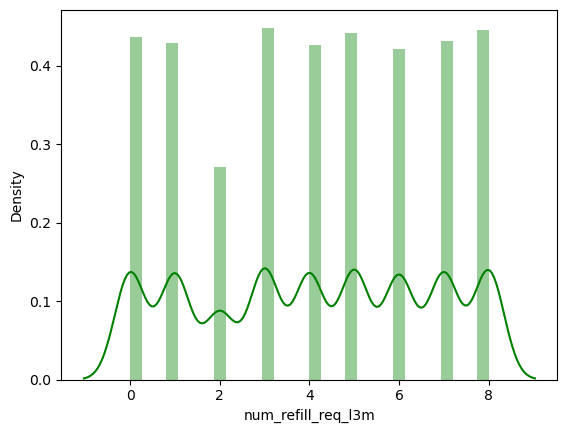

BoxPlot of num_refill_req_l3m
----------------------------------------------------------------------------


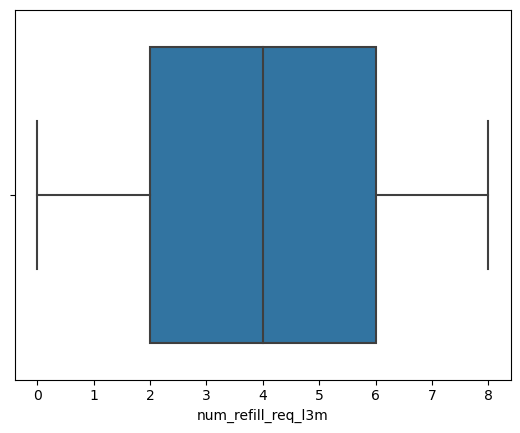

Description of transport_issue_l1y
----------------------------------------------------------------------------
count    25000.000000
mean         0.773680
std          1.199449
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: transport_issue_l1y, dtype: float64 Distribution of transport_issue_l1y
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


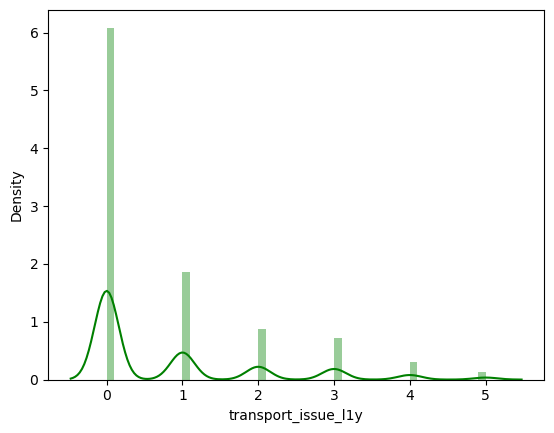

BoxPlot of transport_issue_l1y
----------------------------------------------------------------------------


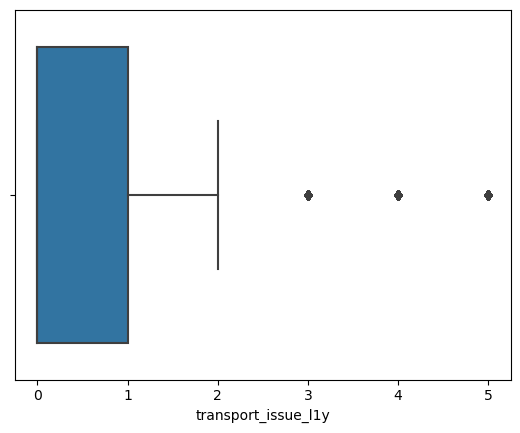

Description of Competitor_in_mkt
----------------------------------------------------------------------------
count    25000.000000
mean         3.104200
std          1.141663
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         12.000000
Name: Competitor_in_mkt, dtype: float64 Distribution of Competitor_in_mkt
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


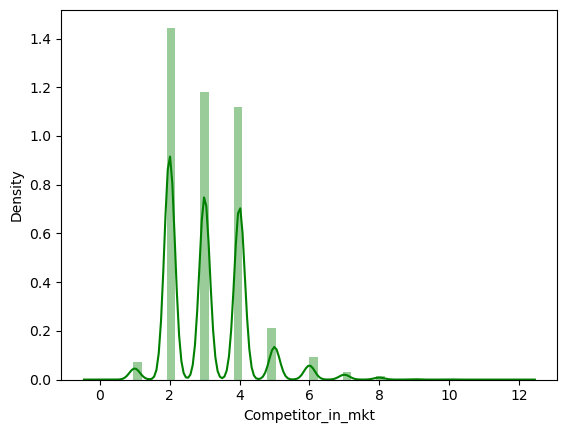

BoxPlot of Competitor_in_mkt
----------------------------------------------------------------------------


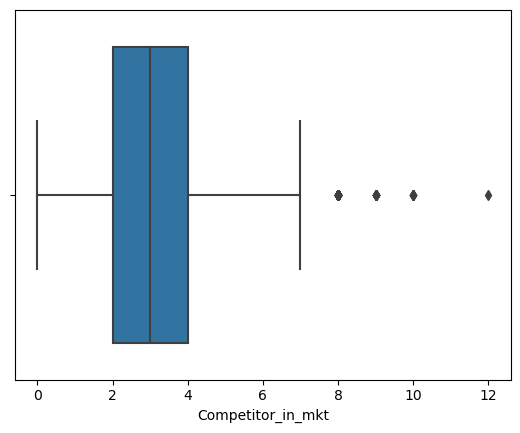

Description of retail_shop_num
----------------------------------------------------------------------------
count    25000.000000
mean      4985.711560
std       1052.825252
min       1821.000000
25%       4313.000000
50%       4859.000000
75%       5500.000000
max      11008.000000
Name: retail_shop_num, dtype: float64 Distribution of retail_shop_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


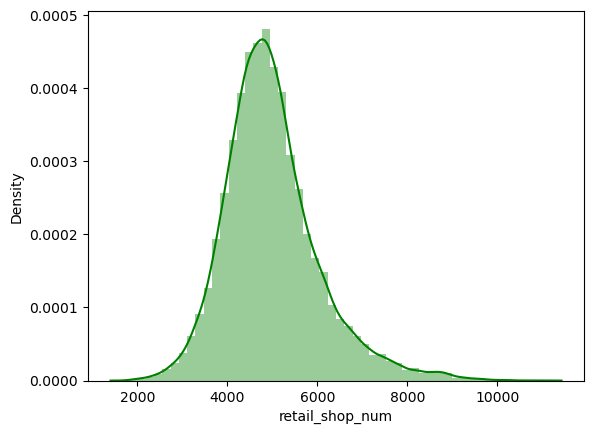

BoxPlot of retail_shop_num
----------------------------------------------------------------------------


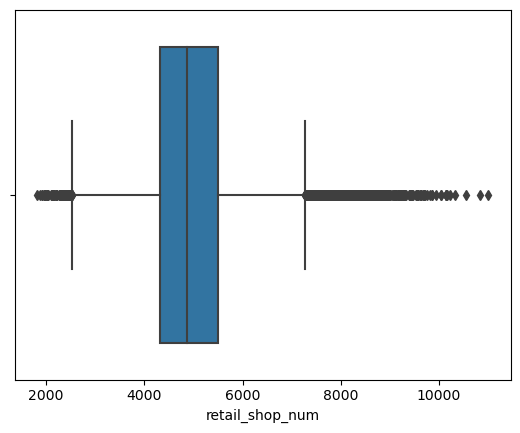

Description of distributor_num
----------------------------------------------------------------------------
count    25000.000000
mean        42.418120
std         16.064329
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64 Distribution of distributor_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


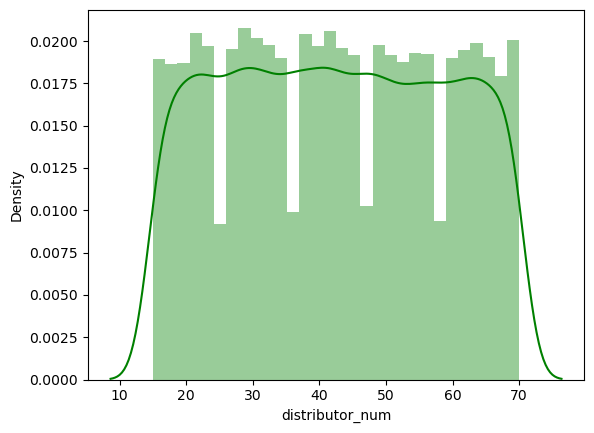

BoxPlot of distributor_num
----------------------------------------------------------------------------


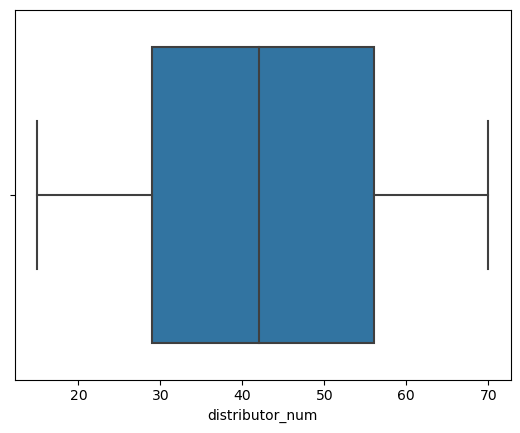

Description of dist_from_hub
----------------------------------------------------------------------------
count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64 Distribution of dist_from_hub
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


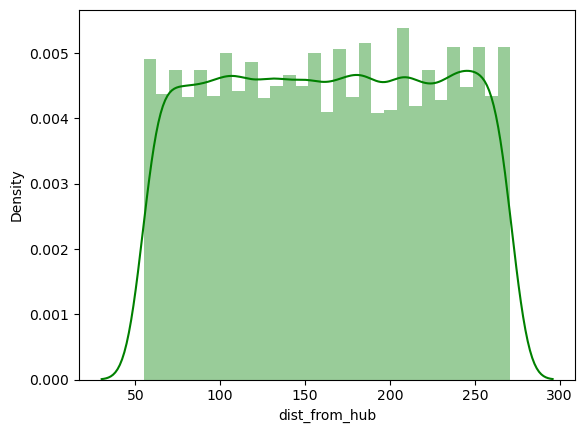

BoxPlot of dist_from_hub
----------------------------------------------------------------------------


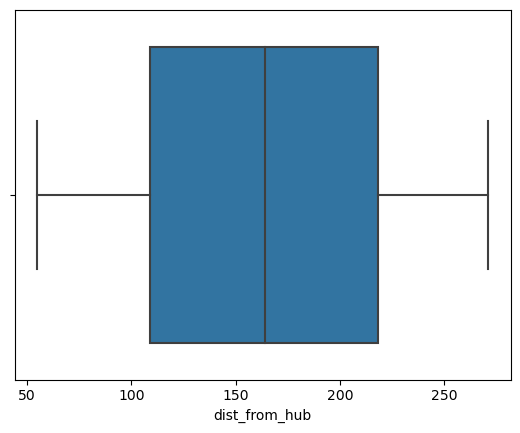

Description of workers_num
----------------------------------------------------------------------------
count    25000.000000
mean        28.951720
std          7.748493
min         10.000000
25%         24.000000
50%         28.000000
75%         33.000000
max         98.000000
Name: workers_num, dtype: float64 Distribution of workers_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


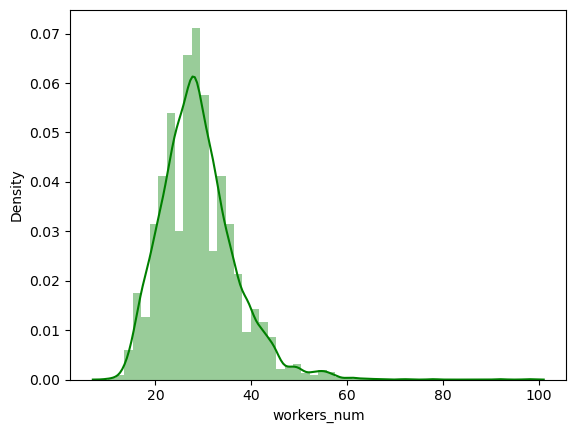

BoxPlot of workers_num
----------------------------------------------------------------------------


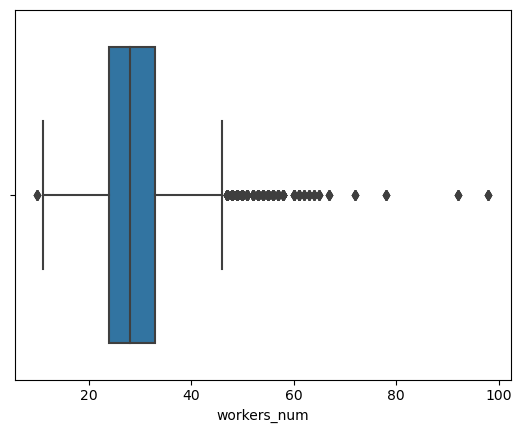

Description of wh_est_year
----------------------------------------------------------------------------
count    25000.000000
mean      2009.837800
std          6.682311
min       1996.000000
25%       2005.000000
50%       2010.000000
75%       2015.000000
max       2023.000000
Name: wh_est_year, dtype: float64 Distribution of wh_est_year
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


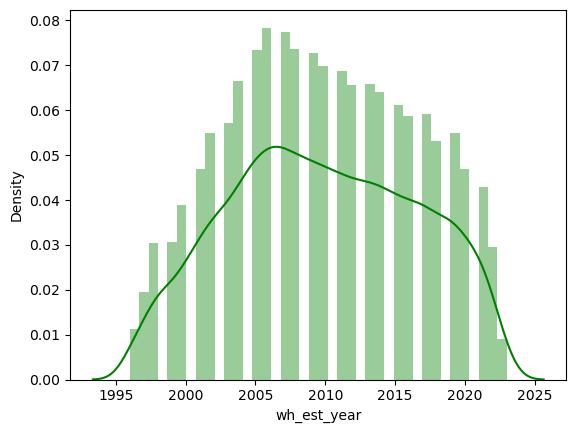

BoxPlot of wh_est_year
----------------------------------------------------------------------------


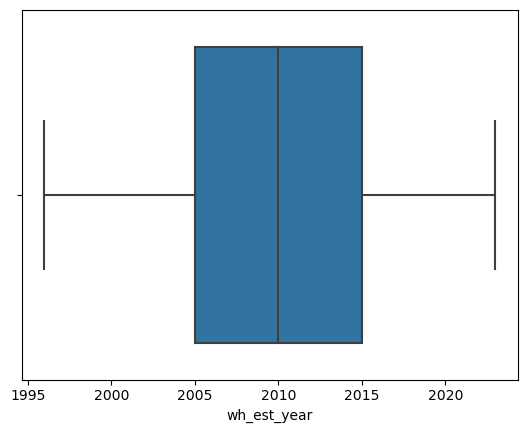

Description of storage_issue_reported_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        17.130440
std          9.161108
min          0.000000
25%         10.000000
50%         18.000000
75%         24.000000
max         39.000000
Name: storage_issue_reported_l3m, dtype: float64 Distribution of storage_issue_reported_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


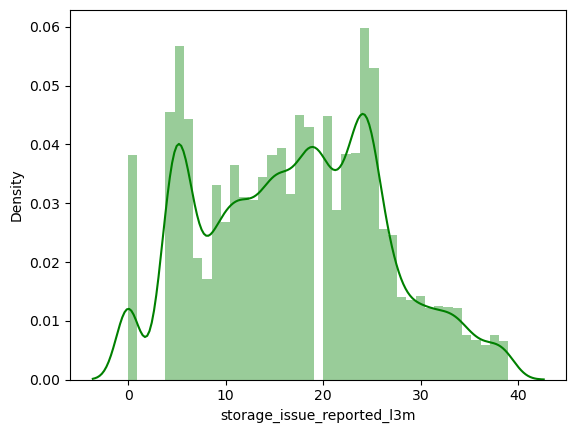

BoxPlot of storage_issue_reported_l3m
----------------------------------------------------------------------------


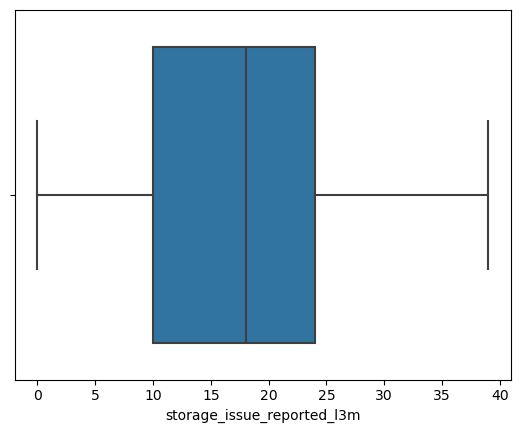

Description of wh_breakdown_l3m
----------------------------------------------------------------------------
count    2.500000e+04
mean     3.482040e+00
std      1.690335e+00
min     -4.440892e-16
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: wh_breakdown_l3m, dtype: float64 Distribution of wh_breakdown_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


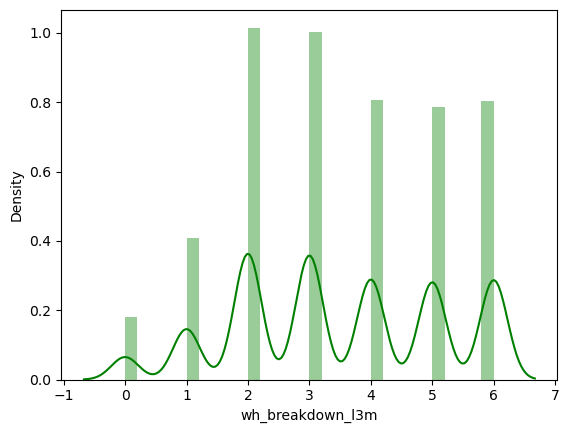

BoxPlot of wh_breakdown_l3m
----------------------------------------------------------------------------


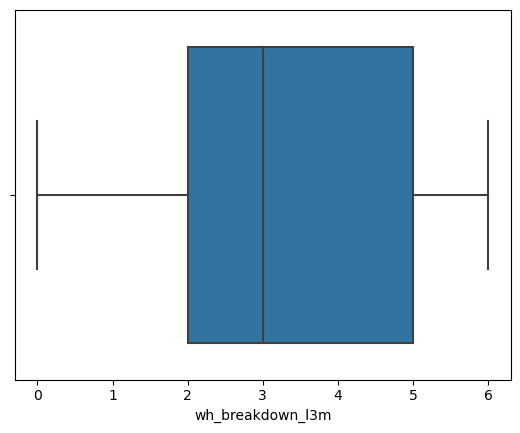

Description of govt_check_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        18.812280
std          8.632382
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check_l3m, dtype: float64 Distribution of govt_check_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


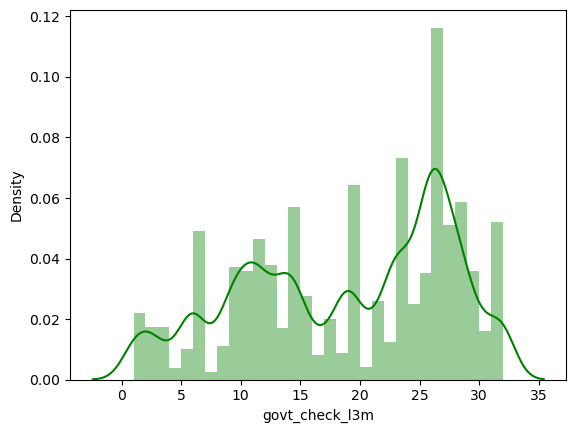

BoxPlot of govt_check_l3m
----------------------------------------------------------------------------


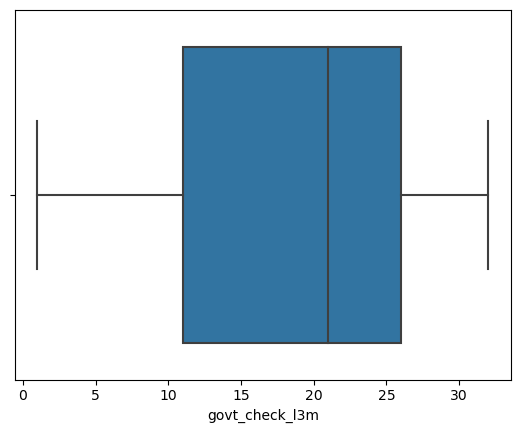

Description of product_wg_ton
----------------------------------------------------------------------------
count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64 Distribution of product_wg_ton
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


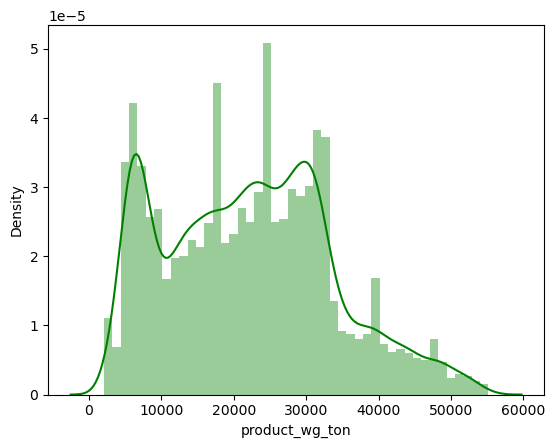

BoxPlot of product_wg_ton
----------------------------------------------------------------------------


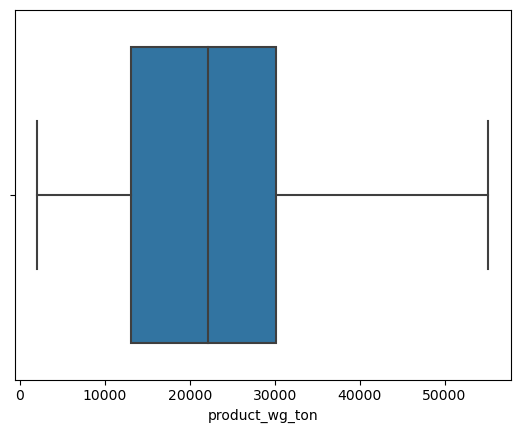

Description of flood_impacted
----------------------------------------------------------------------------
count    25000.000000
mean         0.098160
std          0.297537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_impacted, dtype: float64 Distribution of flood_impacted
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


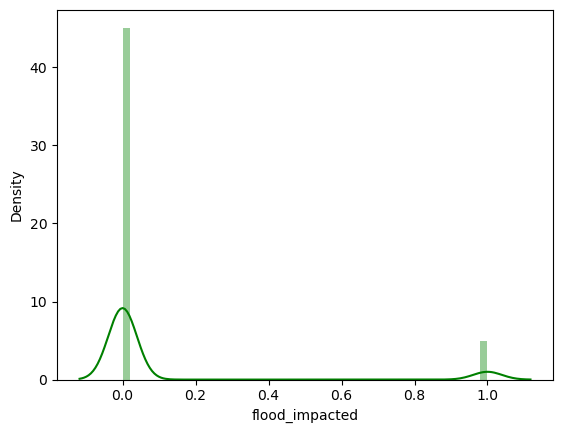

BoxPlot of flood_impacted
----------------------------------------------------------------------------


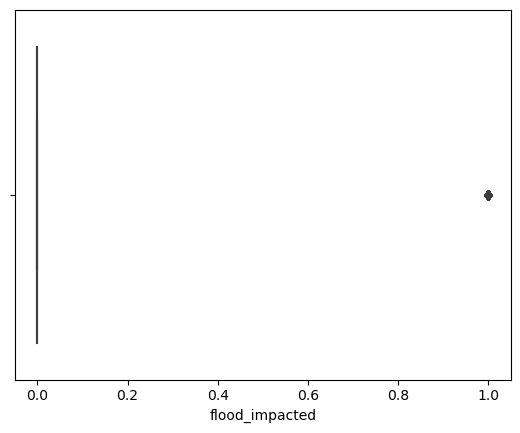

Description of flood_proof
----------------------------------------------------------------------------
count    25000.000000
mean         0.054640
std          0.227281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_proof, dtype: float64 Distribution of flood_proof
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


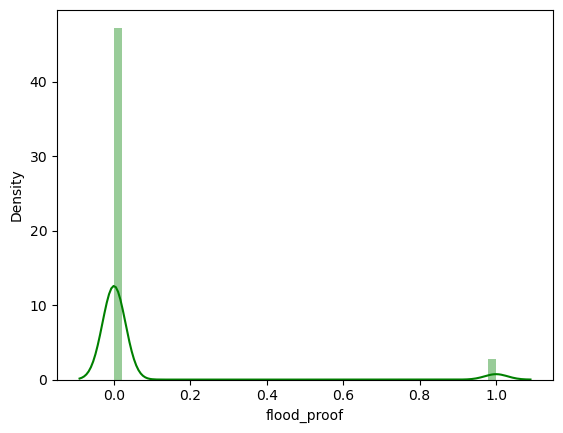

BoxPlot of flood_proof
----------------------------------------------------------------------------


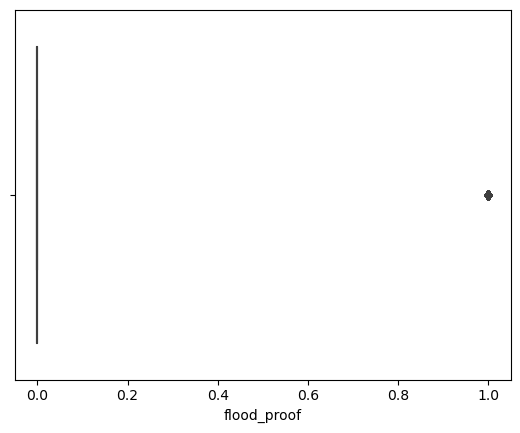

Description of electric_supply
----------------------------------------------------------------------------
count    25000.000000
mean         0.656880
std          0.474761
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: electric_supply, dtype: float64 Distribution of electric_supply
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


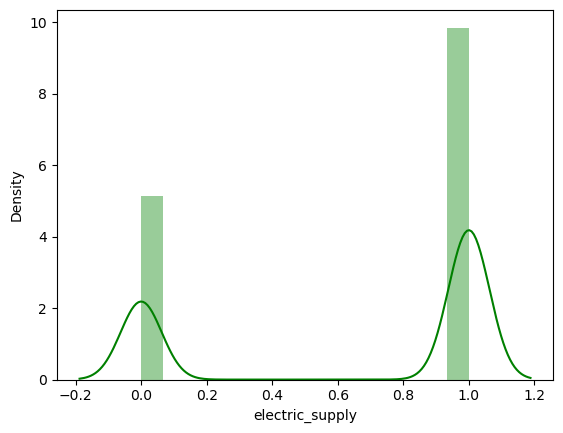

BoxPlot of electric_supply
----------------------------------------------------------------------------


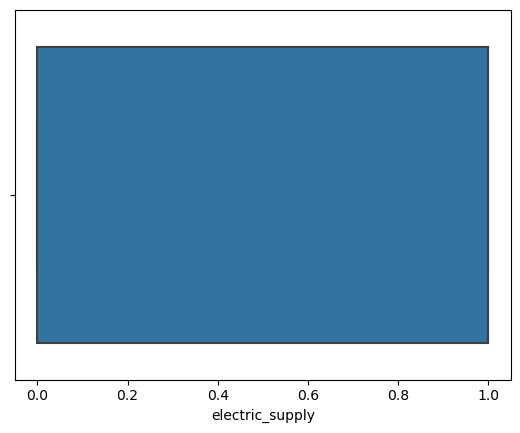

Description of temp_reg_mach
----------------------------------------------------------------------------
count    25000.000000
mean         0.303280
std          0.459684
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: temp_reg_mach, dtype: float64 Distribution of temp_reg_mach
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


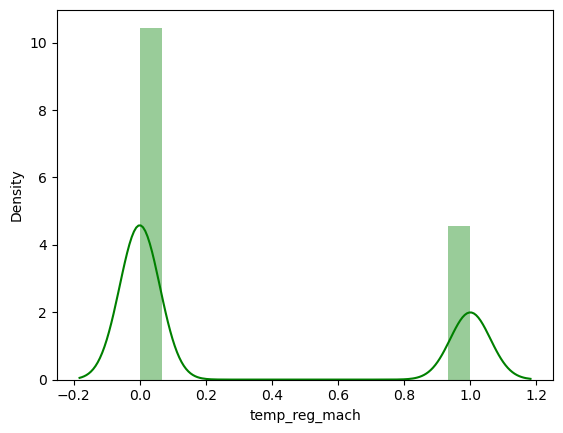

BoxPlot of temp_reg_mach
----------------------------------------------------------------------------


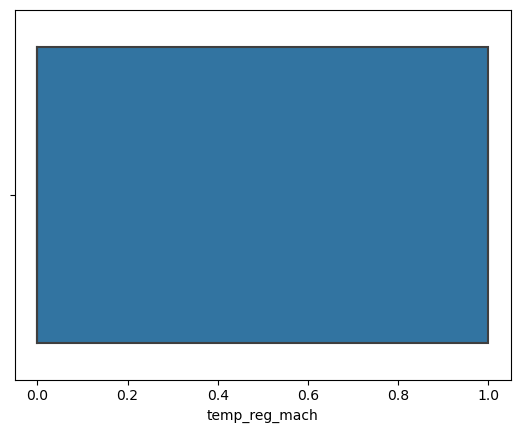

In [477]:
for x in lstnumericcolumns1:
    univariateAnalysis_numeric(x,20)

 transport_issue_l1y, Competitor_in_mkt, retail_shop_num , workers_num have outlier

In [478]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [479]:
lr,ur=remove_outlier(df1["transport_issue_l1y"])
df1["transport_issue_l1y"]=np.where(df1["transport_issue_l1y"]>ur,ur,df1["transport_issue_l1y"])
df1["transport_issue_l1y"]=np.where(df1["transport_issue_l1y"]<lr,lr,df1["transport_issue_l1y"])

In [480]:
lr,ur=remove_outlier(df1["Competitor_in_mkt"])
df1["Competitor_in_mkt"]=np.where(df1["Competitor_in_mkt"]>ur,ur,df1["Competitor_in_mkt"])
df1["Competitor_in_mkt"]=np.where(df1["Competitor_in_mkt"]<lr,lr,df1["Competitor_in_mkt"])

In [481]:
lr,ur=remove_outlier(df1["retail_shop_num"])
df1["retail_shop_num"]=np.where(df1["retail_shop_num"]>ur,ur,df1["retail_shop_num"])
df1["retail_shop_num"]=np.where(df1["retail_shop_num"]<lr,lr,df1["retail_shop_num"])

In [482]:
lr,ur=remove_outlier(df1["workers_num"])
df1["workers_num"]=np.where(df1["workers_num"]>ur,ur,df1["workers_num"])
df1["workers_num"]=np.where(df1["workers_num"]<lr,lr,df1["workers_num"])

Description of num_refill_req_l3m
----------------------------------------------------------------------------
count    25000.000000
mean         4.089040
std          2.606612
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: num_refill_req_l3m, dtype: float64 Distribution of num_refill_req_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


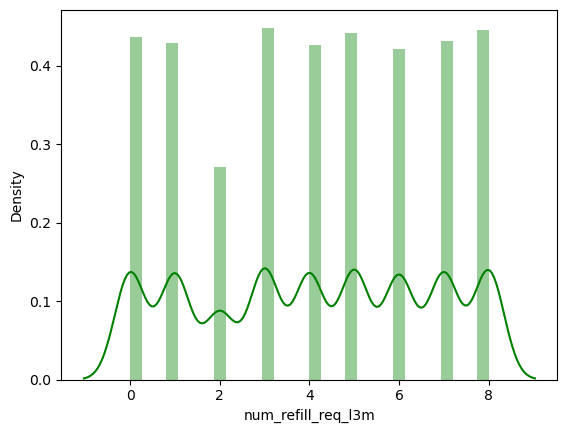

BoxPlot of num_refill_req_l3m
----------------------------------------------------------------------------


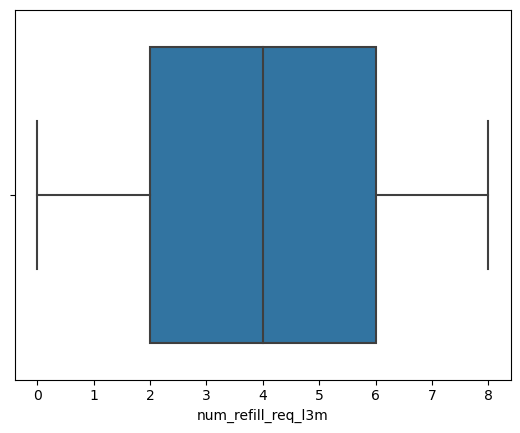

Description of transport_issue_l1y
----------------------------------------------------------------------------
count    25000.000000
mean         0.655900
std          0.918161
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.500000
Name: transport_issue_l1y, dtype: float64 Distribution of transport_issue_l1y
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


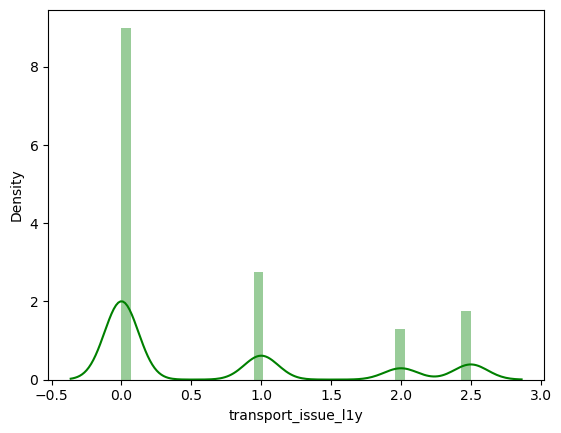

BoxPlot of transport_issue_l1y
----------------------------------------------------------------------------


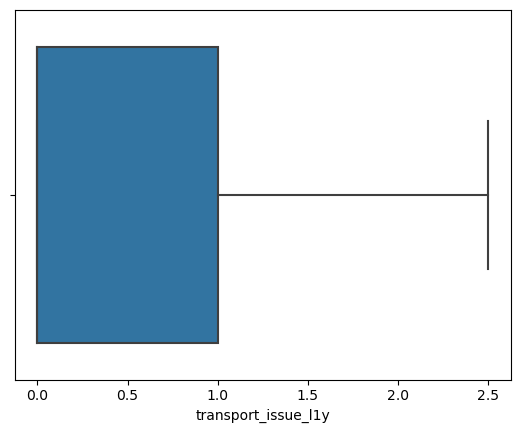

Description of Competitor_in_mkt
----------------------------------------------------------------------------
count    25000.000000
mean         3.099200
std          1.120772
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Competitor_in_mkt, dtype: float64 Distribution of Competitor_in_mkt
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


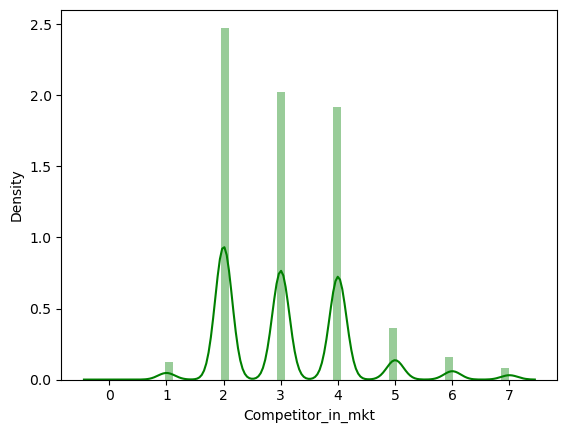

BoxPlot of Competitor_in_mkt
----------------------------------------------------------------------------


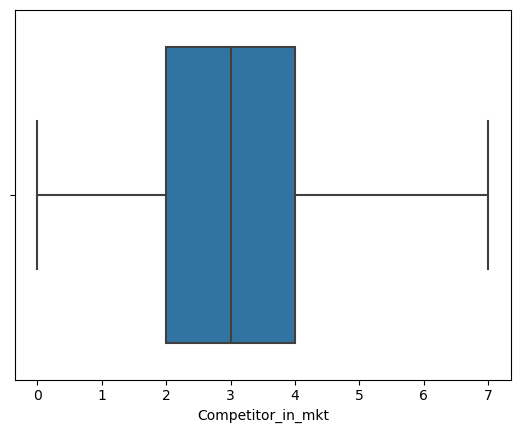

Description of retail_shop_num
----------------------------------------------------------------------------
count    25000.000000
mean      4958.893200
std        969.402141
min       2532.500000
25%       4313.000000
50%       4859.000000
75%       5500.000000
max       7280.500000
Name: retail_shop_num, dtype: float64 Distribution of retail_shop_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


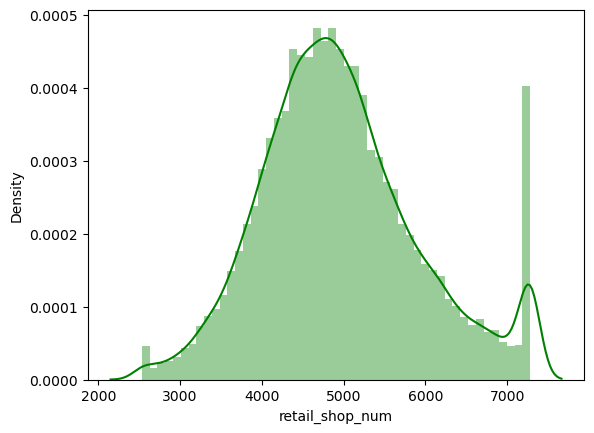

BoxPlot of retail_shop_num
----------------------------------------------------------------------------


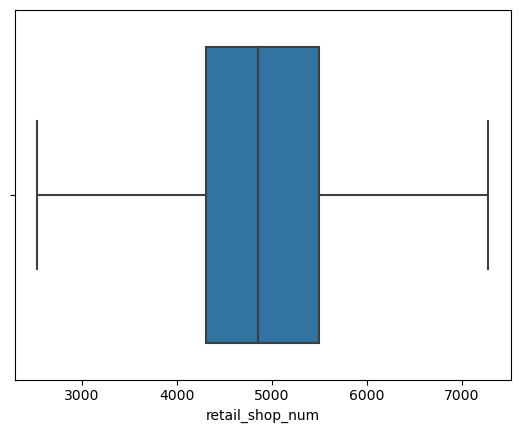

Description of distributor_num
----------------------------------------------------------------------------
count    25000.000000
mean        42.418120
std         16.064329
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64 Distribution of distributor_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


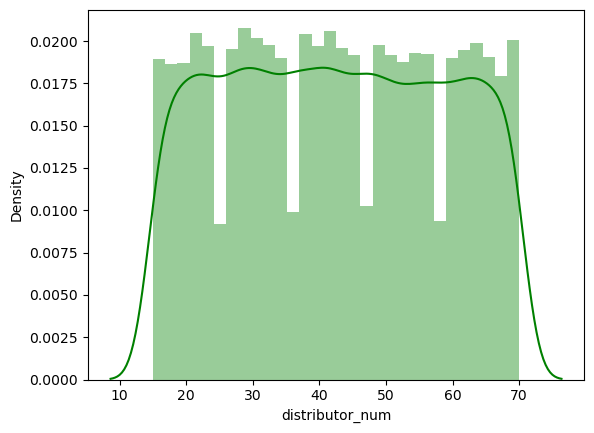

BoxPlot of distributor_num
----------------------------------------------------------------------------


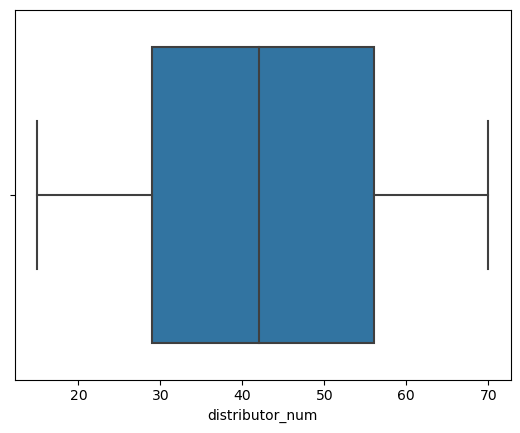

Description of dist_from_hub
----------------------------------------------------------------------------
count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64 Distribution of dist_from_hub
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


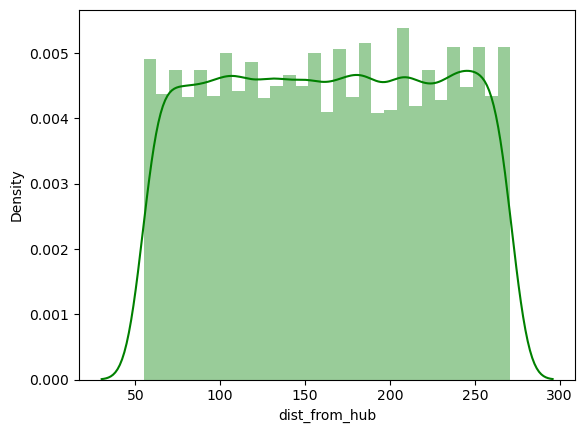

BoxPlot of dist_from_hub
----------------------------------------------------------------------------


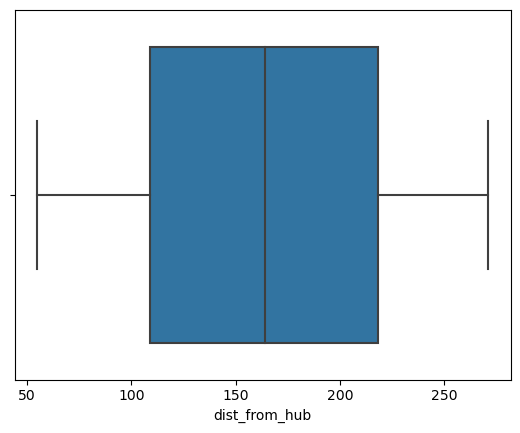

Description of workers_num
----------------------------------------------------------------------------
count    25000.000000
mean        28.781220
std          7.173285
min         10.500000
25%         24.000000
50%         28.000000
75%         33.000000
max         46.500000
Name: workers_num, dtype: float64 Distribution of workers_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


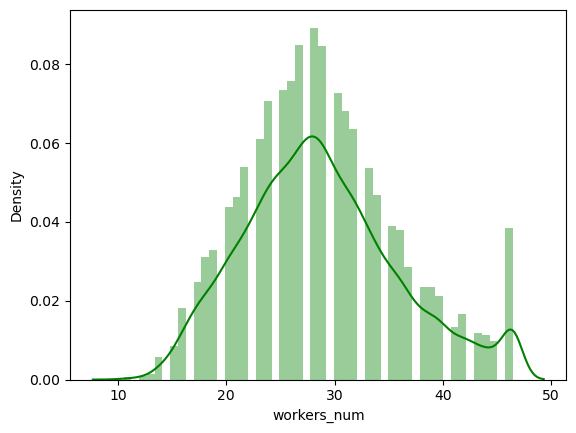

BoxPlot of workers_num
----------------------------------------------------------------------------


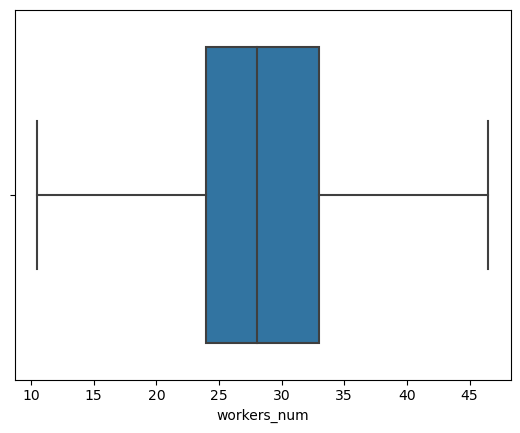

Description of wh_est_year
----------------------------------------------------------------------------
count    25000.000000
mean      2009.837800
std          6.682311
min       1996.000000
25%       2005.000000
50%       2010.000000
75%       2015.000000
max       2023.000000
Name: wh_est_year, dtype: float64 Distribution of wh_est_year
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


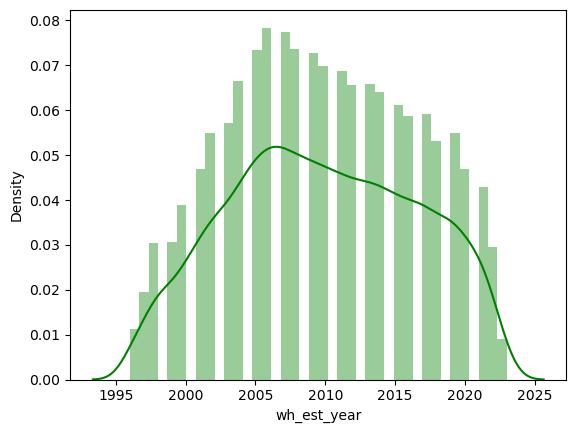

BoxPlot of wh_est_year
----------------------------------------------------------------------------


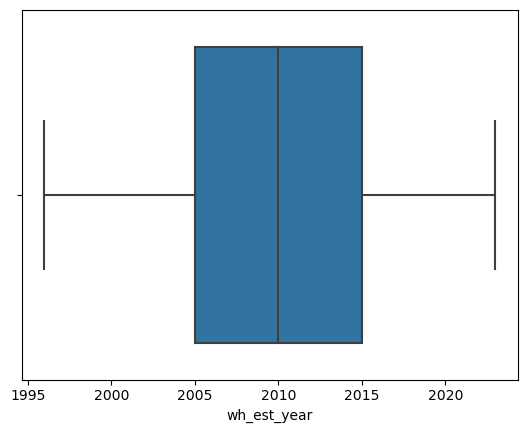

Description of storage_issue_reported_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        17.130440
std          9.161108
min          0.000000
25%         10.000000
50%         18.000000
75%         24.000000
max         39.000000
Name: storage_issue_reported_l3m, dtype: float64 Distribution of storage_issue_reported_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


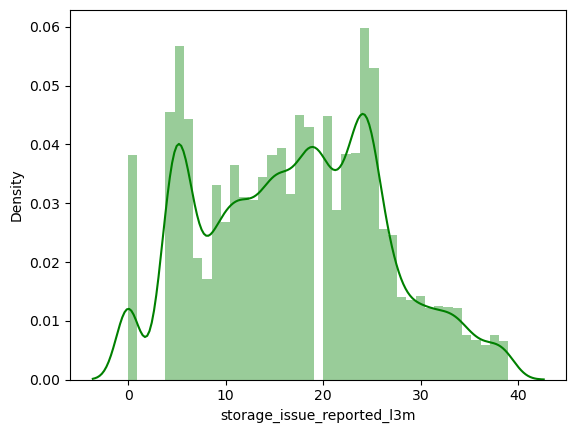

BoxPlot of storage_issue_reported_l3m
----------------------------------------------------------------------------


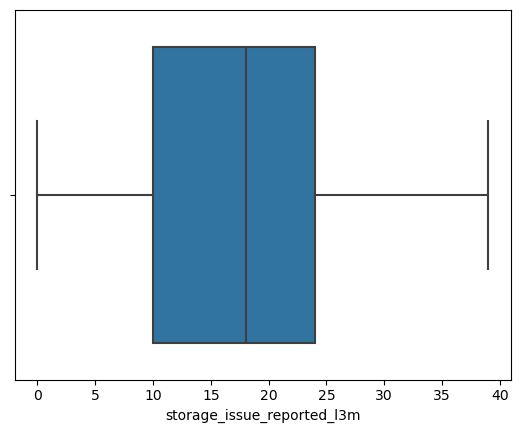

Description of wh_breakdown_l3m
----------------------------------------------------------------------------
count    2.500000e+04
mean     3.482040e+00
std      1.690335e+00
min     -4.440892e-16
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: wh_breakdown_l3m, dtype: float64 Distribution of wh_breakdown_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


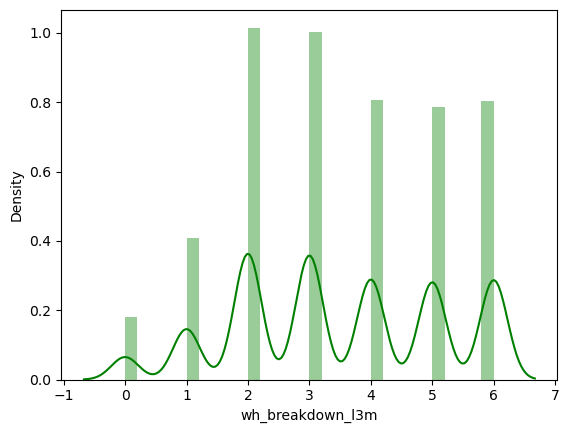

BoxPlot of wh_breakdown_l3m
----------------------------------------------------------------------------


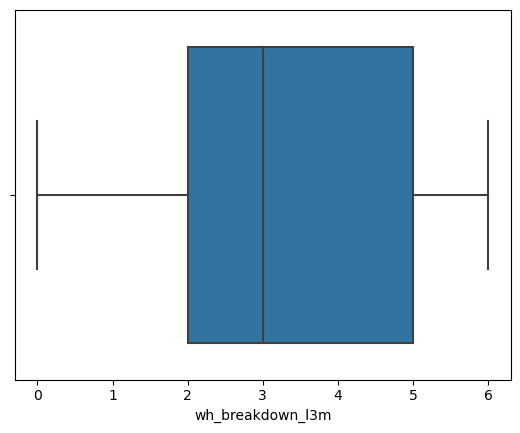

Description of govt_check_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        18.812280
std          8.632382
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check_l3m, dtype: float64 Distribution of govt_check_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


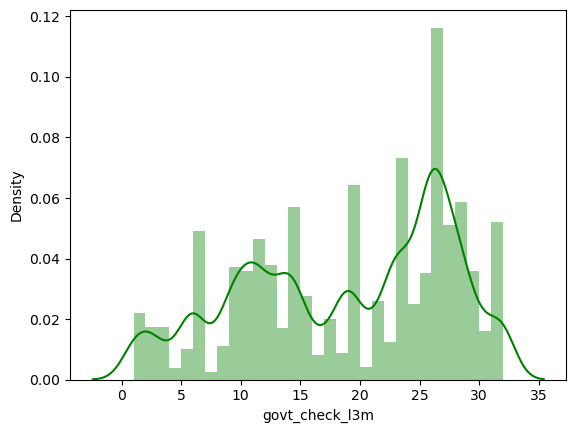

BoxPlot of govt_check_l3m
----------------------------------------------------------------------------


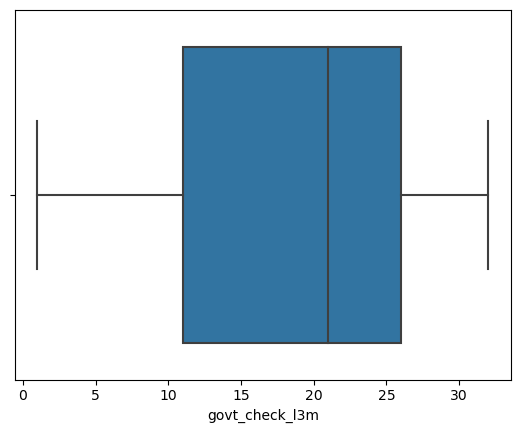

Description of product_wg_ton
----------------------------------------------------------------------------
count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64 Distribution of product_wg_ton
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


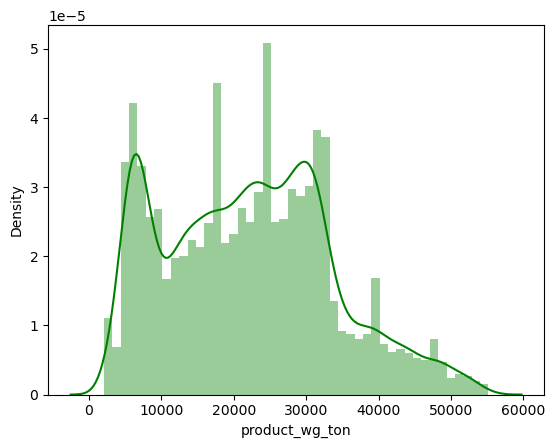

BoxPlot of product_wg_ton
----------------------------------------------------------------------------


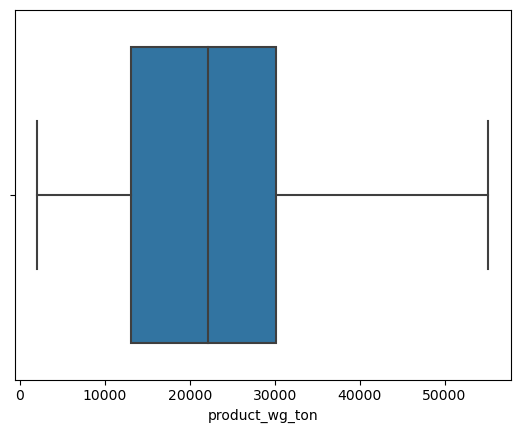

Description of flood_impacted
----------------------------------------------------------------------------
count    25000.000000
mean         0.098160
std          0.297537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_impacted, dtype: float64 Distribution of flood_impacted
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


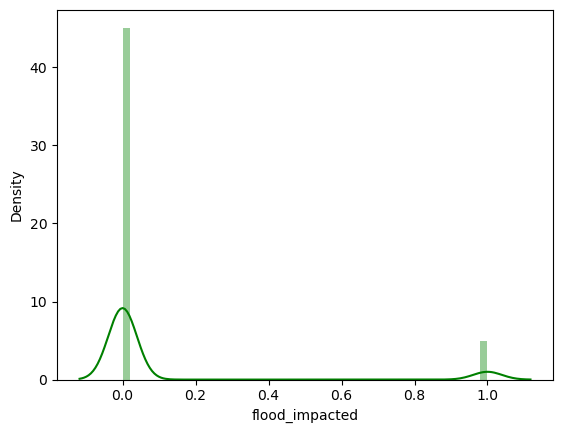

BoxPlot of flood_impacted
----------------------------------------------------------------------------


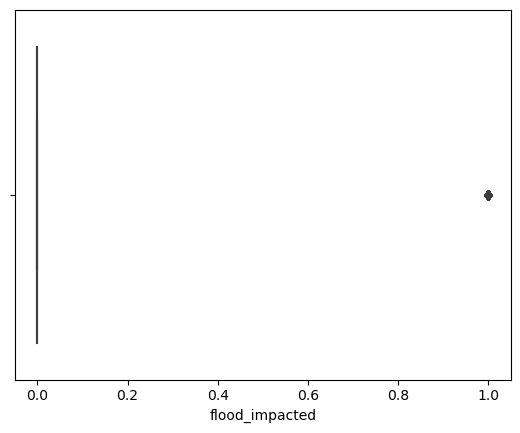

Description of flood_proof
----------------------------------------------------------------------------
count    25000.000000
mean         0.054640
std          0.227281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_proof, dtype: float64 Distribution of flood_proof
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


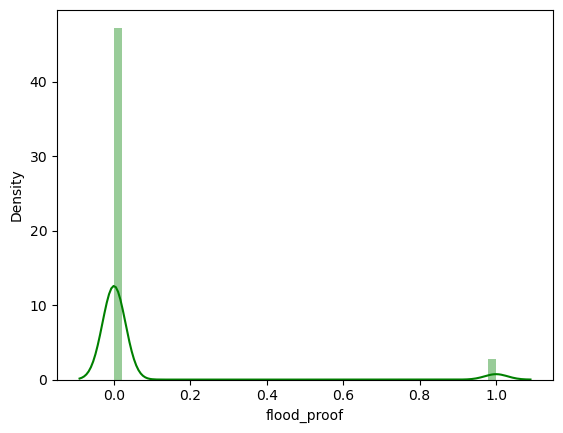

BoxPlot of flood_proof
----------------------------------------------------------------------------


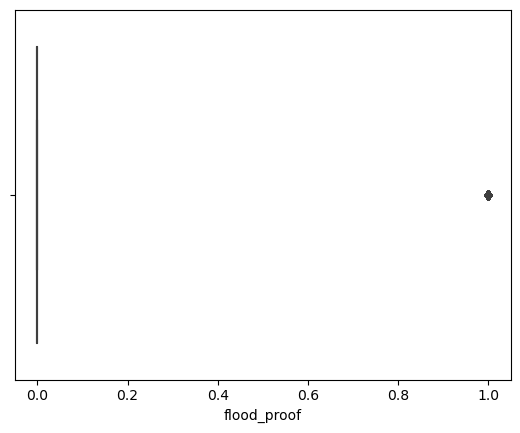

Description of electric_supply
----------------------------------------------------------------------------
count    25000.000000
mean         0.656880
std          0.474761
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: electric_supply, dtype: float64 Distribution of electric_supply
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


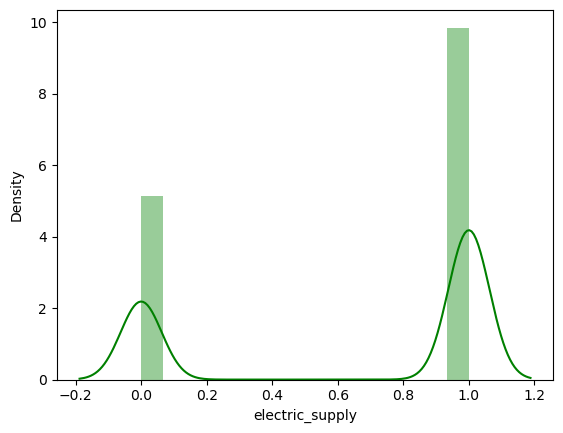

BoxPlot of electric_supply
----------------------------------------------------------------------------


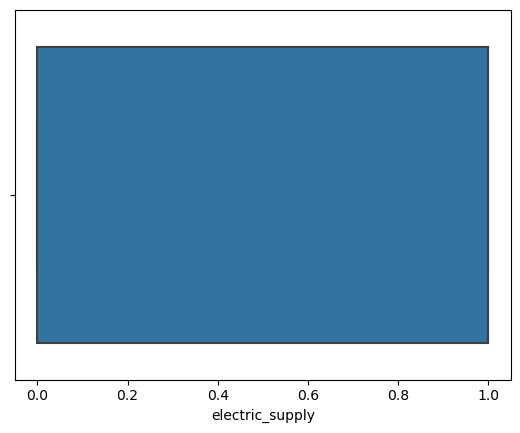

Description of temp_reg_mach
----------------------------------------------------------------------------
count    25000.000000
mean         0.303280
std          0.459684
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: temp_reg_mach, dtype: float64 Distribution of temp_reg_mach
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


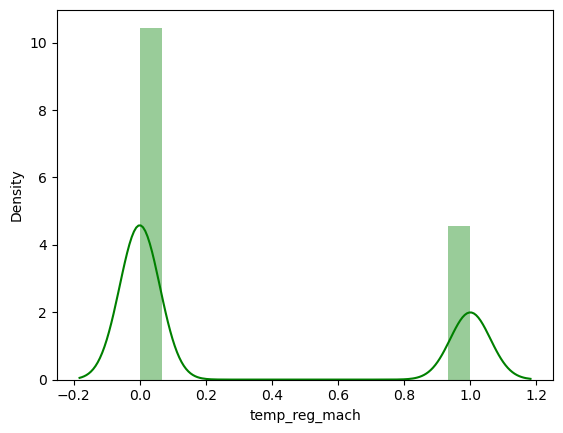

BoxPlot of temp_reg_mach
----------------------------------------------------------------------------


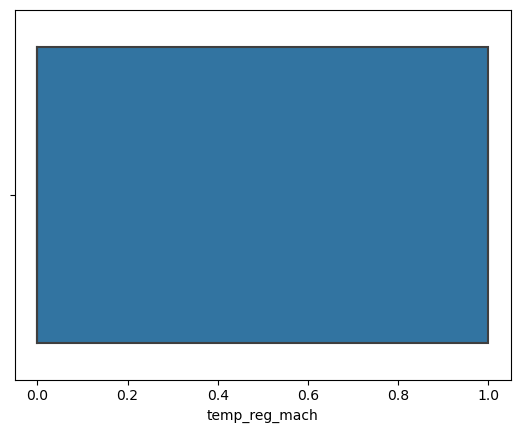

In [483]:
for x in lstnumericcolumns1:
    univariateAnalysis_numeric(x,20)

In [484]:
df1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0             24.0           91.0         29.0         2011   
1           6217.0             47.0          210.0         31.0         2017   
2           4306.0             64.0          161.0         37.0         2007   
3           6000.0             50.0          103.0         21.0         2011   
4           4740.0             42.0          112.0         25.0         2009   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                        13.0               5.0            15.0   
1                         4.0               3.0            17.0   
2                        17.0               6.0            22.0   
3                        17.0               3.0            27.0   
4                        18.0               6.0            24.0   

   product_wg_ton  Location_type  WH_capacity_size  zone  WH_regional_zone  \
0           17115              1                 0     3                 5   
1            5074              0                 2     1                 4   
2           23137              0                 1     2                 1   
3           22115              0                 1     1                 2   
4           24071              0                 2     1                 4   

   wh_owner_type  approved_wh_govt_certificate  flood_impacted  flood_proof  \
0              1                             0               0            1   
1              0                             0               0            0   
2              0                             0               0            0   
3              1                             1               0            0   
4              0                             4               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

In [485]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   num_refill_req_l3m            25000 non-null  float64
 1   transport_issue_l1y           25000 non-null  float64
 2   Competitor_in_mkt             25000 non-null  float64
 3   retail_shop_num               25000 non-null  float64
 4   distributor_num               25000 non-null  float64
 5   dist_from_hub                 25000 non-null  float64
 6   workers_num                   25000 non-null  float64
 7   wh_est_year                   25000 non-null  int32  
 8   storage_issue_reported_l3m    25000 non-null  float64
 9   wh_breakdown_l3m              25000 non-null  float64
 10  govt_check_l3m                25000 non-null  float64
 11  product_wg_ton                25000 non-null  int64  
 12  Location_type                 25000 non-null  int8   
 13  W

In [486]:
df2 = df1.replace({
    'Location_type': 
    {0.0: 'Rural',
     1.0: 'Urban '},    
    'WH_capacity_size': 
    {2.0: 'Large', 
    1.0:"Mid",
    0.0:"Small"},
    "zone" :
    {1.0 : "North",
    3.0 :  "West",
    2.0 : "South",
    0.0:"East"},
"wh_owner_type": 
    {0.0: "Company Owned",
    1.0:  "Rented"},
"WH_regional_zone" :
    {5.0 : "Zone 6",
4.0 : "Zone 5",
3.0 : "Zone 4",
1.0 : "Zone 2",
2.0 : "Zone 3",
0.0 :  "Zone 1"},
 "approved_wh_govt_certificate" :
    {4.0 : "C",
3.0 :   "B+",
2.0  :  "B",
0.0 :   "A",
1.0 :  "A+"}})

In [487]:
df2.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0             24.0           91.0         29.0         2011   
1           6217.0             47.0          210.0         31.0         2017   
2           4306.0             64.0          161.0         37.0         2007   
3           6000.0             50.0          103.0         21.0         2011   
4           4740.0             42.0          112.0         25.0         2009   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                        13.0               5.0            15.0   
1                         4.0               3.0            17.0   
2                        17.0               6.0            22.0   
3                        17.0               3.0            27.0   
4                        18.0               6.0            24.0   

   product_wg_ton Location_type WH_capacity_size   zone WH_regional_zone  \
0           17115        Urban             Small   West           Zone 6   
1            5074         Rural            Large  North           Zone 5   
2           23137         Rural              Mid  South           Zone 2   
3           22115         Rural              Mid  North           Zone 3   
4           24071         Rural            Large  North           Zone 5   

   wh_owner_type approved_wh_govt_certificate  flood_impacted  flood_proof  \
0         Rented                            A               0            1   
1  Company Owned                            A               0            0   
2  Company Owned                            A               0            0   
3         Rented                           A+               0            0   
4  Company Owned                            C               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

In [488]:
df2.to_csv("Clean_Data.csv")

## Exploratory data analysis

a) Univariate analysis (distribution and spread for every continuous attribute, distribution of data in categories for categorical ones)

plt.figure(figsize=(8,6))
sns.scatterplot(df.age, df.charges,hue=df.smoker,palette= ['red','green'] ,alpha=0.6)
plt.show()

array([[<AxesSubplot:title={'center':'num_refill_req_l3m'}>,
        <AxesSubplot:title={'center':'transport_issue_l1y'}>,
        <AxesSubplot:title={'center':'Competitor_in_mkt'}>,
        <AxesSubplot:title={'center':'retail_shop_num'}>],
       [<AxesSubplot:title={'center':'distributor_num'}>,
        <AxesSubplot:title={'center':'dist_from_hub'}>,
        <AxesSubplot:title={'center':'workers_num'}>,
        <AxesSubplot:title={'center':'wh_est_year'}>],
       [<AxesSubplot:title={'center':'storage_issue_reported_l3m'}>,
        <AxesSubplot:title={'center':'wh_breakdown_l3m'}>,
        <AxesSubplot:title={'center':'govt_check_l3m'}>,
        <AxesSubplot:title={'center':'product_wg_ton'}>],
       [<AxesSubplot:title={'center':'flood_impacted'}>,
        <AxesSubplot:title={'center':'flood_proof'}>,
        <AxesSubplot:title={'center':'electric_supply'}>,
        <AxesSubplot:title={'center':'temp_reg_mach'}>]], dtype=object)

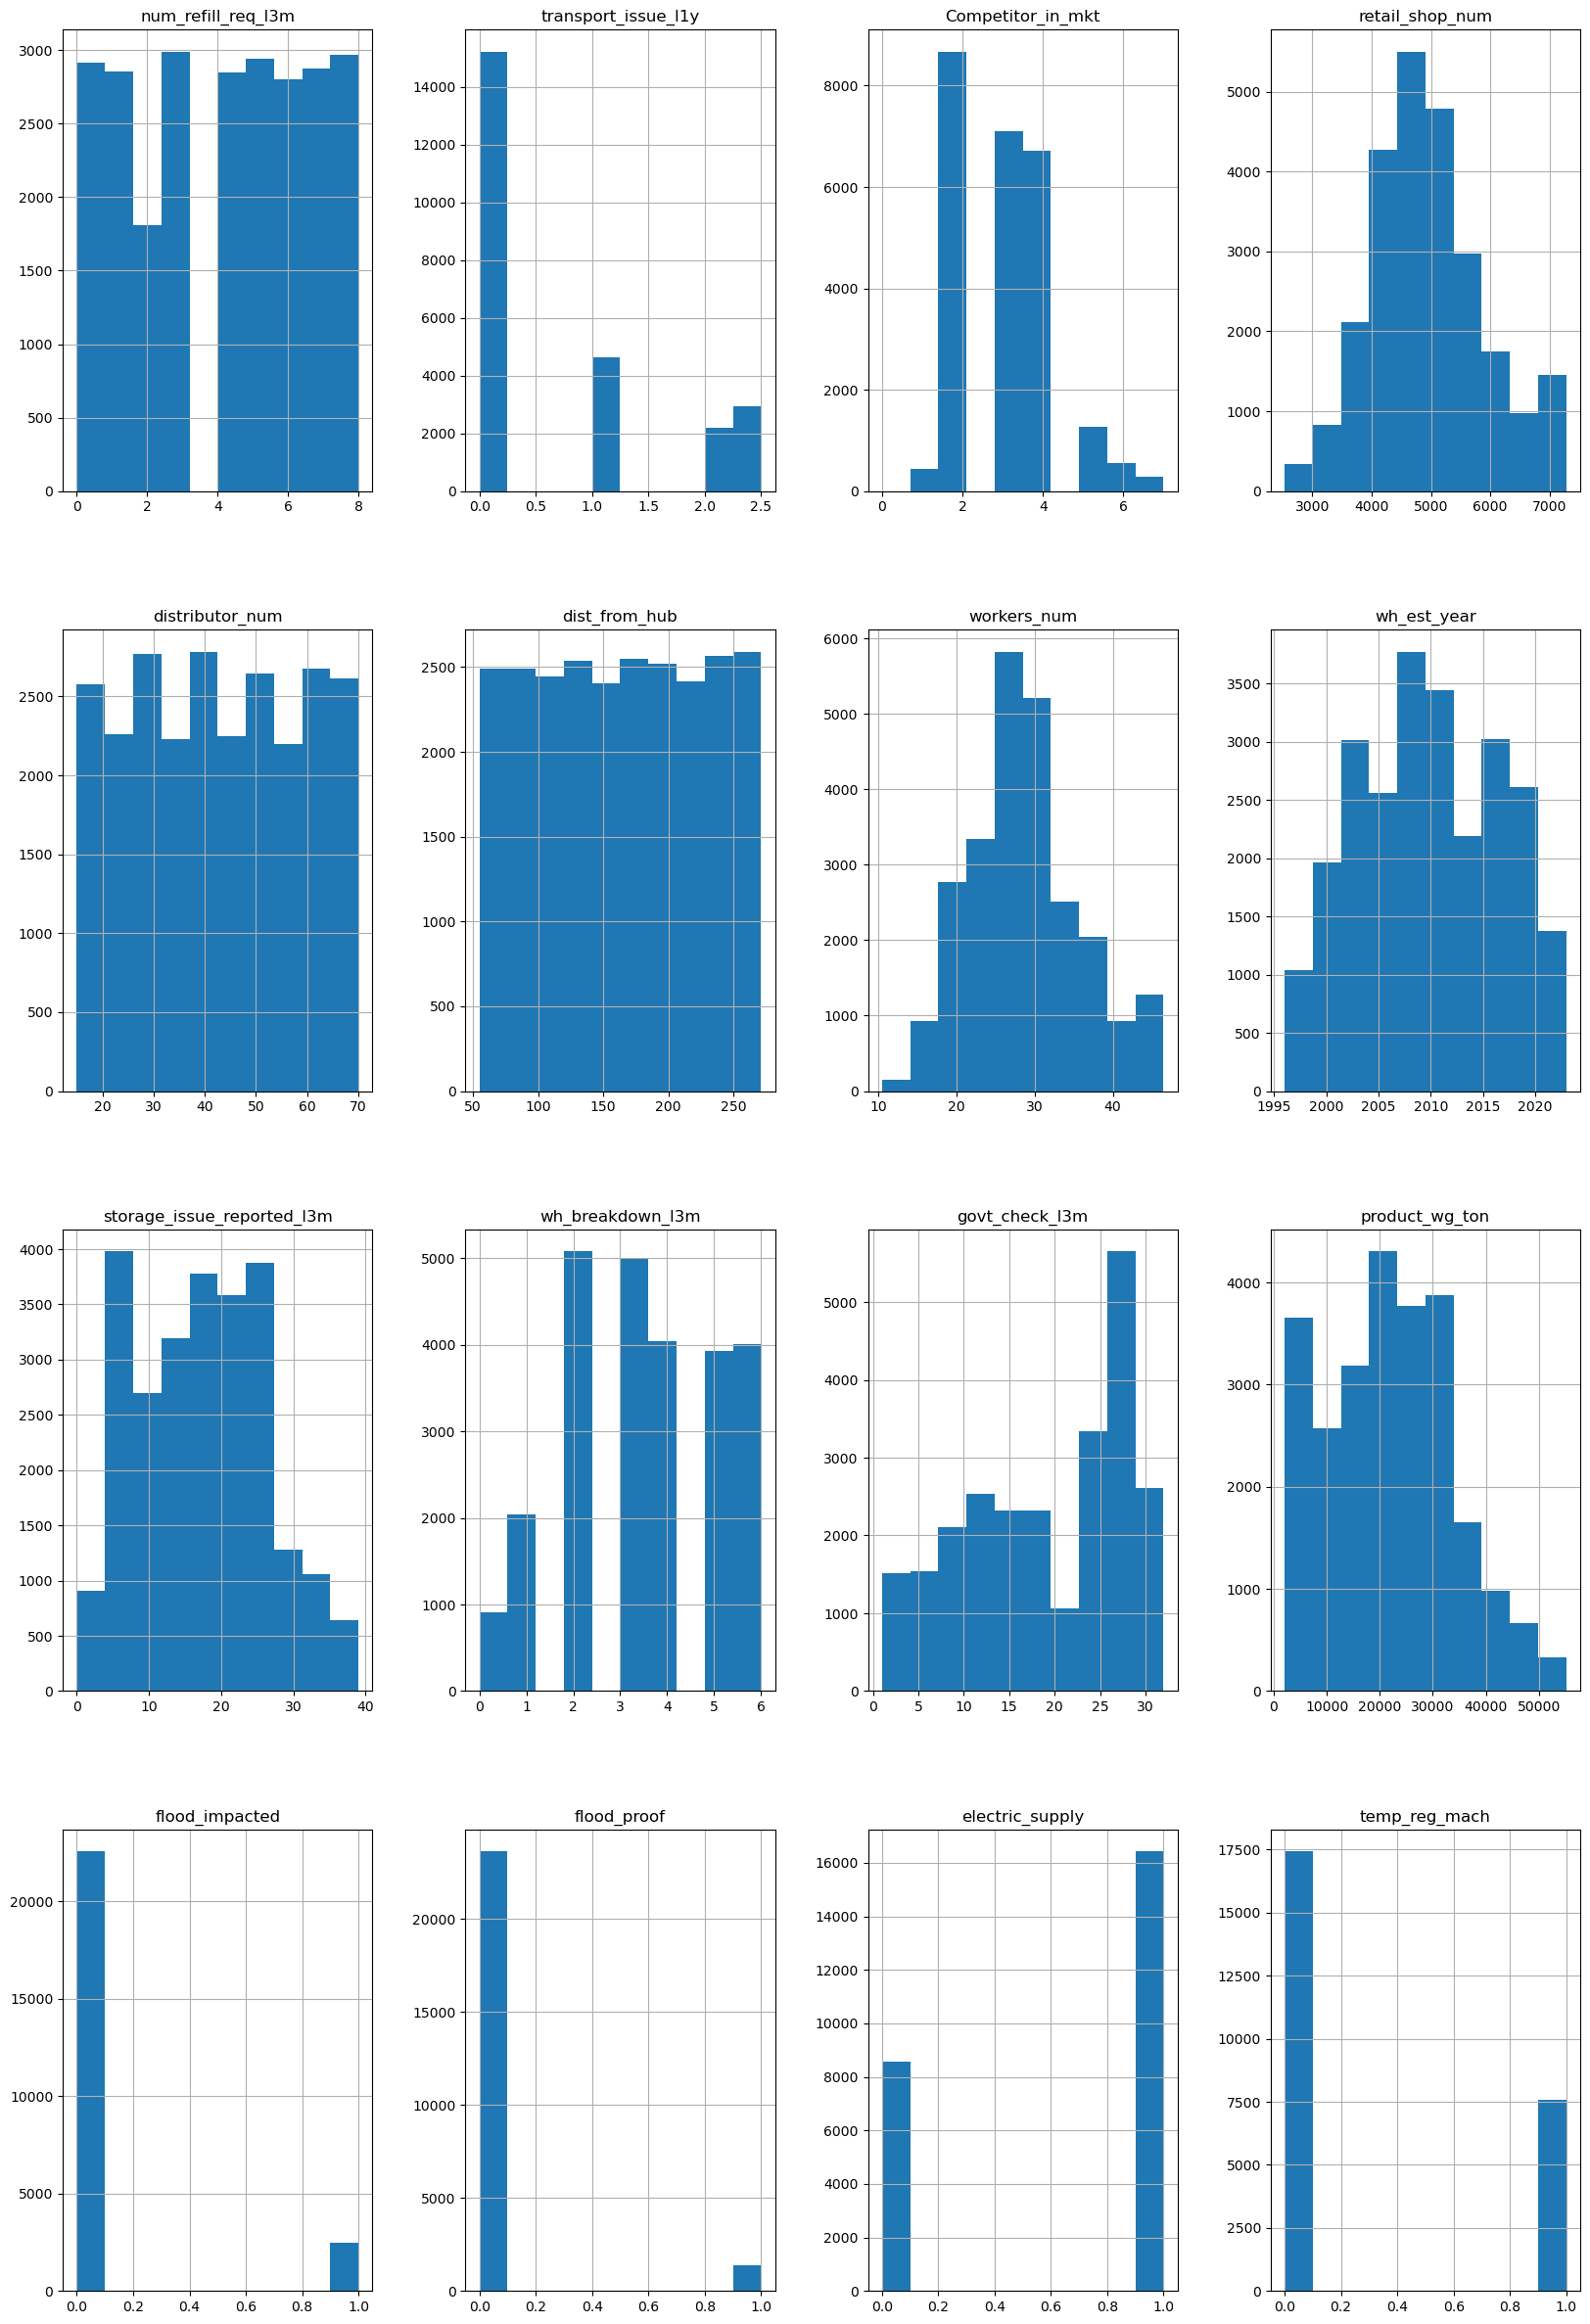

In [489]:
df2.hist(figsize=(20,30))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


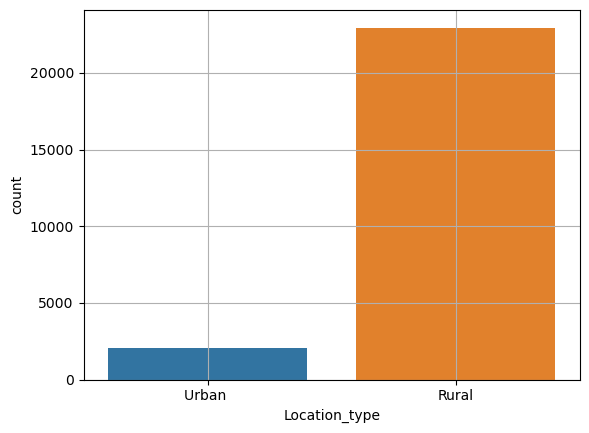

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


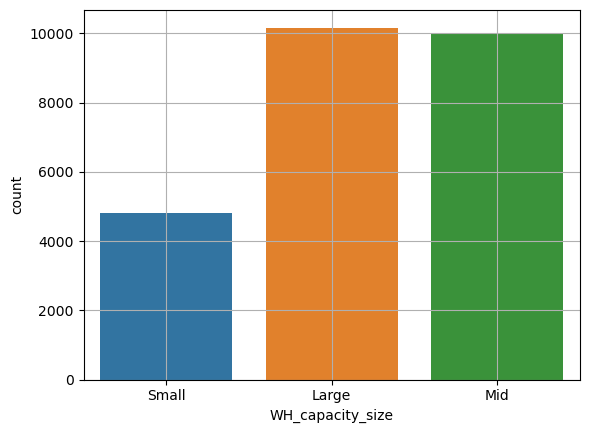

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


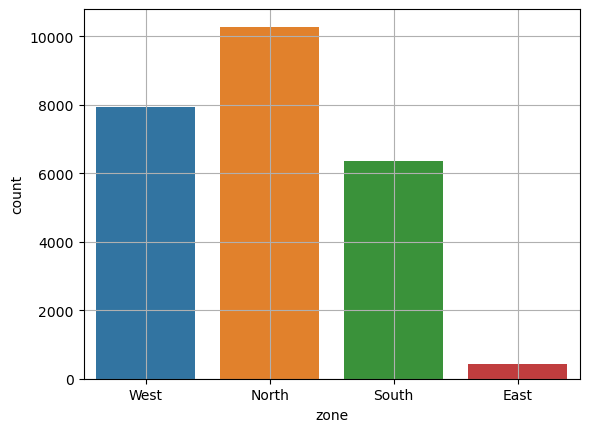

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


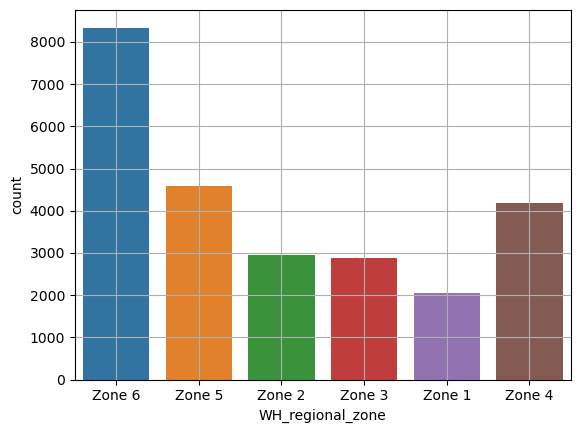

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


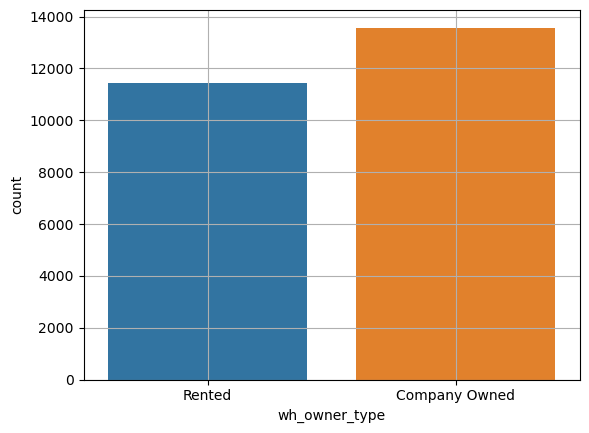

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


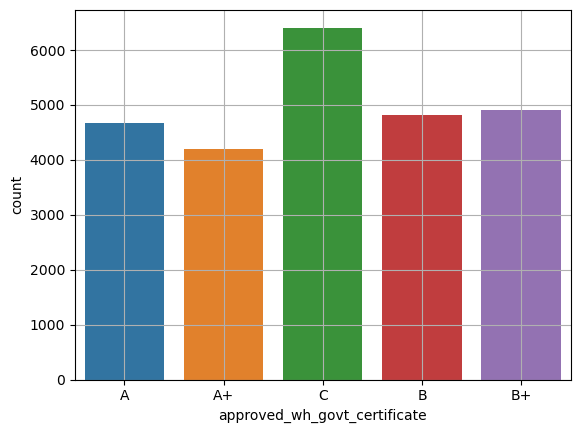

In [490]:
count = ["Location_type","WH_capacity_size","zone","WH_regional_zone","wh_owner_type","approved_wh_govt_certificate"]
for i in count:
    sns.countplot(df2[i])
    plt.grid()
    plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Description of num_refill_req_l3m
----------------------------------------------------------------------------
count    25000.000000
mean         4.089040
std          2.606612
min          0.000000
25%          2.000000
50%          4.000000
75%          6.000000
max          8.000000
Name: num_refill_req_l3m, dtype: float64 Distribution of num_refill_req_l3m
----------------------------------------------------------------------------


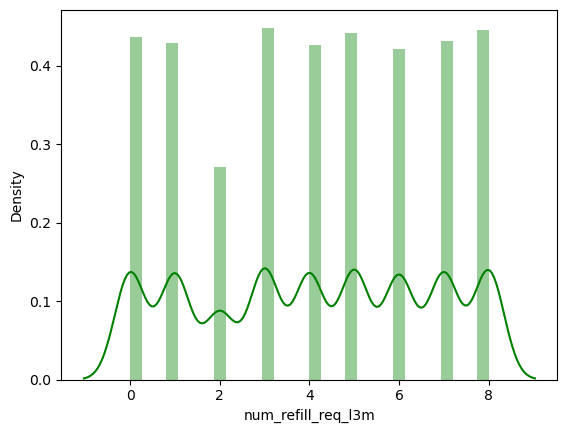

BoxPlot of num_refill_req_l3m
----------------------------------------------------------------------------


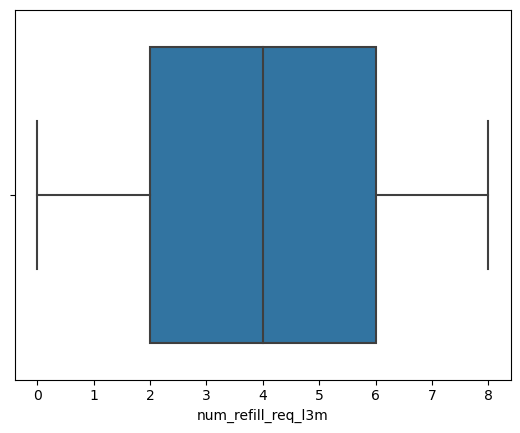

Description of transport_issue_l1y
----------------------------------------------------------------------------
count    25000.000000
mean         0.655900
std          0.918161
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.500000
Name: transport_issue_l1y, dtype: float64 Distribution of transport_issue_l1y
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


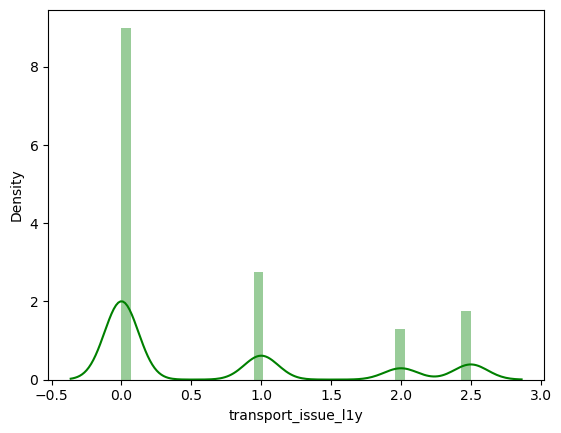

BoxPlot of transport_issue_l1y
----------------------------------------------------------------------------


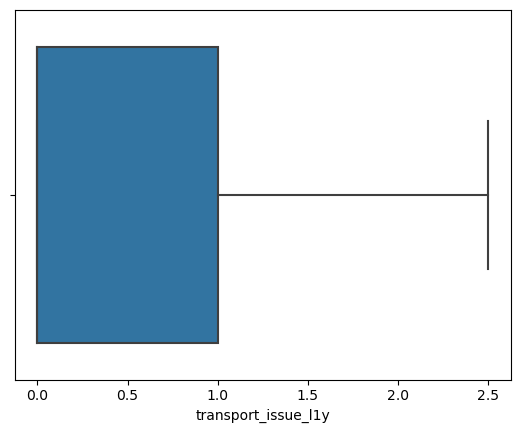

Description of Competitor_in_mkt
----------------------------------------------------------------------------
count    25000.000000
mean         3.099200
std          1.120772
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          7.000000
Name: Competitor_in_mkt, dtype: float64 Distribution of Competitor_in_mkt
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


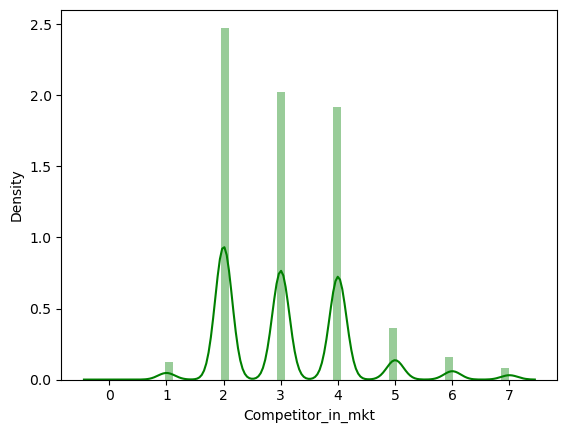

BoxPlot of Competitor_in_mkt
----------------------------------------------------------------------------


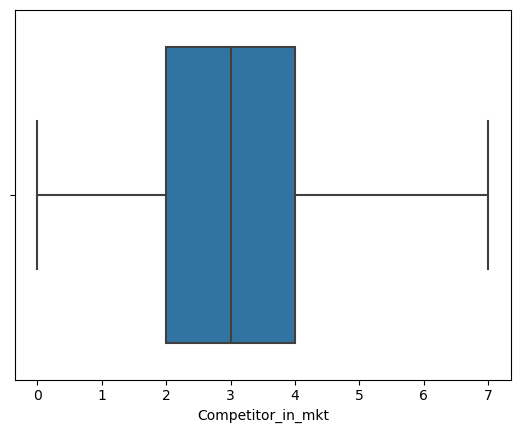

Description of retail_shop_num
----------------------------------------------------------------------------
count    25000.000000
mean      4958.893200
std        969.402141
min       2532.500000
25%       4313.000000
50%       4859.000000
75%       5500.000000
max       7280.500000
Name: retail_shop_num, dtype: float64 Distribution of retail_shop_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


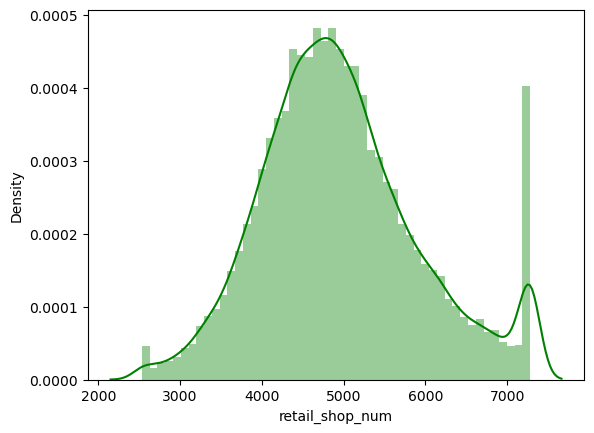

BoxPlot of retail_shop_num
----------------------------------------------------------------------------


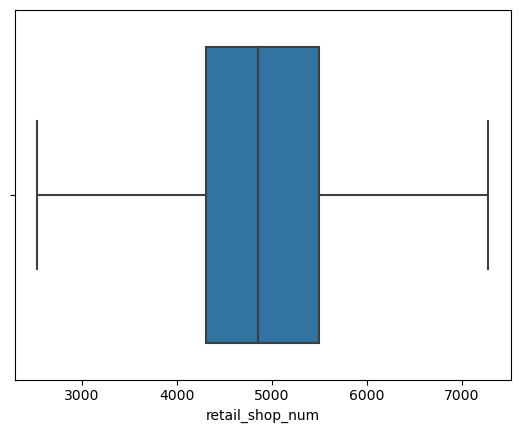

Description of distributor_num
----------------------------------------------------------------------------
count    25000.000000
mean        42.418120
std         16.064329
min         15.000000
25%         29.000000
50%         42.000000
75%         56.000000
max         70.000000
Name: distributor_num, dtype: float64 Distribution of distributor_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


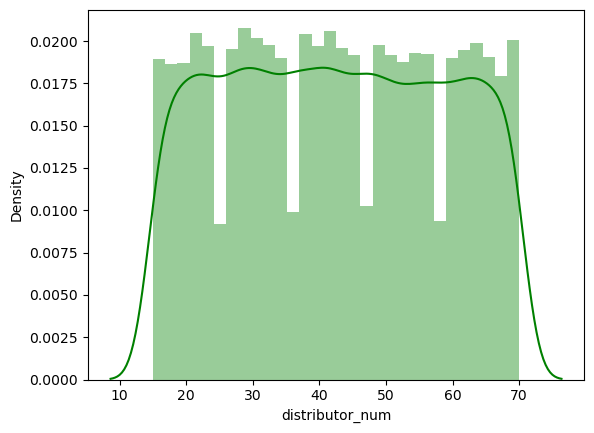

BoxPlot of distributor_num
----------------------------------------------------------------------------


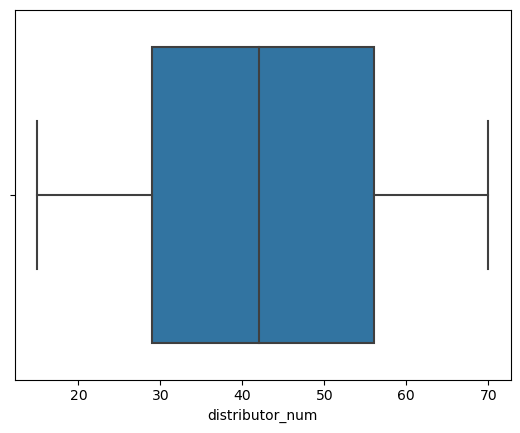

Description of dist_from_hub
----------------------------------------------------------------------------
count    25000.000000
mean       163.537320
std         62.718609
min         55.000000
25%        109.000000
50%        164.000000
75%        218.000000
max        271.000000
Name: dist_from_hub, dtype: float64 Distribution of dist_from_hub
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


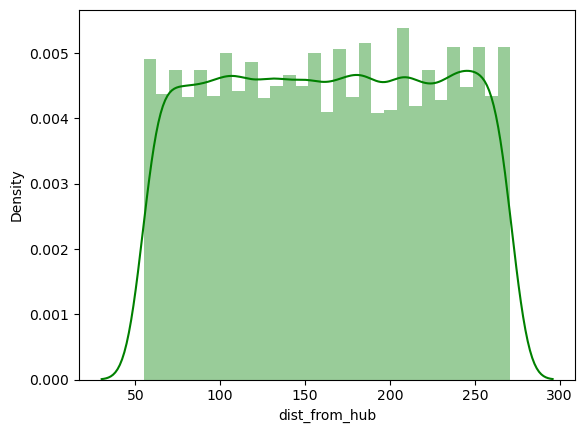

BoxPlot of dist_from_hub
----------------------------------------------------------------------------


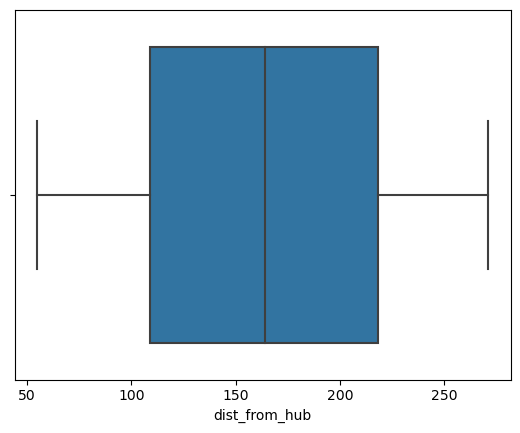

Description of workers_num
----------------------------------------------------------------------------
count    25000.000000
mean        28.781220
std          7.173285
min         10.500000
25%         24.000000
50%         28.000000
75%         33.000000
max         46.500000
Name: workers_num, dtype: float64 Distribution of workers_num
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


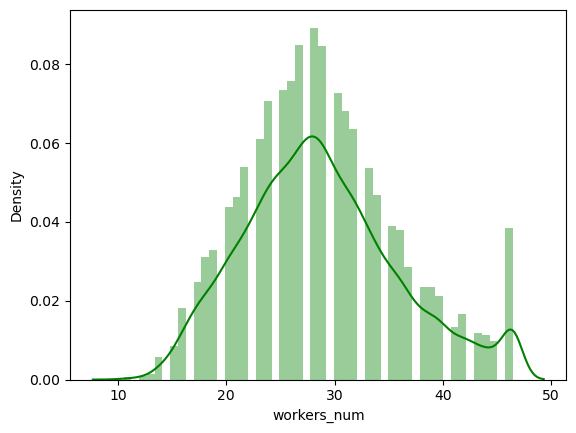

BoxPlot of workers_num
----------------------------------------------------------------------------


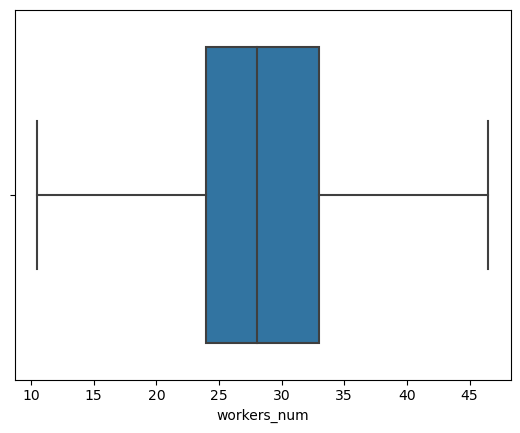

Description of wh_est_year
----------------------------------------------------------------------------
count    25000.000000
mean      2009.837800
std          6.682311
min       1996.000000
25%       2005.000000
50%       2010.000000
75%       2015.000000
max       2023.000000
Name: wh_est_year, dtype: float64 Distribution of wh_est_year
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


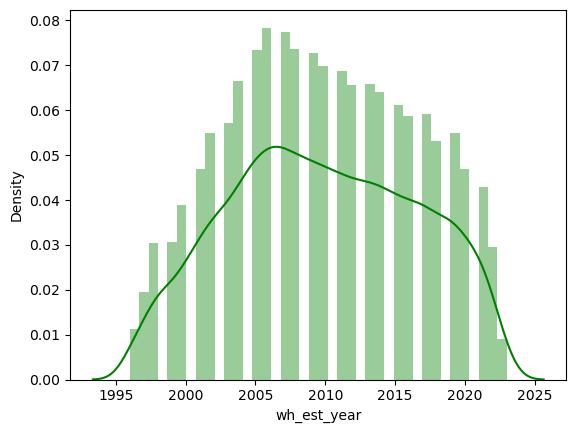

BoxPlot of wh_est_year
----------------------------------------------------------------------------


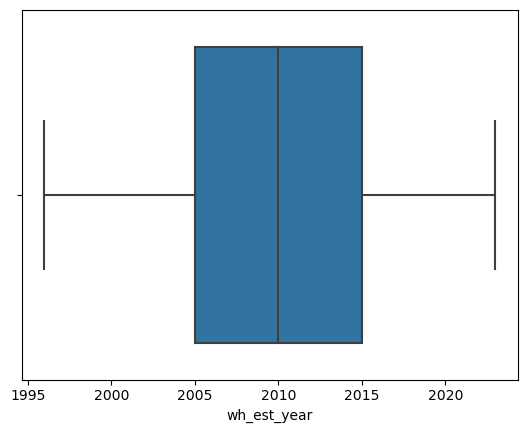

Description of storage_issue_reported_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        17.130440
std          9.161108
min          0.000000
25%         10.000000
50%         18.000000
75%         24.000000
max         39.000000
Name: storage_issue_reported_l3m, dtype: float64 Distribution of storage_issue_reported_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


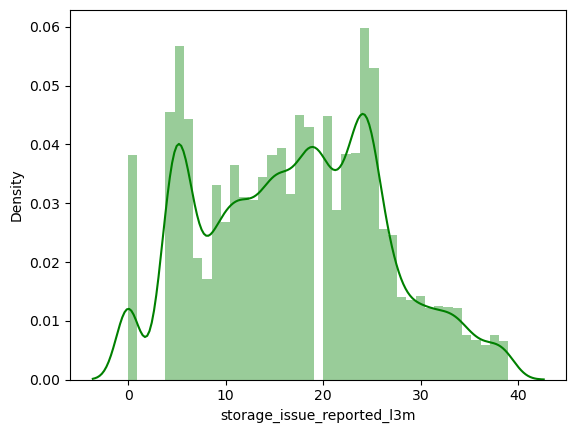

BoxPlot of storage_issue_reported_l3m
----------------------------------------------------------------------------


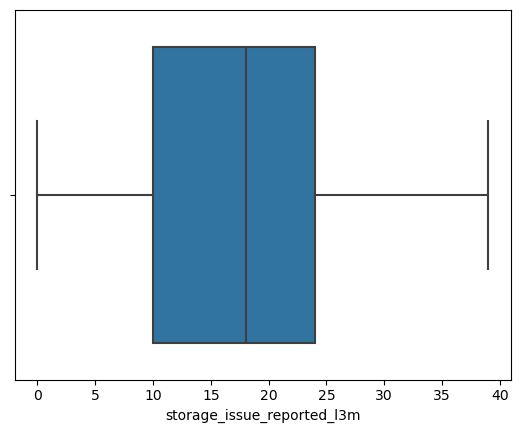

Description of wh_breakdown_l3m
----------------------------------------------------------------------------
count    2.500000e+04
mean     3.482040e+00
std      1.690335e+00
min     -4.440892e-16
25%      2.000000e+00
50%      3.000000e+00
75%      5.000000e+00
max      6.000000e+00
Name: wh_breakdown_l3m, dtype: float64 Distribution of wh_breakdown_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


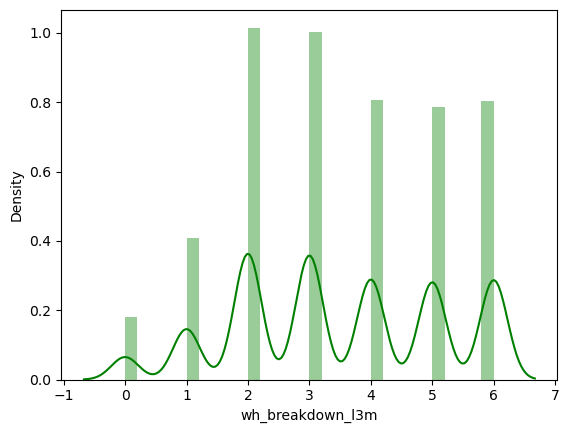

BoxPlot of wh_breakdown_l3m
----------------------------------------------------------------------------


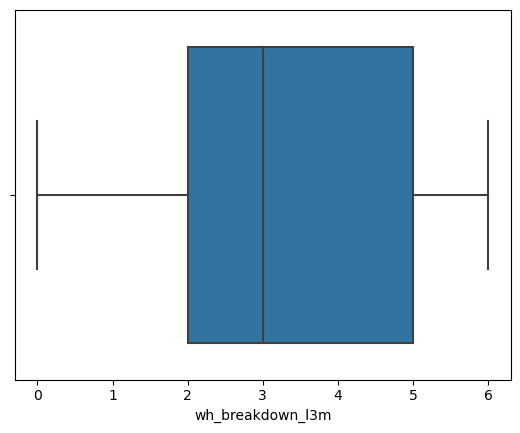

Description of govt_check_l3m
----------------------------------------------------------------------------
count    25000.000000
mean        18.812280
std          8.632382
min          1.000000
25%         11.000000
50%         21.000000
75%         26.000000
max         32.000000
Name: govt_check_l3m, dtype: float64 Distribution of govt_check_l3m
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


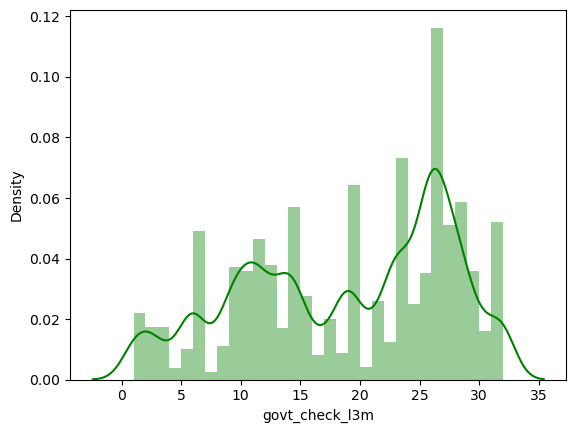

BoxPlot of govt_check_l3m
----------------------------------------------------------------------------


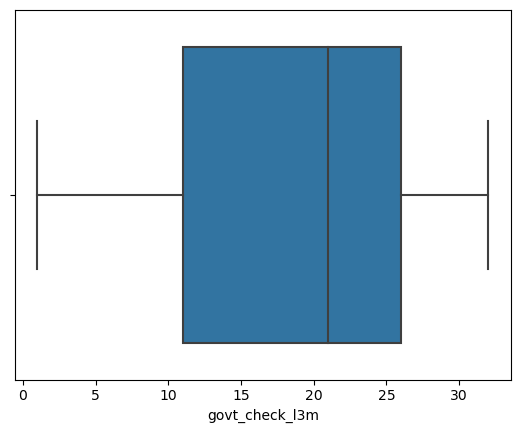

Description of product_wg_ton
----------------------------------------------------------------------------
count    25000.000000
mean     22102.632920
std      11607.755077
min       2065.000000
25%      13059.000000
50%      22101.000000
75%      30103.000000
max      55151.000000
Name: product_wg_ton, dtype: float64 Distribution of product_wg_ton
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


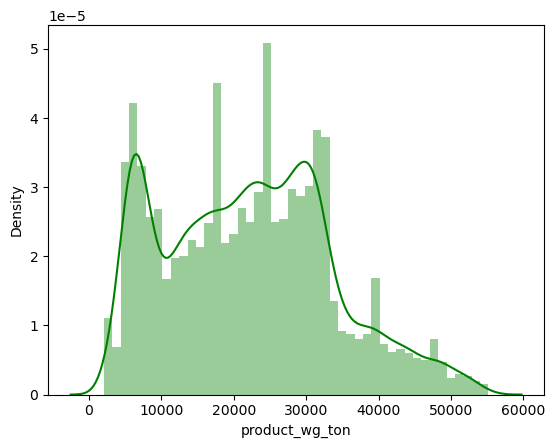

BoxPlot of product_wg_ton
----------------------------------------------------------------------------


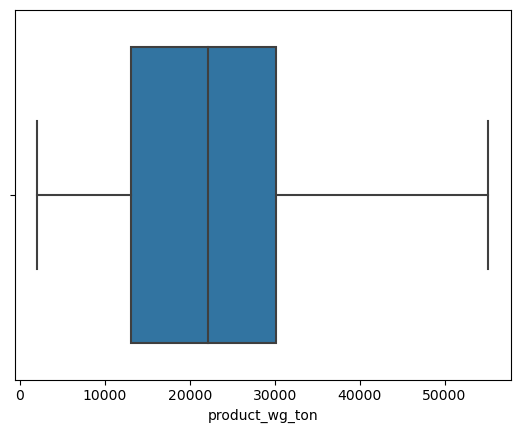

Description of flood_impacted
----------------------------------------------------------------------------
count    25000.000000
mean         0.098160
std          0.297537
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_impacted, dtype: float64 Distribution of flood_impacted
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


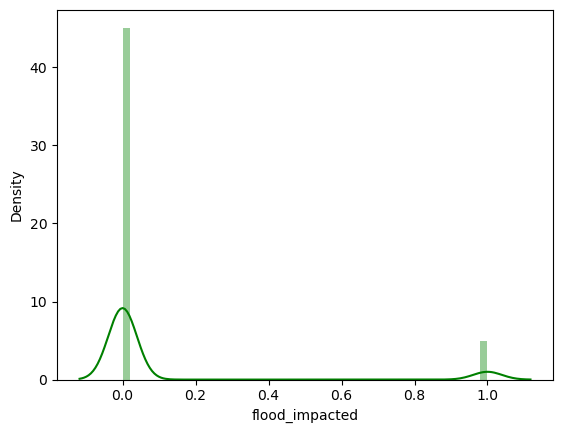

BoxPlot of flood_impacted
----------------------------------------------------------------------------


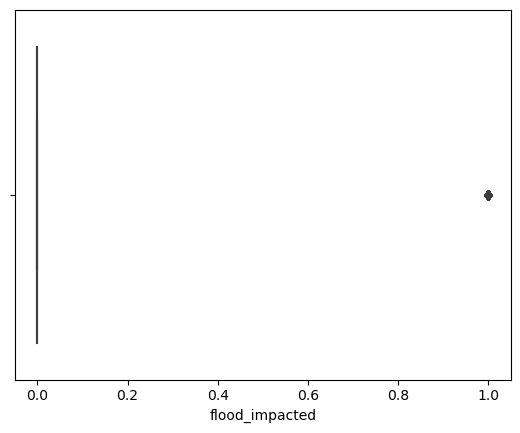

Description of flood_proof
----------------------------------------------------------------------------
count    25000.000000
mean         0.054640
std          0.227281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: flood_proof, dtype: float64 Distribution of flood_proof
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


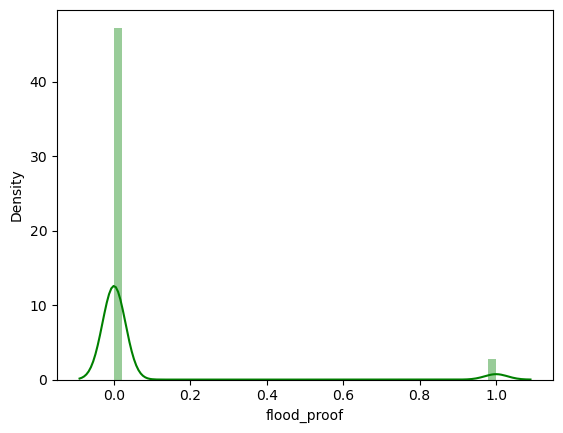

BoxPlot of flood_proof
----------------------------------------------------------------------------


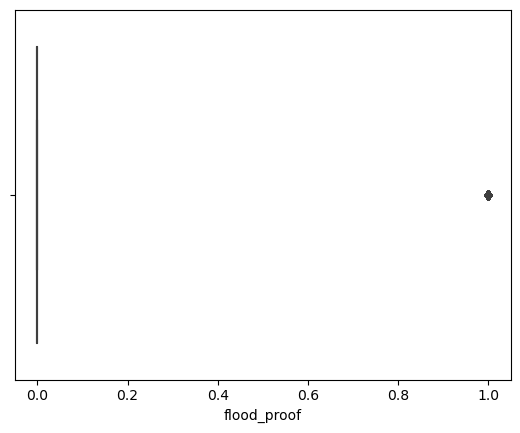

Description of electric_supply
----------------------------------------------------------------------------
count    25000.000000
mean         0.656880
std          0.474761
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: electric_supply, dtype: float64 Distribution of electric_supply
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


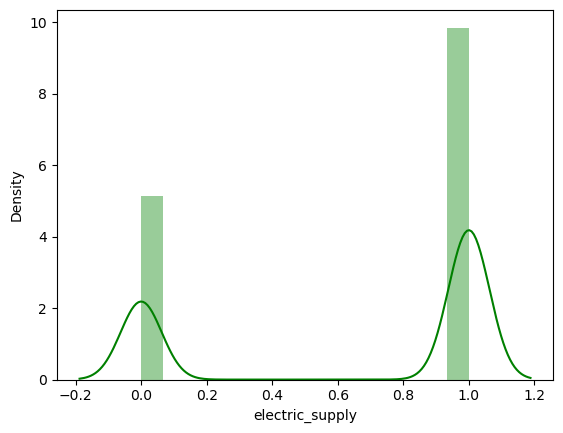

BoxPlot of electric_supply
----------------------------------------------------------------------------


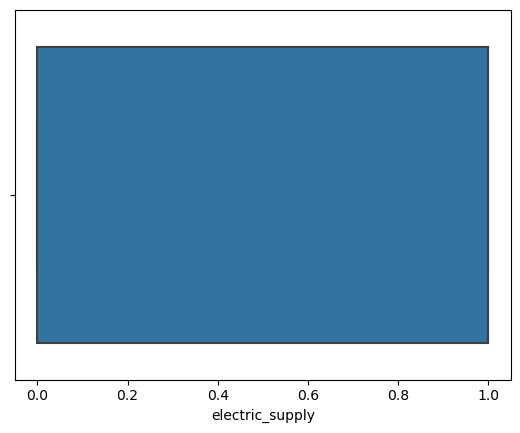

Description of temp_reg_mach
----------------------------------------------------------------------------
count    25000.000000
mean         0.303280
std          0.459684
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: temp_reg_mach, dtype: float64 Distribution of temp_reg_mach
----------------------------------------------------------------------------


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


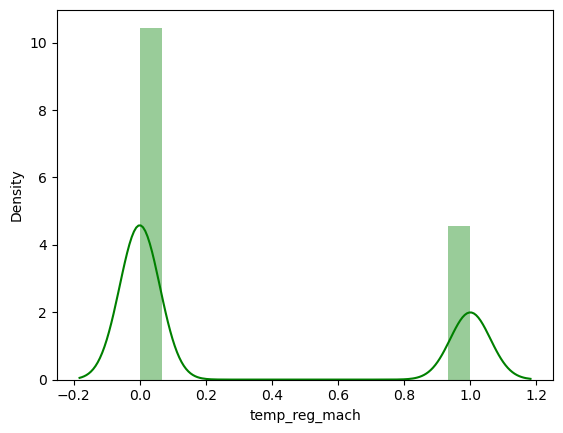

BoxPlot of temp_reg_mach
----------------------------------------------------------------------------


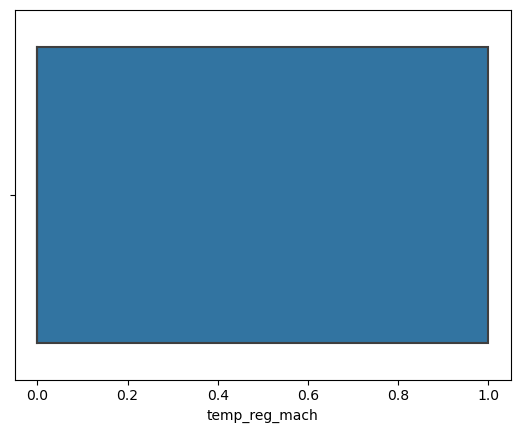

In [491]:
for x in lstnumericcolumns1:
    univariateAnalysis_numeric(x,20)

<AxesSubplot:>

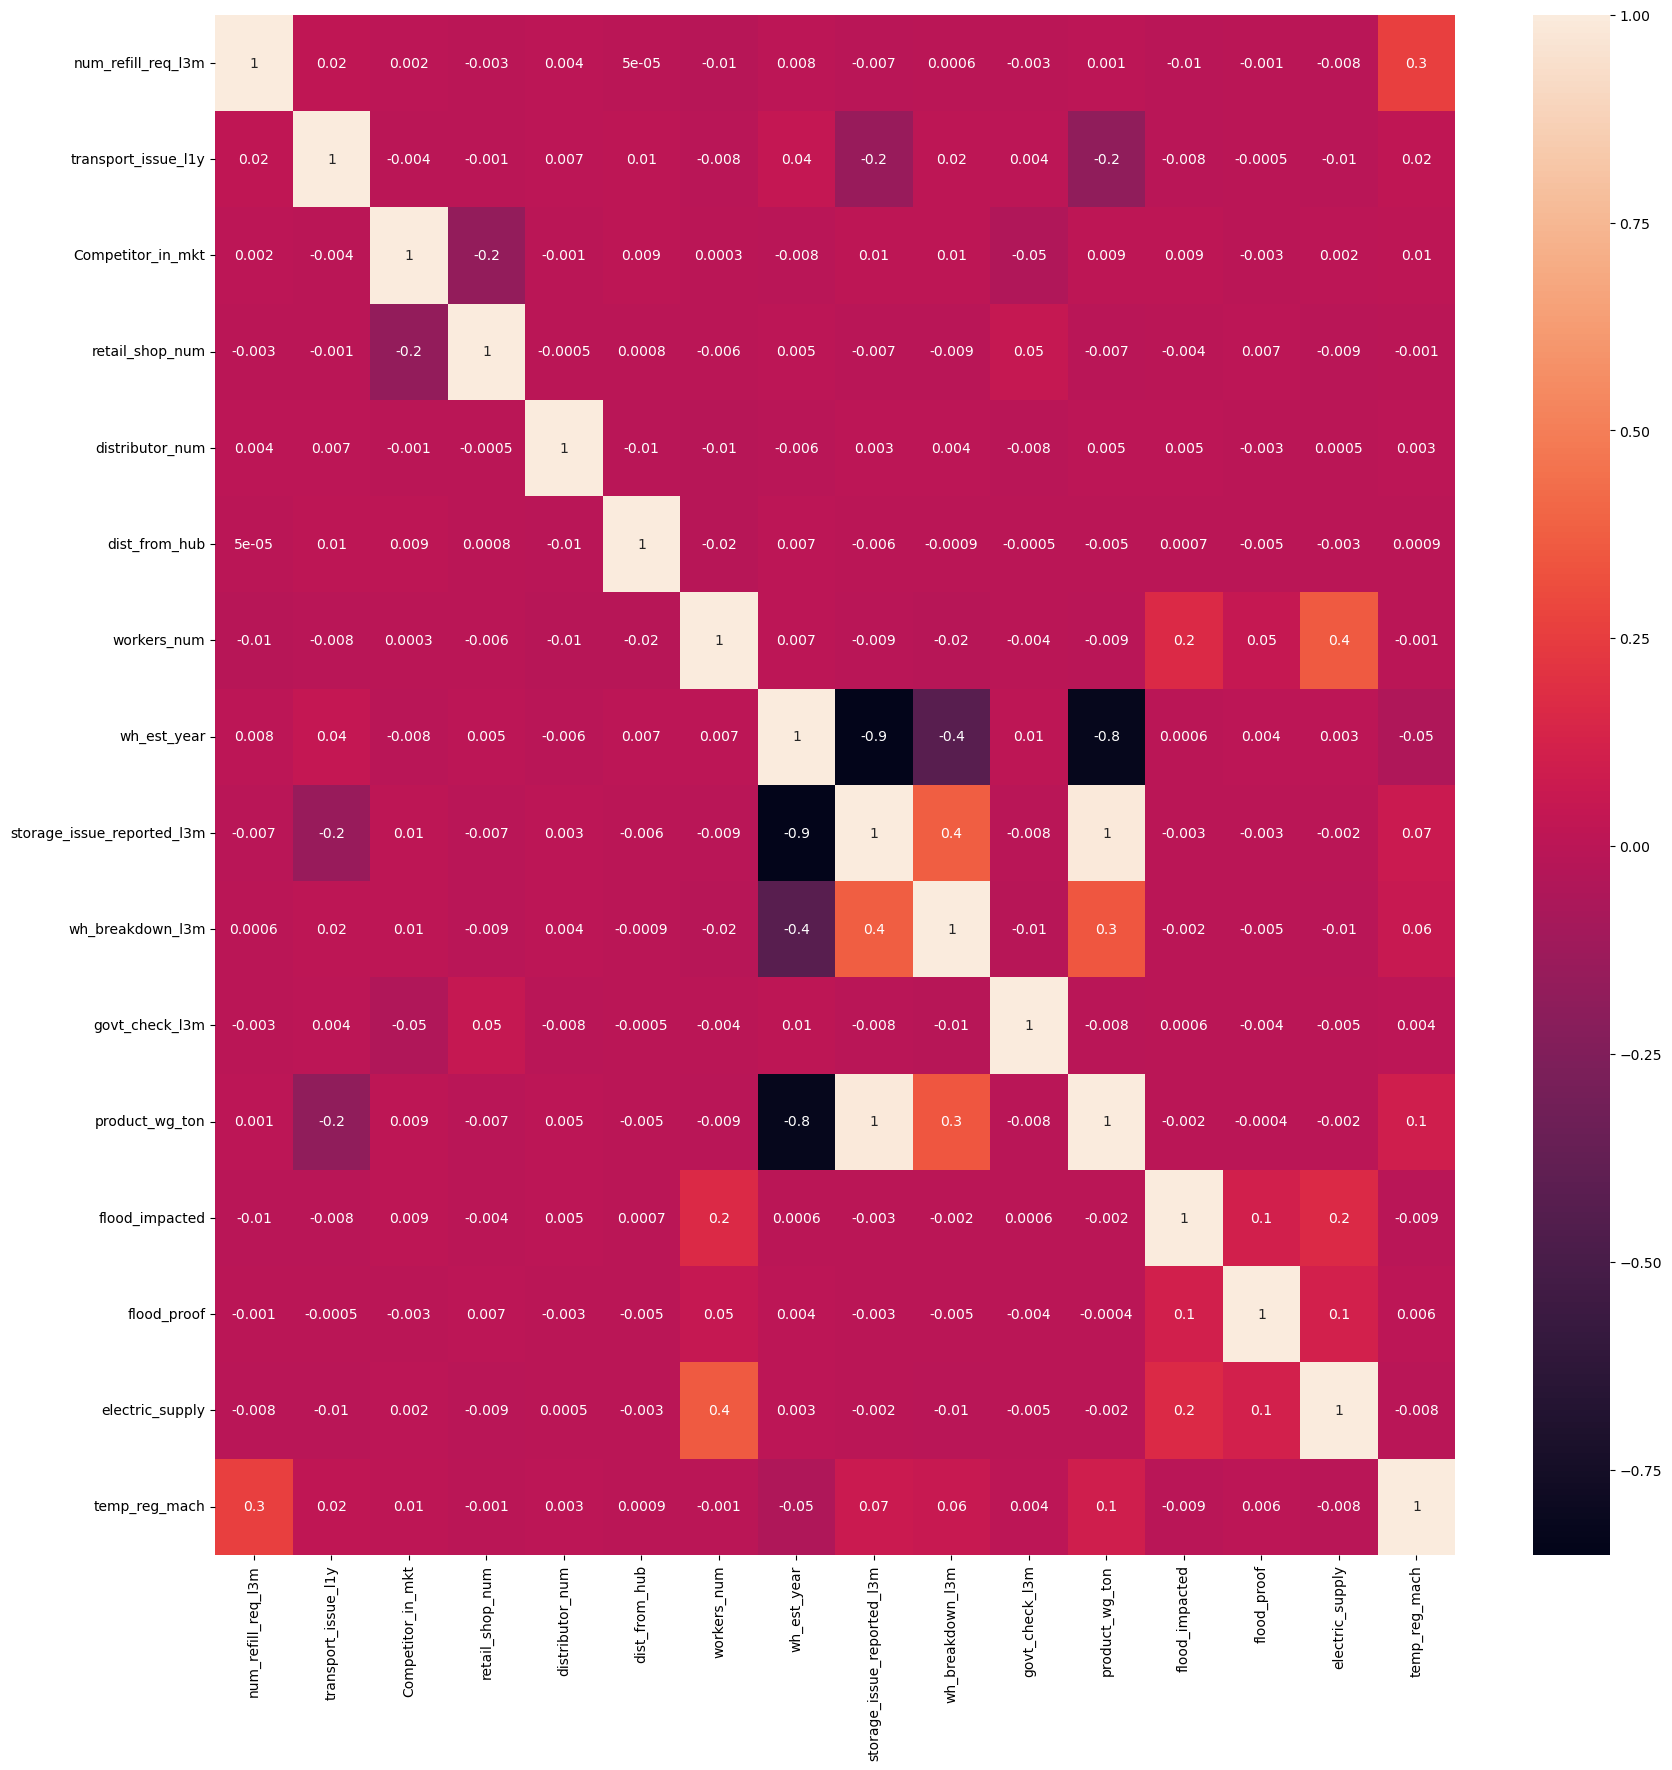

In [492]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(), annot = True, fmt='.00g')

In [493]:
# Let us see the significant correlation either negative or positive among independent attributes..
c = df2.corr().abs() # Since there may be positive as well as -ve correlation
s = c.unstack() # 
so = s.sort_values(ascending=False) # Sorting according to the correlation
so=so[(so<1)].drop_duplicates().to_frame() # Due to symmetry.. dropping duplicate entries.
so.columns = ['correlation']
so

correlation
storage_issue_reported_l3m product_wg_ton                 0.986777
wh_est_year                storage_issue_reported_l3m     0.852499
product_wg_ton             wh_est_year                    0.826842
wh_est_year                wh_breakdown_l3m               0.431803
storage_issue_reported_l3m wh_breakdown_l3m               0.376986
electric_supply            workers_num                    0.360431
product_wg_ton             wh_breakdown_l3m               0.342685
num_refill_req_l3m         temp_reg_mach                  0.260928
transport_issue_l1y        product_wg_ton                 0.181500
retail_shop_num            Competitor_in_mkt              0.165157
electric_supply            flood_impacted                 0.164815
workers_num                flood_impacted                 0.161799
transport_issue_l1y        storage_issue_reported_l3m     0.150176
flood_proof                electric_supply                0.114811
                           flood_impacted                 0.107015
temp_reg_mach              product_wg_ton                 0.101638
                           storage_issue_reported_l3m     0.067309
wh_breakdown_l3m           temp_reg_mach                  0.059160
temp_reg_mach              wh_est_year                    0.053642
workers_num                flood_proof                    0.048663
govt_check_l3m             retail_shop_num                0.048388
Competitor_in_mkt          govt_check_l3m                 0.045098
wh_est_year                transport_issue_l1y            0.039922
num_refill_req_l3m         transport_issue_l1y            0.017975
dist_from_hub              workers_num                    0.017398
workers_num                wh_breakdown_l3m               0.016226
temp_reg_mach              transport_issue_l1y            0.016204
wh_breakdown_l3m           transport_issue_l1y            0.015394
distributor_num            workers_num                    0.013584
dist_from_hub              transport_issue_l1y            0.013541
wh_breakdown_l3m           govt_check_l3m                 0.013273
workers_num                num_refill_req_l3m             0.013107
Competitor_in_mkt          wh_breakdown_l3m               0.012701
distributor_num            dist_from_hub                  0.011838
transport_issue_l1y        electric_supply                0.011809
num_refill_req_l3m         flood_impacted                 0.010548
wh_breakdown_l3m           electric_supply                0.010371
wh_est_year                govt_check_l3m                 0.009974
temp_reg_mach              Competitor_in_mkt              0.009773
Competitor_in_mkt          storage_issue_reported_l3m     0.009570
flood_impacted             Competitor_in_mkt              0.009304
electric_supply            retail_shop_num                0.009247
retail_shop_num            wh_breakdown_l3m               0.009073
Competitor_in_mkt          dist_from_hub                  0.009044
                           product_wg_ton                 0.008893
storage_issue_reported_l3m workers_num                    0.008789
workers_num                product_wg_ton                 0.008617
temp_reg_mach              flood_impacted                 0.008554
govt_check_l3m             product_wg_ton                 0.008500
flood_impacted             transport_issue_l1y            0.008358
wh_est_year                num_refill_req_l3m             0.008075
electric_supply            num_refill_req_l3m             0.007959
distributor_num            govt_check_l3m                 0.007934
Competitor_in_mkt          wh_est_year                    0.007920
workers_num                transport_issue_l1y            0.007703
govt_check_l3m             storage_issue_reported_l3m     0.007602
electric_supply            temp_reg_mach                  0.007600
wh_est_year                workers_num                    0.007279
distributor_num            transport_issue_l1y            0.007277
retail_shop_num            product_

predictors haveing highly correlation with dependent variables are good predictors

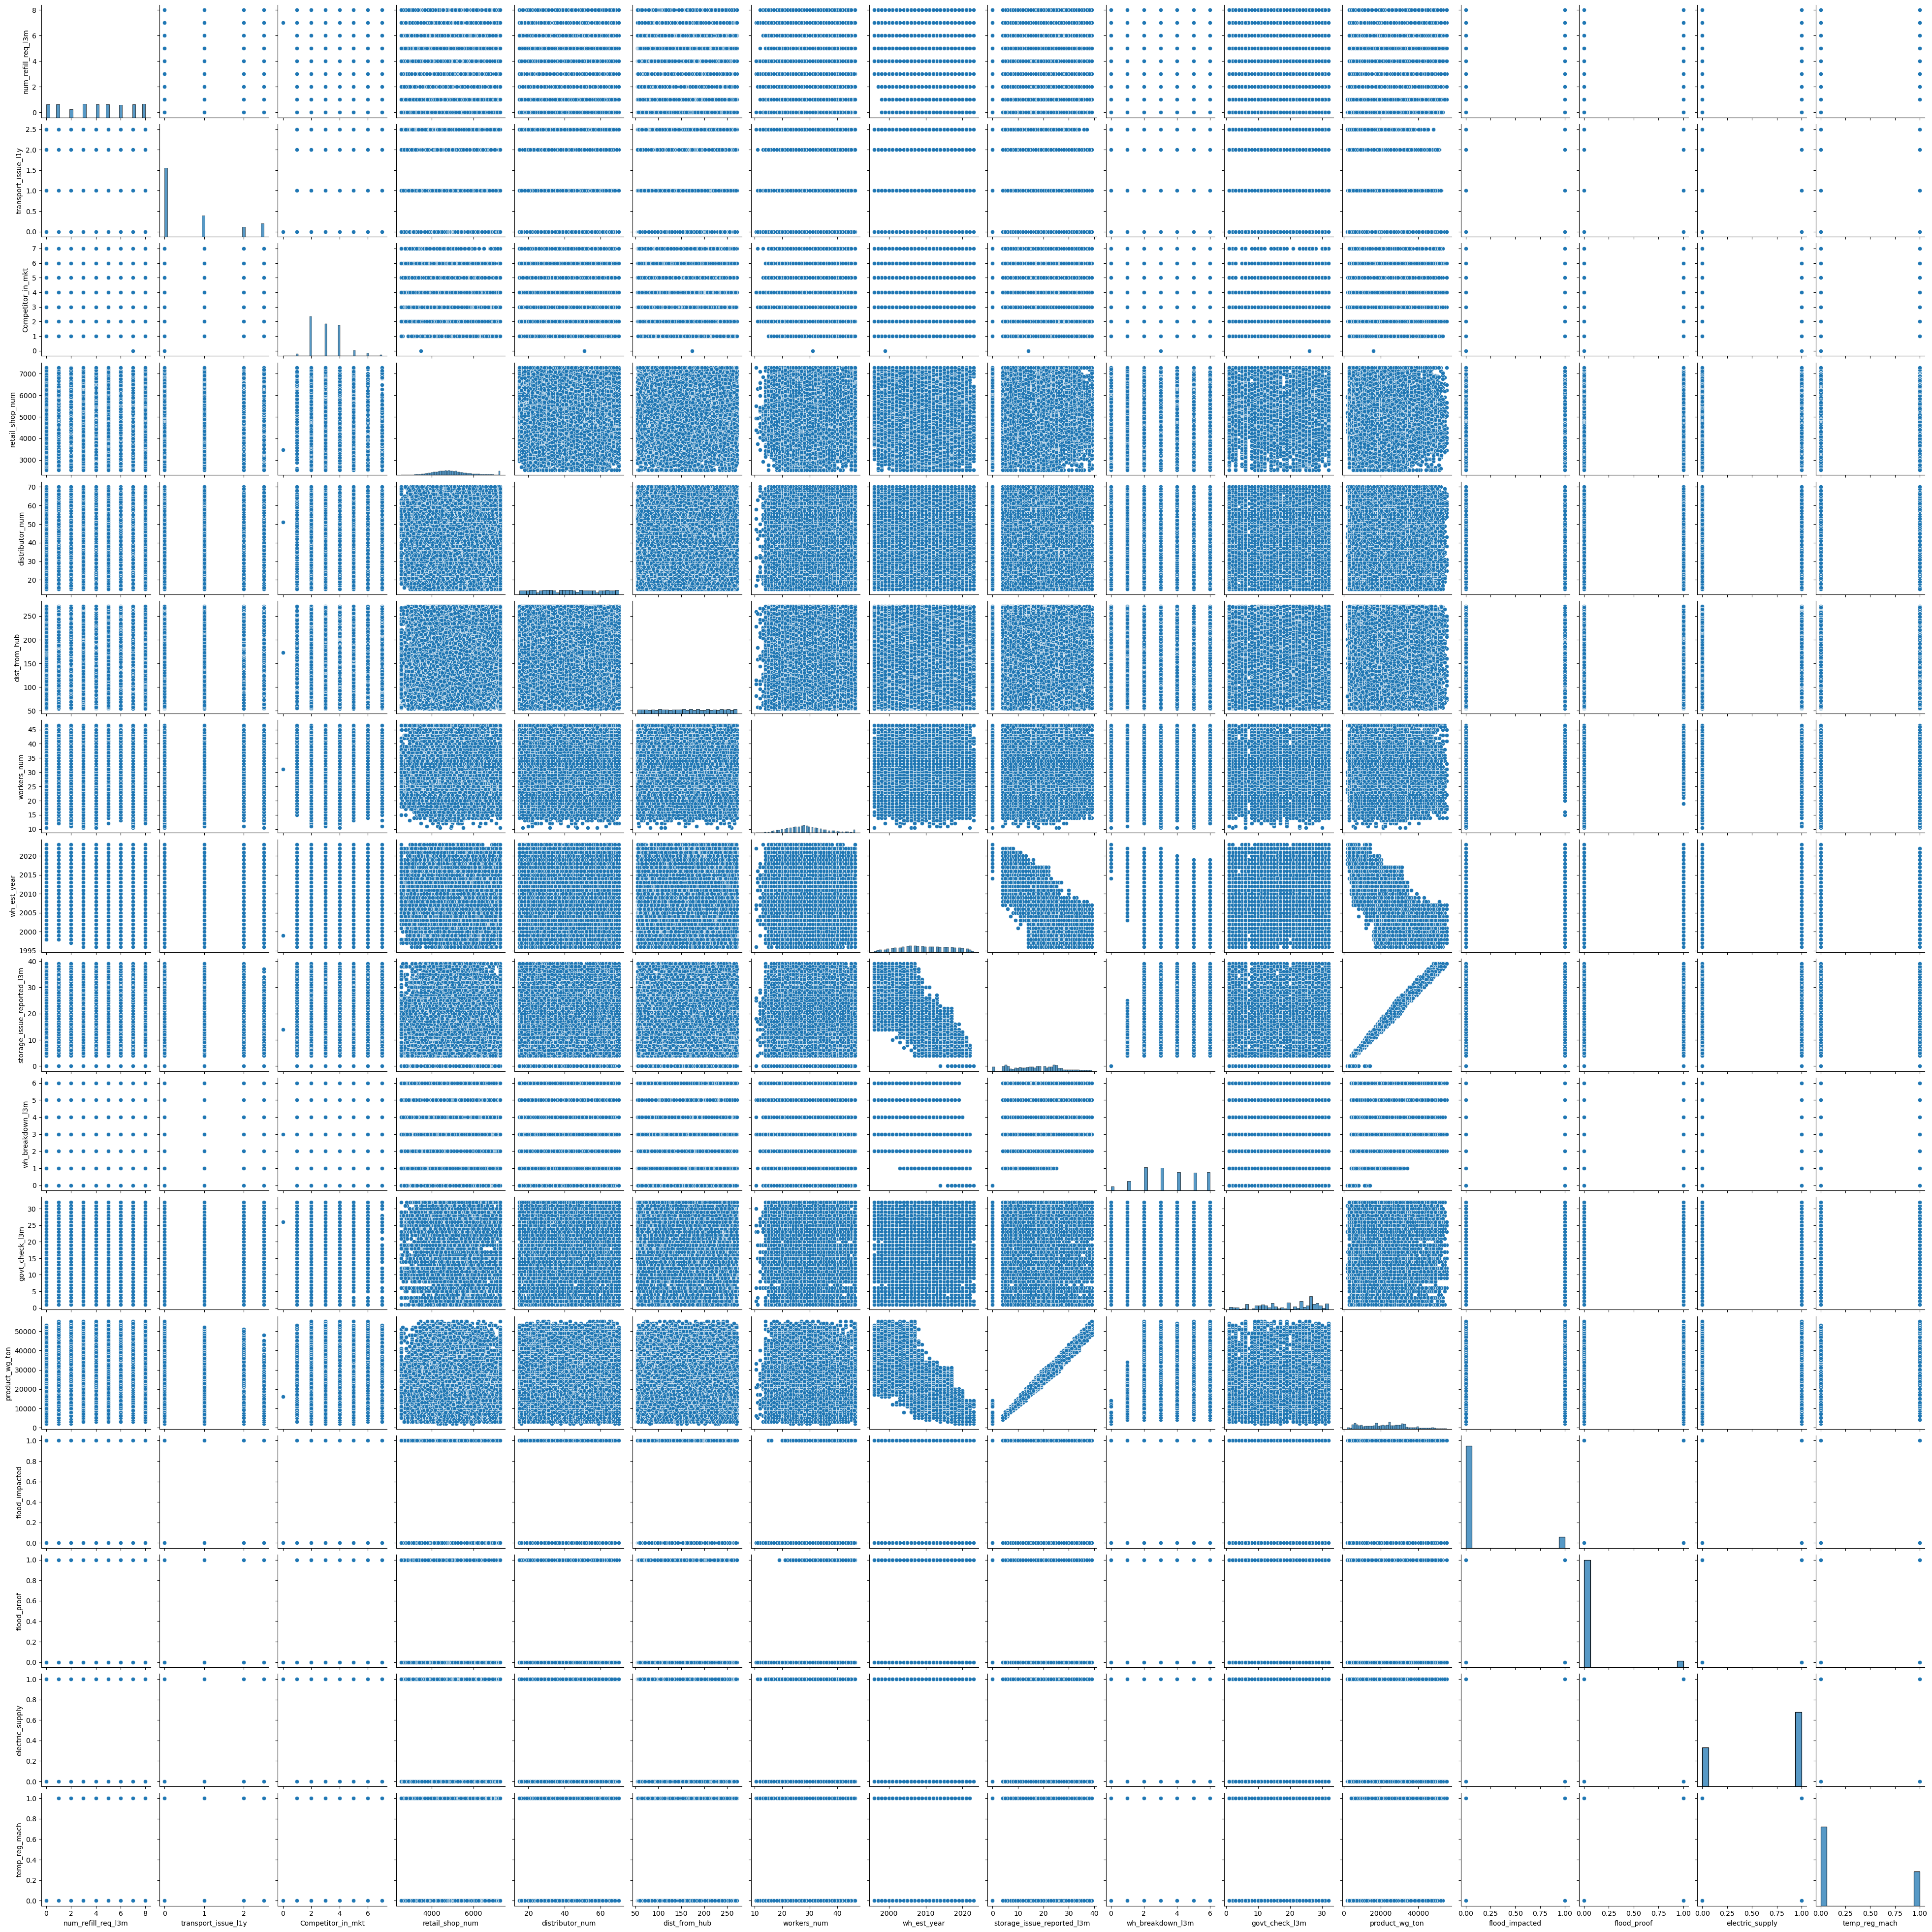

In [494]:
sns.pairplot(df2)

In [495]:
df1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                 3.0                  1.0                2.0   
1                 0.0                  0.0                4.0   
2                 1.0                  0.0                4.0   
3                 7.0                  2.5                2.0   
4                 3.0                  1.0                2.0   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0             24.0           91.0         29.0         2011   
1           6217.0             47.0          210.0         31.0         2017   
2           4306.0             64.0          161.0         37.0         2007   
3           6000.0             50.0          103.0         21.0         2011   
4           4740.0             42.0          112.0         25.0         2009   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                        13.0               5.0            15.0   
1                         4.0               3.0            17.0   
2                        17.0               6.0            22.0   
3                        17.0               3.0            27.0   
4                        18.0               6.0            24.0   

   product_wg_ton  Location_type  WH_capacity_size  zone  WH_regional_zone  \
0           17115              1                 0     3                 5   
1            5074              0                 2     1                 4   
2           23137              0                 1     2                 1   
3           22115              0                 1     1                 2   
4           24071              0                 2     1                 4   

   wh_owner_type  approved_wh_govt_certificate  flood_impacted  flood_proof  \
0              1                             0               0            1   
1              0                             0               0            0   
2              0                             0               0            0   
3              1                             1               0            0   
4              0                             4               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

df1 = df1.replace({
    'Location_type': 
    {0.0: 'Rural',
     1.0: 'Urban '},    
    'WH_capacity_size': 
    {2.0: 'Large', 
    1.0:"Mid",
    0.0:"Small"},
    "zone" :
    {1.0 : "North",
    3.0 :  "West",
    2.0 : "South",
    0.0:"East"},
"wh_owner_type": 
    {0.0: "Company Owned",
    1.0:  "Rented"},
"WH_regional_zone" :
    {5.0 : "Zone 6",
4.0 : "Zone 5",
3.0 : "Zone 4",
1.0 : "Zone 2",
2.0 : "Zone 3",
0.0 :  "Zone 1"},
 "approved_wh_govt_certificate" :
    {4.0 : "C",
3.0 :   "B+",
2.0  :  "B",
0.0 :   "A",
1.0 :  "A+"}})

In [496]:
df1[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m']]= sc.fit_transform(df1[['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m']])

In [497]:
df1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0           -0.417807             0.374779          -0.980772   
1           -1.568750            -0.714377           0.803748   
2           -1.185102            -0.714377           0.803748   
3            1.116783             2.008512          -0.980772   
4           -0.417807             0.374779          -0.980772   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0        -0.317618        -1.146546      -1.156575     0.030500     0.173925   
1         1.297843         0.285226       0.740827     0.309318     1.071836   
2        -0.673514         1.343493      -0.040456     1.145771    -0.424682   
3         1.073989         0.471979      -0.965240    -1.084772     0.173925   
4        -0.225807        -0.026028      -0.821739    -0.527136    -0.125378   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                   -0.450876          0.898041       -0.441634   
1                   -1.433309         -0.285180       -0.209944   
2                   -0.014239          1.489652        0.369282   
3                   -0.014239         -0.285180        0.948508   
4                    0.094921          1.489652        0.600972   

   product_wg_ton  Location_type  WH_capacity_size  zone  WH_regional_zone  \
0           17115              1                 0     3                 5   
1            5074              0                 2     1                 4   
2           23137              0                 1     2                 1   
3           22115              0                 1     1                 2   
4           24071              0                 2     1                 4   

   wh_owner_type  approved_wh_govt_certificate  flood_impacted  flood_proof  \
0              1                             0               0            1   
1              0                             0               0            0   
2              0                             0               0            0   
3              1                             1               0            0   
4              0                             4               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

<AxesSubplot:xlabel='product_wg_ton', ylabel='Count'>

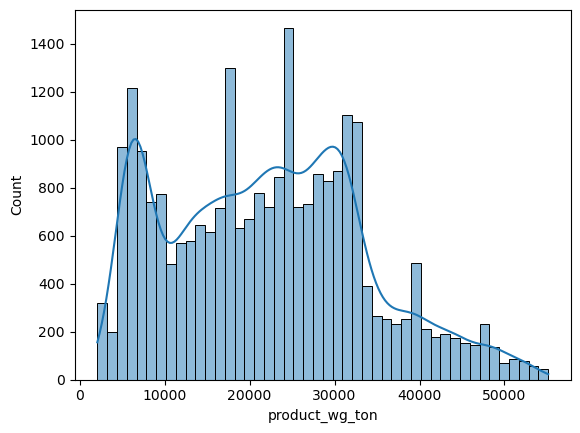

In [498]:
sns.histplot(data = df1["product_wg_ton"], kde= True)

In [499]:
from scipy import stats

In [500]:
_, p = stats.normaltest(y)
print(p)

2.1673091111517606e-200


## Clustering

### Creating the Dendrogram

df1 = df1.replace({
    'Location_type': 
    {'Rural':0.0,
      'Urban ':1.0},    
    'WH_capacity_size': 
    {'Large':2.0, 
    "Mid" :1.0,
    "Small":0.0},
    "zone" :
    { "North":1.0,
     "West":3.0,
    "South":2.0,
    "East":0.0},
"wh_owner_type": 
    { "Company Owned":0.0,
     "Rented":1.0},
"WH_regional_zone" :
    {"Zone 6":5.0,
 "Zone 5":4.0,
"Zone 4":3.0,
"Zone 2":1.0,
"Zone 3":2.0,
"Zone 1":0.0 },
 "approved_wh_govt_certificate" :
    {"C":4.0,
 "B+":3.0,
"B":2.0,
"A":0.0,
"A+":1.0}})

In [501]:
scaled_df1 = df1.drop("product_wg_ton",axis =1)

In [502]:
scaled_df1.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0           -0.417807             0.374779          -0.980772   
1           -1.568750            -0.714377           0.803748   
2           -1.185102            -0.714377           0.803748   
3            1.116783             2.008512          -0.980772   
4           -0.417807             0.374779          -0.980772   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0        -0.317618        -1.146546      -1.156575     0.030500     0.173925   
1         1.297843         0.285226       0.740827     0.309318     1.071836   
2        -0.673514         1.343493      -0.040456     1.145771    -0.424682   
3         1.073989         0.471979      -0.965240    -1.084772     0.173925   
4        -0.225807        -0.026028      -0.821739    -0.527136    -0.125378   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                   -0.450876          0.898041       -0.441634   
1                   -1.433309         -0.285180       -0.209944   
2                   -0.014239          1.489652        0.369282   
3                   -0.014239         -0.285180        0.948508   
4                    0.094921          1.489652        0.600972   

   Location_type  WH_capacity_size  zone  WH_regional_zone  wh_owner_type  \
0              1                 0     3                 5              1   
1              0                 2     1                 4              0   
2              0                 1     2                 1              0   
3              0                 1     1                 2              1   
4              0                 2     1                 4              0   

   approved_wh_govt_certificate  flood_impacted  flood_proof  electric_supply  \
0                             0               0            1                1   
1                             0               0            0                1   
2                             0               0            0                0   
3                             1               0            0                0   
4                             4               1            0                1   

   temp_reg_mach  
0              0  
1              0  
2              0  
3              1  
4              0

## K-Means Clustering

In [503]:
df2 = scaled_df1

In [504]:
from sklearn.cluster import KMeans 

### Forming 2 Clusters with K=2

In [505]:
k_means = KMeans(n_clusters = 2,random_state=1)

In [506]:
k_means.fit(df2)

KMeans(n_clusters=2, random_state=1)

### Cluster Output for all the observations

In [507]:
k_means.labels_

array([1, 1, 0, ..., 1, 0, 0])

### Within Cluster Sum of Squares

In [508]:
k_means.inertia_

396414.6458312278

### Forming clusters with K = 1,3,4,5,6 and comparing the WSS

In [509]:
k_means = KMeans(n_clusters = 1,random_state=1)
k_means.fit(df2)
k_means.inertia_

453145.22312000004

In [510]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df2)
k_means.inertia_

366329.9010525867

In [511]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df2)
k_means.inertia_

347043.7229265935

In [512]:
k_means = KMeans(n_clusters = 5,random_state=1)
k_means.fit(df2)
k_means.inertia_

334630.58075256867

In [513]:
k_means = KMeans(n_clusters = 6,random_state=1)
k_means.fit(df2)
k_means.inertia_

326225.634295689

### Calculating WSS for other values of K - Elbow Method

In [514]:
wss =[] 

In [515]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(scaled_df1)
    wss.append(KM.inertia_)

In [516]:
wss

[453145.22312000004,
 396414.6458312279,
 366329.78246721625,
 347043.87916334183,
 334630.7956366386,
 326225.6955897688,
 318934.2515732829,
 312956.6801469405,
 308098.8237541697,
 303586.6259879115]

In [517]:
K=[1,2,3,4,5,6,7,8,9,10]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

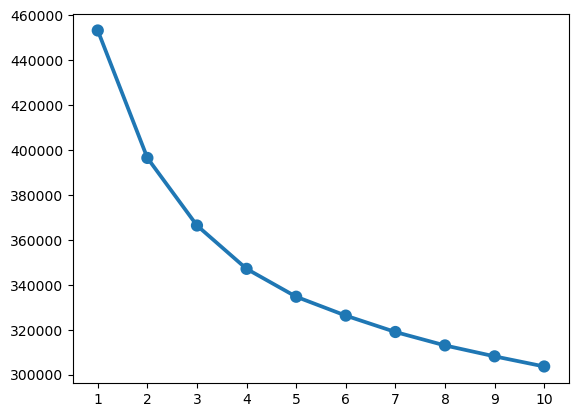

In [518]:
sns.pointplot(K, wss)

# KMeans with K=3

In [519]:
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(df2)
labels = k_means.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [520]:
from sklearn.metrics import silhouette_samples, silhouette_score

In [521]:
# Calculating silhouette_score
silhouette_score(df2,labels, random_state=1)

0.09852382664425269

#### KMeans with K=4

In [522]:
k_means = KMeans(n_clusters = 4,random_state=1)
k_means.fit(df2)
labels = k_means.labels_

### Cluster evaluation for 4 clusters

In [523]:
# Calculating silhouette_score
silhouette_score(df2,labels, random_state=1)

0.09270544527950425

#### KMeans with K=5

In [524]:
k_means = KMeans(n_clusters =5)
k_means.fit(df2)
labels = k_means.labels_

In [525]:
# Calculating silhouette_score
silhouette_score(df2,labels, random_state=1)

0.08530082201546134

## df1.head()

In [526]:
df2["Clus_kmeans5"] = labels
df2.head(20).sort_values(by="Clus_kmeans5")

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
19           -1.185102             0.374779          -0.980772   
15           -1.185102             0.374779          -0.088512   
12           -0.034160            -0.714377          -0.088512   
8             1.500430             0.374779           0.803748   
6             1.500430            -0.714377           0.803748   
0            -0.417807             0.374779          -0.980772   
1            -1.568750            -0.714377           0.803748   
11            1.116783            -0.714377           1.696008   
14            1.500430             0.374779           0.803748   
16           -1.568750            -0.714377          -0.980772   
3             1.116783             2.008512          -0.980772   
18           -0.034160             0.374779           0.803748   
2            -1.185102            -0.714377           0.803748   
13            0.733135             0.374779          -0.980772   
17           -1.568750             0.374779          -0.980772   
5             1.500430            -0.714377          -0.980772   
4            -0.417807             0.374779          -0.980772   
7            -1.185102            -0.714377           0.803748   
10            1.116783             0.374779          -0.088512   
9            -0.034160             2.008512          -0.088512   

    retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
19         0.742851        -1.457801       0.405991    -0.666545    -0.873637   
15         0.106363         0.471979       0.421936    -1.363589     0.922184   
12         0.054784         0.347477      -1.092797    -0.108909     1.820095   
8          0.435439        -0.026028      -0.630405    -0.945363     0.473229   
6         -0.525998        -0.275032      -1.379799    -0.248318     0.024274   
0         -0.317618        -1.146546      -1.156575     0.030500     0.173925   
1          1.297843         0.285226       0.740827     0.309318     1.071836   
11        -0.342376        -0.150530       0.979995    -1.781816     1.071836   
14         0.065100         1.592497      -0.550682     1.145771     1.371140   
16         0.629377        -1.644554       1.075662    -0.108909     0.922184   
3          1.073989         0.471979      -0.965240    -1.084772     0.173925   
18        -0.372292         0.969987      -0.072346    -0.945363    -1.322593   
2         -0.673514         1.343493      -0.040456     1.145771    -0.424682   
13         1.959089        -1.022044       1.251052     1.006362    -0.275030   
17         0.598429        -0.897542       1.553999    -0.945363     0.173925   
5          0.097079        -0.337283      -0.183957     0.866953    -0.125378   
4         -0.225807        -0.026028      -0.821739    -0.527136    -0.125378   
7          2.294354         0.160725       1.235108    -0.805954    -0.723986   
10        -0.346502        -0.710789      -0.215846     1.145771    -1.621897   
9         -1.124317        -0.461785      -1.363854     1.982225     0.024274   

    storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
19                    0.531558         -0.876791        0.253437   
15                   -1.433309         -0.285180       -0.789170   
12                   -1.433309         -1.468401       -2.063467   
8                    -0.450876          0.898041       -1.947622   
6                     0.749876         -0.285180       -1.484241   
0                    -0.450876          0.898041       -0.441634   
1                    -1.433309         -0.285180       -0.209944   
11                   -0.669194         -0.876791        1.064353   
14                   -1.214991         -0.285180       -1.136705   
16                   -0.887513          0.898041       -0.905015   
3                    -0.014239         -0.285180        0.948508   
18                    1.295673          0.898041        0.948508   
2                    -0.014239 

In [527]:
df2.to_csv("cluster.csv")

## Cluster Profiling

In [528]:
df2.Clus_kmeans5.value_counts().sort_index()

0    4021
1    5472
2    4455
3    5397
4    5655
Name: Clus_kmeans5, dtype: int64

In [529]:
clust_profile = df2
clust_profile=clust_profile.groupby('Clus_kmeans5').mean()
clust_profile['freq']=df2.Clus_kmeans5.value_counts().sort_index()
clust_profile

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
Clus_kmeans5                                                               
0                      -0.047136             0.023600          -0.112699   
1                       0.002298             0.041085           0.000029   
2                       0.022935             0.040086           0.004619   
3                       0.014036            -0.009564           0.034655   
4                      -0.000171            -0.078988           0.043394   

              retail_shop_num  distributor_num  dist_from_hub  workers_num  \
Clus_kmeans5                                                                 
0                    0.030692        -0.019371      -0.015994     0.008484   
1                   -0.024998         0.010990       0.030883     0.024220   
2                    0.021200        -0.008115       0.059402     0.030281   
3                    0.018452         0.007710       0.004904    -0.028175   
4                   -0.031947         0.002174      -0.069988    -0.026435   

              wh_est_year  storage_issue_reported_l3m  wh_breakdown_l3m  \
Clus_kmeans5                                                              
0                0.318999                   -0.281287         -0.181012   
1               -0.158060                    0.150936          0.170313   
2                1.170160                   -1.109629         -0.875728   
3               -0.268431                    0.267549          0.229369   
4               -0.739546                    0.672779          0.434901   

              govt_check_l3m  Location_type  WH_capacity_size      zone  \
Clus_kmeans5                                                              
0                   0.118577       0.072867          0.689381  1.871425   
1                  -0.210198       0.088999          1.569810  1.759686   
2                  -0.043470       0.044669          1.418855  1.893154   
3                   0.241395       0.091162          0.850843  1.971651   
4                  -0.077055       0.101149          1.429355  1.868435   

              WH_regional_zone  wh_owner_type  approved_wh_govt_certificate  \
Clus_kmeans5                                                                  
0                     0.985078       0.449391                      3.270579   
1                     4.658077       0.452485                      0.730446   
2                     4.174860       0.449832                      3.333109   
3                     1.778395       0.457476                      0.785807   
4                     4.181963       0.471441                      3.176658   

              flood_impacted  flood_proof  electric_supply  temp_reg_mach  \
Clus_kmeans5                                                                
0                   0.096991     0.050734         0.662024       0.216613   
1                   0.101243     0.058114         0.662281       0.427632   
2                   0.093378     0.056790         0.659933       0.216162   
3                   0.103205     0.056142         0.644617       0.421716   
4                   0.094960     0.050928         0.657294       0.200177   

              freq  
Clus_kmeans5        
0             4021  
1             5472  
2             4455  
3             5397  
4             5655

df1 = df1.replace({
    'Location_type': 
    {0.0: 'Rural',
     1.0: 'Urban '},    
    'WH_capacity_size': 
    {2.0: 'Large', 
    1.0:"Mid",
    0.0:"Small"},
    "zone" :
    {1.0 : "North",
    3.0 :  "West",
    2.0 : "South",
    0.0:"East"},
"wh_owner_type": 
    {0.0: "Company Owned",
    1.0:  "Rented"},
"WH_regional_zone" :
    {5.0 : "Zone 6",
4.0 : "Zone 5",
3.0 : "Zone 4",
1.0 : "Zone 2",
2.0 : "Zone 3",
0.0 :  "Zone 1"},
 "approved_wh_govt_certificate" :
    {4.0 : "C",
3.0 :   "B+",
2.0  :  "B",
0.0 :   "A",
1.0 :  "A+"}})

### Split the Data

In [530]:
# Copy all the predictor variables into X dataframe
X = df1.drop('product_wg_ton', axis=1)

# Copy target into the y dataframe. 
y = df1.product_wg_ton

In [531]:
# Split X and y into training and test set in 75:25 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [532]:
concat = pd.concat([X_train, X_test], axis = 0)

In [533]:
##Using loop for selecting colums for VIF<5

In [534]:
import statsmodels.formula.api as SM

In [535]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

x_vif = concat 
thres = 5
while True:
    Cols = range(x_vif.shape[1])
    
    vif = np.array([variance_inflation_factor(x_vif.values, i) for i in Cols])
    if all(vif < thres):
        break
    else:
        Cols = np.delete(Cols,np.argmax(vif))
        x_vif = x_vif.iloc[:,Cols]

In [536]:
pd.DataFrame(x_vif.columns)


0
0             num_refill_req_l3m
1            transport_issue_l1y
2              Competitor_in_mkt
3                retail_shop_num
4                distributor_num
5                  dist_from_hub
6                    workers_num
7                    wh_est_year
8     storage_issue_reported_l3m
9               wh_breakdown_l3m
10                govt_check_l3m
11                 Location_type
12              WH_capacity_size
13                          zone
14                 wh_owner_type
15  approved_wh_govt_certificate
16                flood_impacted
17                   flood_proof
18               electric_supply
19                 temp_reg_mach

In [537]:
X_train.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m', 'Location_type', 'WH_capacity_size', 'zone',
       'WH_regional_zone', 'wh_owner_type', 'approved_wh_govt_certificate',
       'flood_impacted', 'flood_proof', 'electric_supply', 'temp_reg_mach'],
      dtype='object')

In [538]:
x_vif.shape

(25000, 20)

In [539]:
vif

array([1.07073448, 1.05750031, 1.04406799, 1.03489667, 1.00066165,
       1.00099192, 1.16902041, 3.97076532, 3.86986631, 1.24241278,
       1.06032876, 1.09195947, 3.03596435, 3.91498689, 1.79494461,
       2.86478792, 1.16238172, 1.08087044, 2.94737451, 1.50156345])

we can see that there are 20 columns with vif<5 so there is moderate multicollinearity is present but is not severe enough to warrant corrective measures. WH_regional_zone id dropped because VIF>5

In [540]:
X_train_lr = X_train.drop("WH_regional_zone",axis=1)

In [541]:
X_train_lr.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m', 'Location_type', 'WH_capacity_size', 'zone',
       'wh_owner_type', 'approved_wh_govt_certificate', 'flood_impacted',
       'flood_proof', 'electric_supply', 'temp_reg_mach'],
      dtype='object')

In [542]:
X_test_lr = X_test.drop("WH_regional_zone",axis=1)

In [543]:
from sklearn.linear_model import LinearRegression

In [544]:
LR = LinearRegression()

In [545]:
model_1 = LR.fit(X_train_lr,y_train)

In [546]:
# Let us explore the coefficients for each of the independent attributes

for col, col_name in enumerate(X_train_lr.columns):
    print("The coefficient for {} is {}".format(col_name, model_1.coef_[col]))

The coefficient for num_refill_req_l3m is -7.846523336964496
The coefficient for transport_issue_l1y is -364.351005037771
The coefficient for Competitor_in_mkt is -8.097485680740672
The coefficient for retail_shop_num is -12.885309047244455
The coefficient for distributor_num is 19.633146611779278
The coefficient for dist_from_hub is 16.116665480557547
The coefficient for workers_num is 2.271348444966318
The coefficient for wh_est_year is 364.8572017101267
The coefficient for storage_issue_reported_l3m is 11790.472520084033
The coefficient for wh_breakdown_l3m is -366.4249653677358
The coefficient for govt_check_l3m is -0.4978031457320998
The coefficient for Location_type is -91.17134247285696
The coefficient for WH_capacity_size is -13.468071715016313
The coefficient for zone is -3.069773077266234
The coefficient for wh_owner_type is 19.660116157953453
The coefficient for approved_wh_govt_certificate is -110.99918391771857
The coefficient for flood_impacted is 20.721810873935215
The c

In [547]:
# Let us check the intercept for the model

intercept = model_1.intercept_

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 22086.933203855806


In [548]:
from sklearn import metrics

In [549]:
# Model score - R2 or coeff of determinant
# R^2=1–RSS / TSS =  RegErr / TSS


In [550]:
model_1.score(X_train_lr, y_train)

0.9772027296129586

In [551]:
model_1.score(X_test_lr, y_test)

0.9782672131661598

In [552]:
y_train_predict = model_1.predict(X_train_lr)
y_train_predict

array([24531.07872776, 19350.02391451, 39715.08093659, ...,
        8177.30723096, 33180.27371943, 27513.49733961])

In [553]:
y_test_predict = model_1.predict(X_test_lr)
y_test_predict

array([29878.55141339,  7112.3799155 ,  8955.1178334 , ...,
       36121.10286729, 37416.34632799, 44241.74880887])

In [554]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_predict, squared=False)
rmse_train 

1758.2274204114815

In [555]:
rmse_test = mean_squared_error(y_test, y_test_predict, squared=False)
rmse_test

1698.2459010732528

Text(0, 0.5, 'y_train_predict')

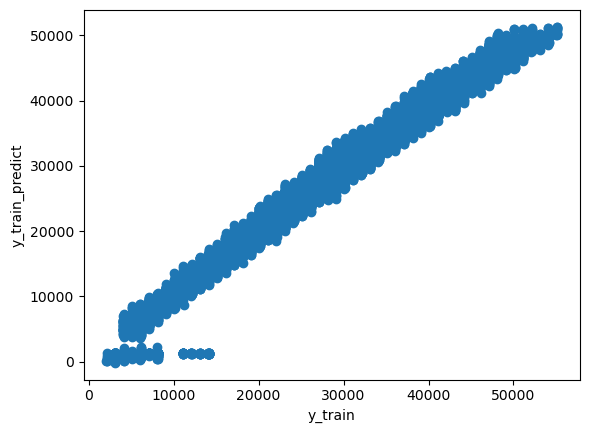

In [556]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

Text(0, 0.5, 'y_test_predict')

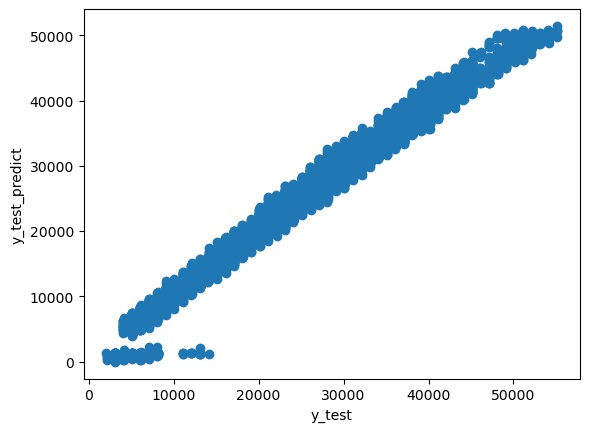

In [557]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

In [558]:
#R^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no 
# influence on the predicted variable. Instead we use adjusted R^2 which removes the statistical chance that improves R^2
# Scikit does not provide a facility for adjusted R^2... so we use 
# statsmodel, a library that gives results similar to
# what you obtain in R language
# This library expects the X and Y to be given in one single dataframe


In [559]:
data_train = pd.concat([X_train_lr, y_train], axis=1)
data_train.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
4289            -1.568750             1.463934           0.803748   
19621            0.733135             1.463934          -0.088512   
14965            0.733135            -0.714377           0.803748   
12321            0.733135             0.374779          -0.088512   
6269            -0.034160             2.008512          -0.088512   

       retail_shop_num  distributor_num  dist_from_hub  workers_num  \
4289          0.074384         0.036223      -0.582571     0.448727   
19621         2.394933         1.032238       1.346719    -0.108909   
14965         0.687145        -0.212781      -1.603022    -0.248318   
12321        -0.741599         0.720983       1.538054     0.309318   
6269          2.394933        -1.208797      -0.311514     1.006362   

       wh_est_year  storage_issue_reported_l3m  wh_breakdown_l3m  \
4289     -0.424682                    0.313239          0.898041   
19621    -1.023289                   -0.232557         -0.285180   
14965    -1.472245                    1.513991         -0.876791   
12321    -0.574334                    1.186513         -0.876791   
6269     -1.921200                    0.640717          1.489652   

       govt_check_l3m  Location_type  WH_capacity_size  zone  wh_owner_type  \
4289        -0.557480              0                 2     3              1   
19621        1.296044              0                 0     3              1   
14965       -0.905015              0                 1     3              1   
12321       -1.947622              0                 0     2              0   
6269         0.832663              1                 1     3              0   

       approved_wh_govt_certificate  flood_impacted  flood_proof  \
4289                              2               0            0   
19621                             1               0            0   
14965                             2               0            0   
12321                             2               0            0   
6269                              3               0            0   

       electric_supply  temp_reg_mach  product_wg_ton  
4289                 1              0           23086  
19621                1              1           19108  
14965                1              0           38125  
12321                1              0           33123  
6269                 1              0           26089

In [560]:
df1.columns

Index(['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m', 'product_wg_ton', 'Location_type', 'WH_capacity_size',
       'zone', 'WH_regional_zone', 'wh_owner_type',
       'approved_wh_govt_certificate', 'flood_impacted', 'flood_proof',
       'electric_supply', 'temp_reg_mach'],
      dtype='object')

In [561]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula= 'product_wg_ton ~ num_refill_req_l3m+transport_issue_l1y+ Competitor_in_mkt+retail_shop_num+distributor_num+dist_from_hub+workers_num+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+govt_check_l3m+Location_type+WH_capacity_size+zone+wh_owner_type+approved_wh_govt_certificate+flood_impacted+flood_proof+electric_supply+temp_reg_mach', data = data_train).fit()
lm1.params

Intercept                       22086.933204
num_refill_req_l3m                 -7.846523
transport_issue_l1y              -364.351005
Competitor_in_mkt                  -8.097486
retail_shop_num                   -12.885309
distributor_num                    19.633147
dist_from_hub                      16.116665
workers_num                         2.271348
wh_est_year                       364.857202
storage_issue_reported_l3m      11790.472520
wh_breakdown_l3m                 -366.424965
govt_check_l3m                     -0.497803
Location_type                     -91.171342
WH_capacity_size                  -13.468072
zone                               -3.069773
wh_owner_type                      19.660116
approved_wh_govt_certificate     -110.999184
flood_impacted                     20.721811
flood_proof                        45.368218
electric_supply                     9.329817
temp_reg_mach                     893.330254
dtype: float64

In [562]:
print(lm1.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.746e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:34   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17479   BIC:                         3.114e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

dropping govt_check_l3m

In [563]:
lm2 = smf.ols(formula= 'product_wg_ton ~ num_refill_req_l3m+transport_issue_l1y+ Competitor_in_mkt+retail_shop_num+distributor_num+dist_from_hub+workers_num+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+zone+wh_owner_type+approved_wh_govt_certificate+flood_impacted+flood_proof+electric_supply+temp_reg_mach', data = data_train).fit()
lm2.params

Intercept                       22086.866481
num_refill_req_l3m                 -7.845020
transport_issue_l1y              -364.351267
Competitor_in_mkt                  -8.092838
retail_shop_num                   -12.906959
distributor_num                    19.637946
dist_from_hub                      16.116095
workers_num                         2.275250
wh_est_year                       364.849296
storage_issue_reported_l3m      11790.469223
wh_breakdown_l3m                 -366.420423
Location_type                     -91.175899
WH_capacity_size                  -13.559844
zone                               -2.967994
wh_owner_type                      19.641005
approved_wh_govt_certificate     -110.999444
flood_impacted                     20.720972
flood_proof                        45.368328
electric_supply                     9.326624
temp_reg_mach                     893.320999
dtype: float64

In [564]:
print(lm2.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 3.944e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:34   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17480   BIC:                         3.114e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

workers_num  

In [565]:
lm3 = smf.ols(formula= 'product_wg_ton ~ num_refill_req_l3m+transport_issue_l1y+ Competitor_in_mkt+retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+zone+wh_owner_type+approved_wh_govt_certificate+flood_impacted+flood_proof+electric_supply+temp_reg_mach', data = data_train).fit()
lm3.params

Intercept                       22085.955948
num_refill_req_l3m                 -7.869825
transport_issue_l1y              -364.342688
Competitor_in_mkt                  -8.111488
retail_shop_num                   -12.927460
distributor_num                    19.620026
dist_from_hub                      16.071116
wh_est_year                       364.819636
storage_issue_reported_l3m      11790.449226
wh_breakdown_l3m                 -366.440541
Location_type                     -91.190661
WH_capacity_size                  -13.554509
zone                               -2.959239
wh_owner_type                      19.119843
approved_wh_govt_certificate     -110.982346
flood_impacted                     21.455001
flood_proof                        45.359054
electric_supply                    10.855729
temp_reg_mach                     893.339317
dtype: float64

In [566]:
print(lm3.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.163e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:34   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17481   BIC:                         3.114e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

dropping zone 

workers_num  

In [567]:
lm4 = smf.ols(formula= 'product_wg_ton ~ num_refill_req_l3m+transport_issue_l1y+ Competitor_in_mkt+retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+wh_owner_type+approved_wh_govt_certificate+flood_impacted+flood_proof+electric_supply+temp_reg_mach', data = data_train).fit()
lm4.params

Intercept                       22080.030690
num_refill_req_l3m                 -7.901168
transport_issue_l1y              -364.319288
Competitor_in_mkt                  -8.455457
retail_shop_num                   -12.817644
distributor_num                    19.595230
dist_from_hub                      16.044888
wh_est_year                       364.837355
storage_issue_reported_l3m      11790.487250
wh_breakdown_l3m                 -366.471292
Location_type                     -91.067931
WH_capacity_size                  -13.278169
wh_owner_type                      19.181136
approved_wh_govt_certificate     -110.969062
flood_impacted                     21.630590
flood_proof                        45.266430
electric_supply                    10.848855
temp_reg_mach                     893.282508
dtype: float64

In [568]:
print(lm4.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.408e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:34   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17482   BIC:                         3.114e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

electric_supply  

In [569]:
lm5 = smf.ols(formula= 'product_wg_ton ~ num_refill_req_l3m+transport_issue_l1y+ Competitor_in_mkt+retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+wh_owner_type+approved_wh_govt_certificate+flood_impacted+flood_proof+temp_reg_mach', data = data_train).fit()
lm5.params

Intercept                       22087.741312
num_refill_req_l3m                 -7.912286
transport_issue_l1y              -364.397515
Competitor_in_mkt                  -8.457859
retail_shop_num                   -12.868546
distributor_num                    19.608522
dist_from_hub                      16.021889
wh_est_year                       364.773699
storage_issue_reported_l3m      11790.451509
wh_breakdown_l3m                 -366.521295
Location_type                     -91.231816
WH_capacity_size                  -13.228063
wh_owner_type                      16.962972
approved_wh_govt_certificate     -110.937538
flood_impacted                     23.905553
flood_proof                        47.393642
temp_reg_mach                     893.235016
dtype: float64

In [570]:
print(lm5.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.684e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:34   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17483   BIC:                         3.114e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

flood_impacted  

In [571]:
lm6 = smf.ols(formula= 'product_wg_ton ~ num_refill_req_l3m+transport_issue_l1y+ Competitor_in_mkt+retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+wh_owner_type+approved_wh_govt_certificate+flood_proof+temp_reg_mach', data = data_train).fit()
lm6.params

Intercept                       22090.729343
num_refill_req_l3m                 -7.946901
transport_issue_l1y              -364.384125
Competitor_in_mkt                  -8.417760
retail_shop_num                   -12.898183
distributor_num                    19.672060
dist_from_hub                      16.057360
wh_est_year                       364.800855
storage_issue_reported_l3m      11790.465985
wh_breakdown_l3m                 -366.564335
Location_type                     -91.259985
WH_capacity_size                  -13.286531
wh_owner_type                      15.455701
approved_wh_govt_certificate     -110.975454
flood_proof                        50.580226
temp_reg_mach                     893.154886
dtype: float64

In [572]:
print(lm6.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 4.996e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:34   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17484   BIC:                         3.113e+05
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

num_refill_req_l3m 

In [573]:
lm7 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+ Competitor_in_mkt+retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+wh_owner_type+approved_wh_govt_certificate+flood_proof+temp_reg_mach', data = data_train).fit()
lm7.params

Intercept                       22092.667056
transport_issue_l1y              -364.451078
Competitor_in_mkt                  -8.438874
retail_shop_num                   -12.895582
distributor_num                    19.682109
dist_from_hub                      16.085485
wh_est_year                       364.725226
storage_issue_reported_l3m      11790.581743
wh_breakdown_l3m                 -366.542834
Location_type                     -91.584506
WH_capacity_size                  -13.365318
wh_owner_type                      15.290557
approved_wh_govt_certificate     -111.145680
flood_proof                        50.611237
temp_reg_mach                     888.550131
dtype: float64

In [574]:
print(lm7.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 5.353e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17485   BIC:                         3.113e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Competitor_in_mkt

In [575]:
lm8 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+ retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+wh_owner_type+approved_wh_govt_certificate+flood_proof+temp_reg_mach', data = data_train).fit()
lm8.params

Intercept                       22092.404147
transport_issue_l1y              -364.469983
retail_shop_num                   -11.450449
distributor_num                    19.685936
dist_from_hub                      16.018989
wh_est_year                       364.748093
storage_issue_reported_l3m      11790.517237
wh_breakdown_l3m                 -366.582586
Location_type                     -91.918130
WH_capacity_size                  -13.060018
wh_owner_type                      15.265032
approved_wh_govt_certificate     -111.127681
flood_proof                        50.964623
temp_reg_mach                     888.367592
dtype: float64

In [576]:
print(lm8.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 5.765e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17486   BIC:                         3.113e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

wh_owner_type 

In [577]:
lm9 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+ retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+WH_capacity_size+approved_wh_govt_certificate+flood_proof+temp_reg_mach', data = data_train).fit()
lm9.params

Intercept                       22099.324132
transport_issue_l1y              -364.477284
retail_shop_num                   -11.261345
distributor_num                    19.707127
dist_from_hub                      16.032262
wh_est_year                       364.590267
storage_issue_reported_l3m      11790.394119
wh_breakdown_l3m                 -366.488440
Location_type                     -91.901895
WH_capacity_size                  -13.020157
approved_wh_govt_certificate     -111.114818
flood_proof                        49.988146
temp_reg_mach                     888.435039
dtype: float64

In [578]:
print(lm9.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 6.246e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17487   BIC:                         3.113e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

WH_capacity_size 

In [579]:
lm10 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+ retail_shop_num+distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+approved_wh_govt_certificate+flood_proof+temp_reg_mach', data = data_train).fit()
lm10.params

Intercept                       22083.451239
transport_issue_l1y              -364.414423
retail_shop_num                   -10.555078
distributor_num                    19.670038
dist_from_hub                      15.947749
wh_est_year                       364.822392
storage_issue_reported_l3m      11790.527153
wh_breakdown_l3m                 -366.431589
Location_type                     -92.345150
approved_wh_govt_certificate     -111.060680
flood_proof                        49.516829
temp_reg_mach                     888.419040
dtype: float64

In [580]:
print(lm10.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 6.814e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17488   BIC:                         3.113e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

retail_shop_num  

In [581]:
lm11 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+ distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+approved_wh_govt_certificate+flood_proof+temp_reg_mach', data = data_train).fit()
lm11.params

Intercept                       22083.594309
transport_issue_l1y              -364.367344
distributor_num                    19.633245
dist_from_hub                      15.982839
wh_est_year                       364.914475
storage_issue_reported_l3m      11790.648632
wh_breakdown_l3m                 -366.291151
Location_type                     -92.308248
approved_wh_govt_certificate     -111.057443
flood_proof                        48.925254
temp_reg_mach                     888.323260
dtype: float64

In [582]:
print(lm11.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 7.495e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17489   BIC:                         3.113e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

flood_proof 

In [583]:
lm12 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+ distributor_num+dist_from_hub+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+approved_wh_govt_certificate+temp_reg_mach', data = data_train).fit()
lm12.params

Intercept                       22086.294699
transport_issue_l1y              -364.375373
distributor_num                    19.599175
dist_from_hub                      15.927341
wh_est_year                       365.150575
storage_issue_reported_l3m      11790.853163
wh_breakdown_l3m                 -366.434223
Location_type                     -91.950129
approved_wh_govt_certificate     -111.130717
temp_reg_mach                     888.457506
dtype: float64

In [584]:
print(lm12.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 8.328e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17490   BIC:                         3.113e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

dist_from_hub 

In [585]:
lm13 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+ distributor_num+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+approved_wh_govt_certificate+temp_reg_mach', data = data_train).fit()
lm13.params

Intercept                       22086.579366
transport_issue_l1y              -364.222931
distributor_num                    19.467338
wh_est_year                       365.248948
storage_issue_reported_l3m      11790.811870
wh_breakdown_l3m                 -366.380256
Location_type                     -92.628839
approved_wh_govt_certificate     -111.283277
temp_reg_mach                     888.468466
dtype: float64

In [586]:
print(lm13.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 9.369e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5559e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17491   BIC:                         3.113e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

distributor_num 

In [587]:
lm14 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+Location_type+approved_wh_govt_certificate+temp_reg_mach', data = data_train).fit()
lm14.params

Intercept                       22086.558849
transport_issue_l1y              -363.984138
wh_est_year                       365.039241
storage_issue_reported_l3m      11790.569474
wh_breakdown_l3m                 -366.348345
Location_type                     -92.597034
approved_wh_govt_certificate     -111.281642
temp_reg_mach                     888.636917
dtype: float64

In [588]:
print(lm14.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.071e+05
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5560e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17492   BIC:                         3.113e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

Location_type  

In [589]:
lm15 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+approved_wh_govt_certificate+temp_reg_mach', data = data_train).fit()
lm15.params

Intercept                       22079.262841
transport_issue_l1y              -364.527157
wh_est_year                       366.113247
storage_issue_reported_l3m      11789.586011
wh_breakdown_l3m                 -366.679929
approved_wh_govt_certificate     -111.237140
temp_reg_mach                     887.558862
dtype: float64

In [590]:
print(lm15.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                 1.249e+05
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:            -1.5560e+05
No. Observations:               17500   AIC:                         3.112e+05
Df Residuals:                   17493   BIC:                         3.113e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [591]:
for i,j in np.array(lm15.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(22079.26) * Intercept + (-364.53) * transport_issue_l1y + (366.11) * wh_est_year + (11789.59) * storage_issue_reported_l3m + (-366.68) * wh_breakdown_l3m + (-111.24) * approved_wh_govt_certificate + (887.56) * temp_reg_mach + 

Hypothesis Testing for Linear Regression The big question one needs to ask is, are these coefficients really reflecting the relation between the targets variable and the independent variable or are they by statistical chance. To establish the reliability of the coefficients, we need hypothesis testing The Null hypothesis (H0) claims there is no relation between price and any of the variables. That means the coefficient is 0 in the universe Assuming H0 to be true, what is the probability of finding the coefficients found in the sample if the sample is drawn from that universe in which H0 is true At 95% confidence level

if the p value is < .05, we reject the H0 i.e. probability of finding these coefficients in sample if they are 0 in the universe is very low
If p value is >=.05, we do not have sufficient evidence in the data to reject the H0 and hence we do notreject H0. We believe H0 is likely to be true in the universe P is the conditional probability given H0 is true
From statsmodel summary we can see the p value is showing 0.925 for 'depth' variable, which is much higher than 0.05. That means this dimension is useless. So we can say that the attribute which are having p value greater than 0.05 are poor predictor for price

Overall, model P value is lower than 0.05 which means model is reliable after eliminating the useless attributes that is depth

In [592]:
# Let us check the sum of squared errors by predicting value of y for test cases and 
# subtracting from the actual y for the test cases
# Calculate MSE
mse = np.mean((lm15.predict(data_train.drop('product_wg_ton',axis=1))-data_train['product_wg_ton'])**2)


In [593]:
data_test=pd.concat([X_test_lr,y_test],axis=1)

In [594]:
mse1 = np.mean((lm15.predict(data_test.drop('product_wg_ton',axis=1))-data_test['product_wg_ton'])**2)
mse1

2885607.1090673087

In [595]:
# underroot of mean_sq_error is standard deviation i.e. avg variance between predicted and actual

import math

math.sqrt(mse)

1758.756533972067

In [596]:
math.sqrt(mse1)

1698.7074819012569

In [597]:
lm16 = smf.ols(formula= 'product_wg_ton ~ transport_issue_l1y+wh_est_year+storage_issue_reported_l3m+ wh_breakdown_l3m+approved_wh_govt_certificate+temp_reg_mach', data = data_test).fit()
lm16.params

Intercept                       22042.777912
transport_issue_l1y              -325.774334
wh_est_year                       371.058614
storage_issue_reported_l3m      11791.401655
wh_breakdown_l3m                 -320.308716
approved_wh_govt_certificate     -103.073175
temp_reg_mach                     896.072321
dtype: float64

In [598]:
print(lm16.summary())  #Inferential statistics

                            OLS Regression Results                            
Dep. Variable:         product_wg_ton   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                 5.626e+04
Date:                Thu, 02 Feb 2023   Prob (F-statistic):               0.00
Time:                        12:03:35   Log-Likelihood:                -66419.
No. Observations:                7500   AIC:                         1.329e+05
Df Residuals:                    7493   BIC:                         1.329e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

# **Ridge Regression**

In [599]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [600]:
%%time
param_grid = {'alpha':np.logspace(-4,4)}
ridge = Ridge(random_state=23)
ridge_random = RandomizedSearchCV(estimator = ridge, param_distributions = param_grid, cv = 10,return_train_score=True)
ridge_random.fit(X_train_lr,y_train)
Ridge_hyper_random=ridge_random.best_params_
print("The best hyperparameter is {} with score of {}".format(Ridge_hyper_random,ridge_random.best_score_))

The best hyperparameter is {'alpha': 0.5689866029018293} with score of 0.9770820517499956
Wall time: 881 ms


###### With RandomizedSearchCV the best hyperparameter (alpha: .568) has score of 0.977 We will try to tune the hyperparameter with GridSearch

In [601]:
%%time
#param_grid={'alpha':np.logspace(-3,3)}
param_grid = {'alpha':[0.1, 0.3,0.5,0.6,0.7,0.8, 0.9,1,2,5,10]}

ridge_g=Ridge(random_state=23)
ridge_grid=GridSearchCV(estimator = ridge_g,param_grid=param_grid, cv = 10,return_train_score=True)
ridge_grid.fit(X_train_lr,y_train)
Ridge_hyper_grid=ridge_grid.best_params_
print("The best hyperparameter is {} with score of {}".format(Ridge_hyper_grid,ridge_grid.best_score_))

The best hyperparameter is {'alpha': 0.6} with score of 0.9770820517518549
Wall time: 1.08 s


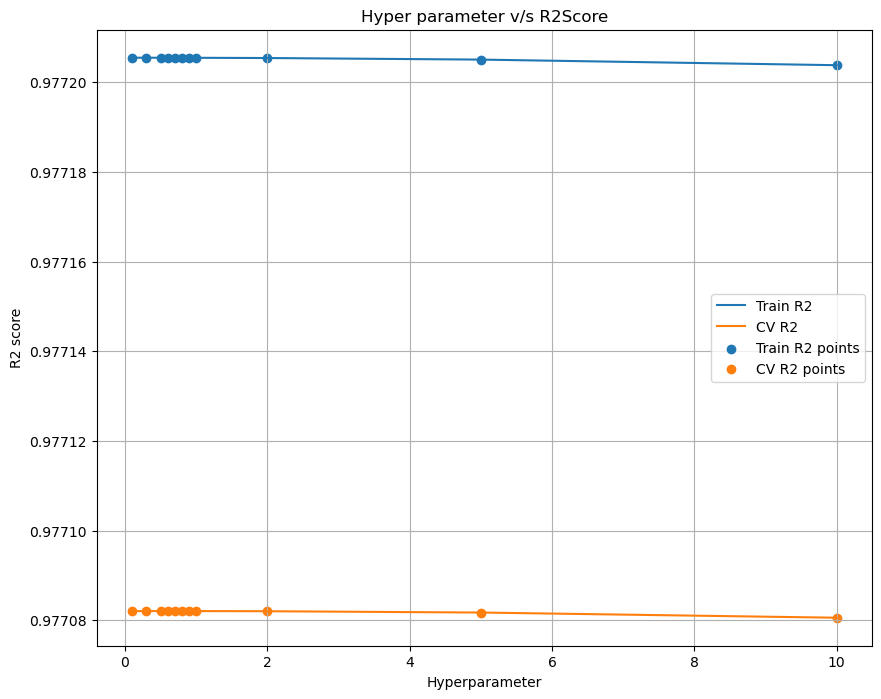

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.005581      0.001913         0.001694        0.000641         0.1   
1       0.004487      0.000499         0.001498        0.000493         0.3   
2       0.005987      0.001099         0.001396        0.000490         0.5   
3       0.005304      0.001644         0.001089        0.000283         0.6   
4       0.004691      0.000895         0.001493        0.000498         0.7   

           params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.1}           0.977996           0.977533            0.97637   
1  {'alpha': 0.3}           0.977996           0.977533            0.97637   
2  {'alpha': 0.5}           0.977996           0.977533            0.97637   
3  {'alpha': 0.6}           0.977996           0.977533            0.97637   
4  {'alpha': 0.7}           0.977996           0.977533            0.97637   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.975796            0.97419           0.978586           0.976467   
1           0.975796            0.97419           0.978586           0.976467   
2           0.975797            0.97419           0.978586           0.976468   
3           0.975797            0.97419           0.978586           0.976468   
4           0.975797            0.97419           0.978586           0.976468   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.979481           0.977802           0.976598         0.977082   
1           0.979481           0.977802           0.976598         0.977082   
2           0.979481           0.977802           0.976598         0.977082   
3           0.979481           0.977802           0.976598         0.977082   
4           0.979481           0.977803           0.976598         0.977082   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001439                8            0.977111            0.977162   
1        0.001439                5            0.977111            0.977162   
2        0.001439                2            0.977111            0.977162   
3        0.001439                1            0.977111            0.977162   
4        0.001439                3            0.977111            0.977162   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.977294            0.977343            0.977504   
1            0.977294            0.977343            0.977504   
2            0.977294            0.977343            0.977504   
3            0.977294            0.977343            0.977504   
4            0.977294            0.977343            0.977504   

   split5_train_score  split6_train_score  split7_train_score  \
0             0.97704             0.97728            0.976929   
1             0.97704             0.97728            0.976929   
2             0.97704             0.97728            0.976929   
3             0.97704             0.97728            0.976929   
4             0.97704             0.97728            0.976929   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.977126            0.977265          0.977205         0.000157  
1            0.977126            0.977265          0.977205         0.000157  
2            0.977126            0.977265          0.977205         0.000157  
3            0.977126            0.977265          0.977205         0.000157  
4            0.977126            0.977265          0.977205         0.000157

In [602]:
results_set = pd.DataFrame.from_dict(ridge_grid.cv_results_)#creating a dataframe of results_set which will hold the cv_results value 
results_set = results_set.sort_values(['param_alpha'])
train_r2_score= results_set['mean_train_score'] 
cv_r2_score = results_set['mean_test_score'] 
alpha_set = results_set['param_alpha']

#plot the graph of train_r2 and cv_r2
plt.figure(figsize=(10,8))
plt.plot(alpha_set, train_r2_score, label='Train R2')
plt.plot(alpha_set, cv_r2_score, label='CV R2')
plt.scatter(alpha_set, train_r2_score, label='Train R2 points') 
plt.scatter(alpha_set, cv_r2_score, label='CV R2 points')
plt.legend() 
plt.xlabel("Hyperparameter")
plt.ylabel("R2 score")
plt.title("Hyper parameter v/s R2Score") 
plt.grid() 
plt.show()
results_set.head()


In [603]:
def check_performance(model):
    print("Train_R_squared =",model.best_estimator_.score(X_train_lr, y_train)) 
    print("Test_R_squared =", model.best_estimator_.score(X_test_lr, y_test))  
    print("RMSE_train =", np.sqrt(mean_squared_error(y_train, model.best_estimator_.predict(X_train_lr))))
    print("RMSE_test = ", np.sqrt(mean_squared_error(y_test, model.best_estimator_.predict(X_test_lr))))
    return model.best_estimator_.score(X_train_lr, y_train),model.best_estimator_.score(X_test_lr, y_test)

In [604]:
Ridge_R2_train,Ridge_R2_test=check_performance(ridge_random)

Train_R_squared = 0.977202725207129
Test_R_squared = 0.9782672108165221
RMSE_train = 1758.227590310114
RMSE_test =  1698.245992876077


In [605]:
Ridge_R2_train_g,Ridge_R2_test_g=check_performance(ridge_grid)

Train_R_squared = 0.977202724713864
Test_R_squared = 0.9782672104275649
RMSE_train = 1758.2276093315113
RMSE_test =  1698.2460080730486


In [606]:
ridge_g=Lasso(random_state=23)
ridge_g.fit(X_train,y_train)


Lasso(random_state=23)

In [607]:

for col, col_name in enumerate(X_train_lr.columns):
    print("The coefficient for {} is {}".format(col_name, ridge_g.coef_[col]))

The coefficient for num_refill_req_l3m is -6.2738047013287295
The coefficient for transport_issue_l1y is -364.11744737211404
The coefficient for Competitor_in_mkt is -6.834319131769438
The coefficient for retail_shop_num is -11.358113168477415
The coefficient for distributor_num is 18.599425019125775
The coefficient for dist_from_hub is 15.119397761540078
The coefficient for workers_num is 2.043351148984643
The coefficient for wh_est_year is 358.1720747585647
The coefficient for storage_issue_reported_l3m is 11783.508833025262
The coefficient for wh_breakdown_l3m is -365.694888994413
The coefficient for govt_check_l3m is -0.3958019610743815
The coefficient for Location_type is -77.49500268994844
The coefficient for WH_capacity_size is -8.500422911822485
The coefficient for zone is -1.85946234219371
The coefficient for wh_owner_type is -2.703329732370867
The coefficient for approved_wh_govt_certificate is 13.769513319764096
The coefficient for flood_impacted is -110.64421942592688
The c

## **LASSO Regression**

In [608]:
param_grid = {'alpha':np.logspace(-3,3)}
lasso = Lasso(random_state=23)
lasso_random = RandomizedSearchCV(estimator = lasso, param_distributions = param_grid, cv = 10,return_train_score=True)
lasso_random.fit(X_train_lr,y_train)
Lasso_hyper_random=lasso_random.best_params_
print("The best hyperparameter is {} with score of {}".format(Lasso_hyper_random,lasso_random.best_score_))

The best hyperparameter is {'alpha': 2.6826957952797246} with score of 0.9770886433686548


With RandomizedSearchCV the best hyperparameter for Lasso regression is alpha: 6.25 which has score of 0.977 We will try to tune the hyperparameter with GridSearch

In [609]:
%%time
#param_grid={'alpha':np.logspace(-4,3)}
param_grid = {'alpha':[1, 2, 5,6,7,8,9,10]}

lasso_g=Lasso(random_state=23)
lasso_grid=GridSearchCV(estimator = lasso_g,param_grid=param_grid, cv = 10,return_train_score=True)
lasso_grid.fit(X_train_lr,y_train)
Lasso_hyper_grid=lasso_grid.best_params_
print("The best hyperparameter is {} with score of {}".format(Lasso_hyper_grid,lasso_grid.best_score_))

The best hyperparameter is {'alpha': 7} with score of 0.9770933901943684
Wall time: 1.26 s


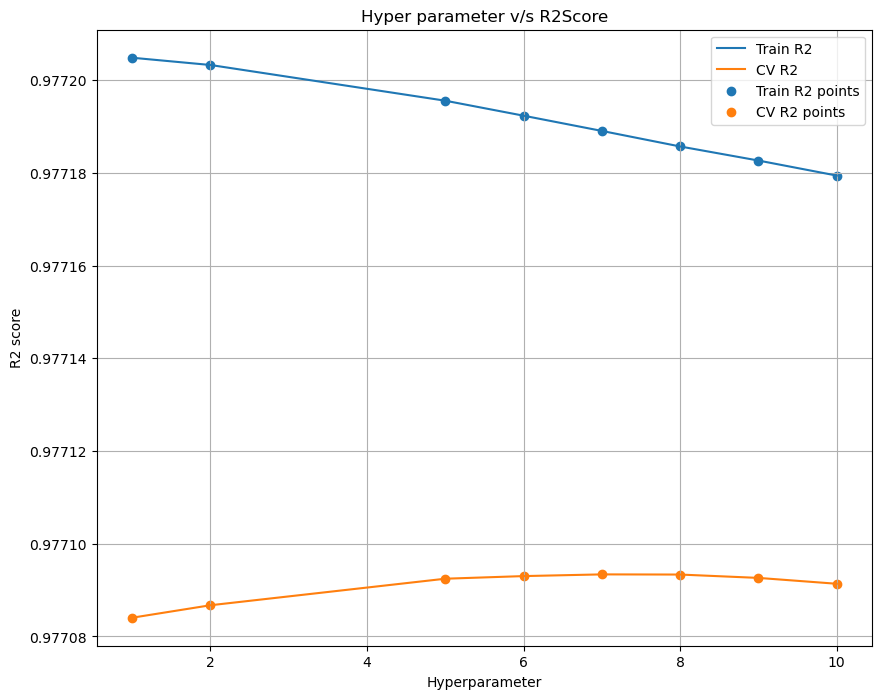

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.013012      0.002483         0.001696        0.000783           1   
1       0.012267      0.001996         0.001396        0.000660           2   
2       0.009772      0.001884         0.001496        0.000492           5   
3       0.011474      0.002792         0.002189        0.000865           6   
4       0.011870      0.002348         0.001696        0.000639           7   

         params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 1}           0.977996           0.977532           0.976375   
1  {'alpha': 2}           0.977997           0.977533           0.976379   
2  {'alpha': 5}           0.977999           0.977530           0.976387   
3  {'alpha': 6}           0.977999           0.977525           0.976389   
4  {'alpha': 7}           0.977998           0.977518           0.976391   

   split3_test_score  split4_test_score  split5_test_score  split6_test_score  \
0           0.975800           0.974193           0.978587           0.976470   
1           0.975803           0.974196           0.978592           0.976474   
2           0.975812           0.974196           0.978607           0.976484   
3           0.975814           0.974194           0.978612           0.976486   
4           0.975817           0.974194           0.978615           0.976490   

   split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0           0.979472           0.977812           0.976602         0.977084   
1           0.979467           0.977821           0.976605         0.977087   
2           0.979458           0.977837           0.976614         0.977092   
3           0.979458           0.977838           0.976616         0.977093   
4           0.979458           0.977838           0.976617         0.977093   

   std_test_score  rank_test_score  split0_train_score  split1_train_score  \
0        0.001437                8            0.977111            0.977161   
1        0.001436                7            0.977109            0.977160   
2        0.001435                5            0.977102            0.977151   
3        0.001435                3            0.977099            0.977148   
4        0.001435                1            0.977096            0.977144   

   split2_train_score  split3_train_score  split4_train_score  \
0            0.977293            0.977343            0.977503   
1            0.977292            0.977341            0.977502   
2            0.977284            0.977334            0.977494   
3            0.977280            0.977331            0.977491   
4            0.977276            0.977328            0.977488   

   split5_train_score  split6_train_score  split7_train_score  \
0            0.977040            0.977279            0.976929   
1            0.977039            0.977278            0.976927   
2            0.977032            0.977270            0.976921   
3            0.977028            0.977267            0.976918   
4            0.977024            0.977265            0.976915   

   split8_train_score  split9_train_score  mean_train_score  std_train_score  
0            0.977125            0.977264          0.977205         0.000157  
1            0.977124            0.977262          0.977203         0.000157  
2            0.977114            0.977255          0.977196         0.000157  
3            0.977111            0.977251          0.977192         0.000156  
4            0.977107            0.977247          0.977189         0.000156

In [610]:
results_set = pd.DataFrame.from_dict(lasso_grid.cv_results_)#creating a dataframe of results_set which will hold the cv_results value 
results_set = results_set.sort_values(['param_alpha'])
train_r2_score= results_set['mean_train_score'] 
cv_r2_score = results_set['mean_test_score'] 
alpha_set = results_set['param_alpha']

#plot the graph of train_r2 and cv_r2
plt.figure(figsize=(10,8))
plt.plot(alpha_set, train_r2_score, label='Train R2')
plt.plot(alpha_set, cv_r2_score, label='CV R2')
plt.scatter(alpha_set, train_r2_score, label='Train R2 points') 
plt.scatter(alpha_set, cv_r2_score, label='CV R2 points')
plt.legend() 
plt.xlabel("Hyperparameter")
plt.ylabel("R2 score")
plt.title("Hyper parameter v/s R2Score") 
plt.grid() 
plt.show()
results_set.head()

In [611]:
Lasso_R2_train,Lasso_R2_test=check_performance(lasso_random)

Train_R_squared = 0.9771987505529225
Test_R_squared = 0.9782638733480642
RMSE_train = 1758.380855166928
RMSE_test =  1698.3763862831026


In [612]:
Lasso_R2_train_g,Lasso_R2_test_g=check_performance(lasso_grid)

Train_R_squared = 0.9771863179627023
Test_R_squared = 0.9782583987182794
RMSE_train = 1758.8601764751154
RMSE_test =  1698.5902559551746


In [613]:
lasso_g.fit(X_train,y_train)


Lasso(random_state=23)

In [614]:
for col, col_name in enumerate(X_train_lr.columns):
    print("The coefficient for {} is {}".format(col_name, lasso_g.coef_[col]))

The coefficient for num_refill_req_l3m is -6.2738047013287295
The coefficient for transport_issue_l1y is -364.11744737211404
The coefficient for Competitor_in_mkt is -6.834319131769438
The coefficient for retail_shop_num is -11.358113168477415
The coefficient for distributor_num is 18.599425019125775
The coefficient for dist_from_hub is 15.119397761540078
The coefficient for workers_num is 2.043351148984643
The coefficient for wh_est_year is 358.1720747585647
The coefficient for storage_issue_reported_l3m is 11783.508833025262
The coefficient for wh_breakdown_l3m is -365.694888994413
The coefficient for govt_check_l3m is -0.3958019610743815
The coefficient for Location_type is -77.49500268994844
The coefficient for WH_capacity_size is -8.500422911822485
The coefficient for zone is -1.85946234219371
The coefficient for wh_owner_type is -2.703329732370867
The coefficient for approved_wh_govt_certificate is 13.769513319764096
The coefficient for flood_impacted is -110.64421942592688
The c

In [615]:
## None of the coefficients magnitude  have been reduced to absolute zero.

**Make 3 models using ANN, Decision Tree, Random Forest

- Check Train and Test RMSE
- Check Train and Test Scores

In [616]:
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [617]:
annr = MLPRegressor(hidden_layer_sizes=(500),random_state=123, max_iter=1000)#you are free to tweak the layer sizes
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)


models=[dtr,rfr,annr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:
    i.fit(X_train_lr,y_train)
    scores_train.append(i.score(X_train_lr, y_train))
    scores_test.append(i.score(X_test_lr, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(X_train_lr))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(X_test_lr))))
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Decision Tree Regressor','Random Forest Regressor', 'ANN Regressor']))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


                         Train RMSE    Test RMSE  Training Score  Test Score
Decision Tree Regressor    0.000000  1248.253746        1.000000    0.988259
Random Forest Regressor  353.200041   907.449603        0.999080    0.993795
ANN Regressor            998.389317   978.200772        0.992649    0.992789


In [618]:
rfr.fit(X_train_lr,y_train)

RandomForestRegressor(random_state=123)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


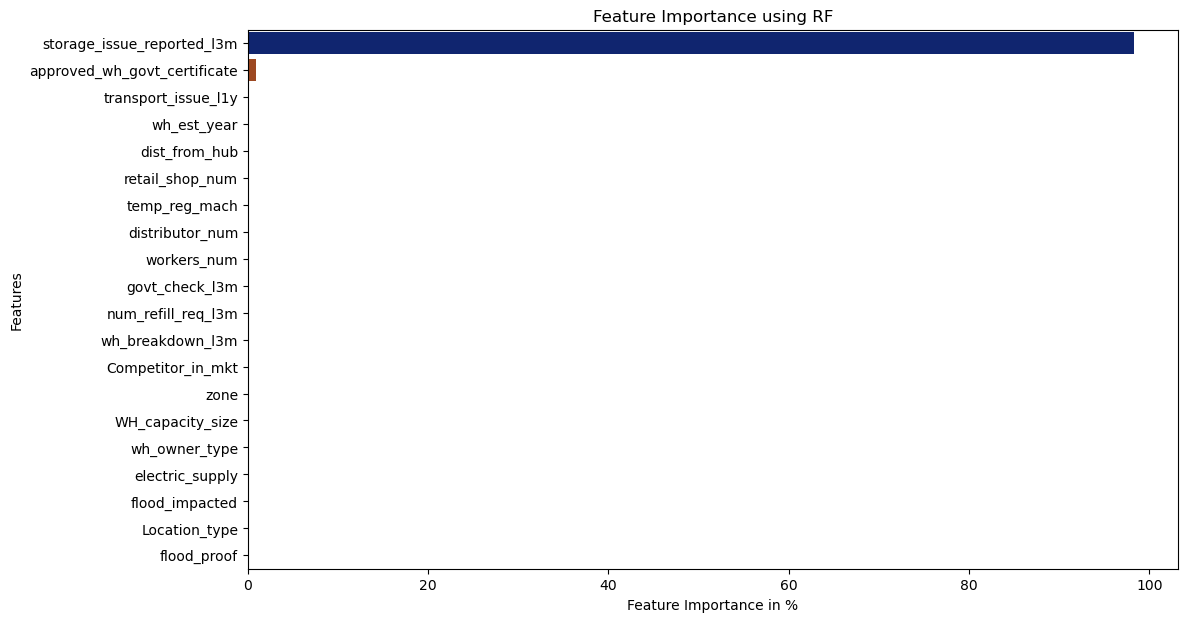

In [619]:
x=pd.DataFrame(rfr.feature_importances_*100,index=X_train_lr.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()


In [620]:
print (pd.DataFrame(rfr.feature_importances_*100, columns = ["Imp"], index = X_train_lr.columns).sort_values('Imp',ascending=False))

                                    Imp
storage_issue_reported_l3m    98.259466
approved_wh_govt_certificate   0.910555
transport_issue_l1y            0.098496
wh_est_year                    0.094650
dist_from_hub                  0.079226
retail_shop_num                0.077062
temp_reg_mach                  0.076513
distributor_num                0.073942
workers_num                    0.066566
govt_check_l3m                 0.061548
num_refill_req_l3m             0.060085
wh_breakdown_l3m               0.039527
Competitor_in_mkt              0.026851
zone                           0.019755
WH_capacity_size               0.016607
wh_owner_type                  0.011863
electric_supply                0.009832
flood_impacted                 0.007815
Location_type                  0.004970
flood_proof                    0.004672


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


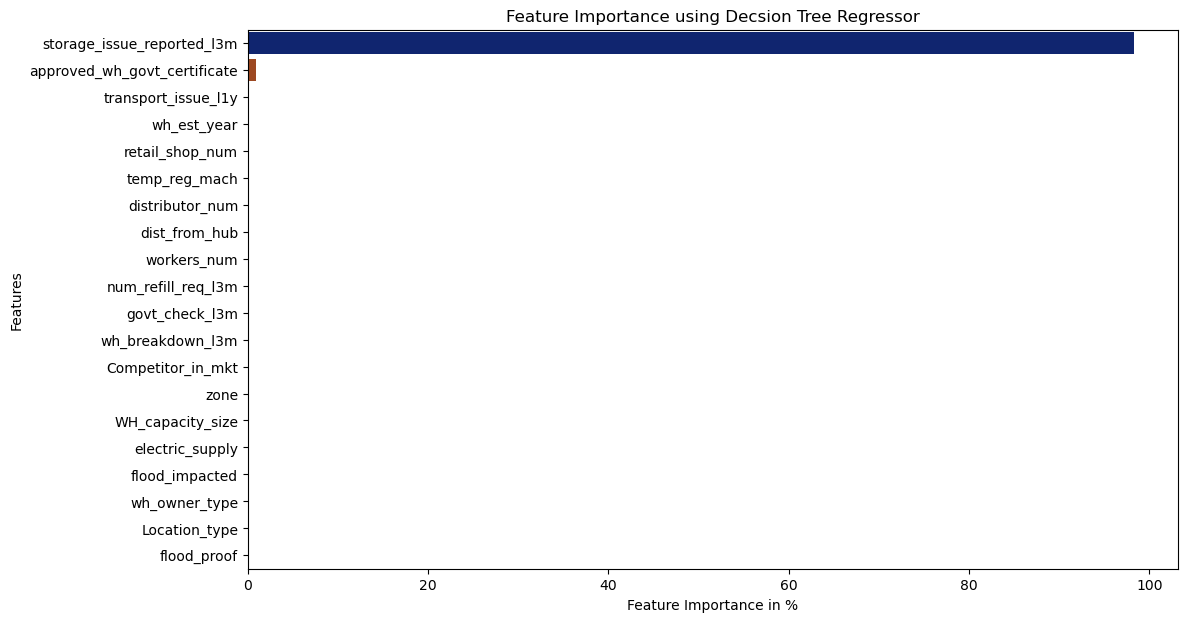

In [621]:
x=pd.DataFrame(dtr.feature_importances_*100,index=X_train_lr.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Decsion Tree Regressor')
plt.show()


In [ ]:
print (pd.DataFrame(dtr.feature_importances_*100, columns = ["Imp"], index = X_train_lr.columns).sort_values('Imp',ascending=False))

**Grid Search on Decision Tree**

In [ ]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search1 = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search1.fit(X_train_lr,y_train)

print(grid_search1.best_params_)


Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 40 You are welcome to try other values as well.

In [ ]:
grid_search1.score(X_train_lr, y_train)

In [ ]:
grid_search1.score(X_test_lr, y_test)

In [ ]:
y_train_predict = grid_search1.predict(X_train_lr)
y_train_predict

In [ ]:
y_test_predict = grid_search1.predict(X_test_lr)
y_test_predict

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_predict, squared=False)
rmse_train 

In [ ]:
rmse_test = mean_squared_error(y_test, y_test_predict, squared=False)
rmse_test

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

**Using Grid Search for Random Forest**

In [ ]:
%%time
param_grid = {'n_estimators': [int(x) for x in np.linspace(start = 50, stop = 1000, num = 10)],
              'max_depth' : np.linspace(7, 80, 10, endpoint=True),
              'min_samples_leaf' : [5,20,60], # 1-3% of length of dataset
              'min_samples_split' : [30, 50,100,150], # approx 3 times the min_samples_leaf
             }

RFR = RandomForestRegressor(random_state=123)

RF_random = RandomizedSearchCV(estimator = RFR, param_distributions = param_grid, cv = 10,return_train_score=True)

RF_random.fit(X_train_lr,y_train)
hyperparameter_RF=RF_random.best_params_
print("The best hyperparameter is {} with score of {}".format(hyperparameter_RF,RF_random.best_score_))

In [ ]:
RF_R2_train_grid,RF_R2_test_grid=check_performance(RF_random)

In [ ]:
y_train_predict = RF_random.predict(X_train_lr)
y_train_predict

In [ ]:
y_test_predict = RF_random.predict(X_test_lr)
y_test_predict

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

## Bagging using RandomForest

In [ ]:
from sklearn.ensemble import BaggingRegressor

In [ ]:
Bagging_model=BaggingRegressor(base_estimator=rfr,n_estimators=20,random_state=42)
Bagging_model.fit(X_train_lr, y_train)


In [ ]:
Bagging_model.score(X_train_lr, y_train)

In [ ]:
Bagging_model.score(X_test_lr, y_test)

In [ ]:
y_train_predict = Bagging_model.predict(X_train_lr)
y_train_predict

In [ ]:
y_test_predict = Bagging_model.predict(X_test_lr)
y_test_predict

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_predict, squared=False)
rmse_train 

In [ ]:
rmse_test = mean_squared_error(y_test, y_test_predict, squared=False)
rmse_test

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

## Ada Boost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ADB_model = AdaBoostRegressor(n_estimators=50,random_state=42)
ADB_model.fit(X_train_lr, y_train)


In [ ]:
ADB_model.score(X_train_lr, y_train)

In [ ]:
ADB_model.score(X_test_lr, y_test)

In [ ]:
y_train_predict = ADB_model.predict(X_train_lr)
y_train_predict

In [ ]:
y_test_predict = ADB_model.predict(X_test_lr)
y_test_predict

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_predict, squared=False)
rmse_train 

In [ ]:
rmse_test = mean_squared_error(y_test, y_test_predict, squared=False)
rmse_test

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

In [ ]:
x=pd.DataFrame(ADB_model.feature_importances_*100,index=X_train_lr.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Ada Boost')
plt.show()


In [ ]:
print (pd.DataFrame(ADB_model.feature_importances_*100, columns = ["Imp"], index = X_train_lr.columns).sort_values('Imp',ascending=False))

## Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train_lr, y_train)

In [ ]:
gbr.score(X_train_lr, y_train)

In [ ]:
gbr.score(X_test_lr, y_test)

In [ ]:
y_train_predict = gbr.predict(X_train_lr)
y_train_predict

In [ ]:
y_test_predict = gbr.predict(X_test_lr)
y_test_predict

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_predict, squared=False)
rmse_train 

In [ ]:
rmse_test = mean_squared_error(y_test, y_test_predict, squared=False)
rmse_test

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

In [ ]:
x=pd.DataFrame(gbr.feature_importances_*100,index=X_train_lr.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using Gradient Boost')
plt.show()


In [ ]:
print (pd.DataFrame(gbr.feature_importances_*100, columns = ["Imp"], index = X_train_lr.columns).sort_values('Imp',ascending=False))

## XGBoost 

In [622]:
import xgboost as xgb
xgb = xgb.XGBRegressor(max_depth = 5,
                              min_child_weight = 3,
                              learning_rate =0.01,
                              n_estimators=1000,random_state = 42)
xgb.fit(X_train_lr, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=3, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [623]:
X_train_lr.shape

(17500, 20)

In [624]:
xgb.score(X_train_lr, y_train)

0.9947327525526803

In [625]:
xgb.score(X_test_lr, y_test)

0.9944256224206287

In [626]:
y_train_predict_f = xgb.predict(X_train_lr)
y_train_predict_f

array([23387.574, 19595.1  , 38111.977, ...,  7902.851, 32770.14 ,
       28767.342], dtype=float32)

In [627]:
y_test_predict_f = xgb.predict(X_test_lr)
y_test_predict_f

array([31401.871 ,  6099.9805,  8268.617 , ..., 38036.63  , 38794.742 ,
       44769.855 ], dtype=float32)

In [946]:
y_test_predict_f - y_test

21492    -671.128906
9488     1027.980469
16933     212.617188
12604     479.101562
8222     1293.708984
9110      -66.404297
21196    -820.152344
17193     -28.574219
23846    -486.537109
10415     435.486328
9018    -1076.042969
24056    -675.359375
19992     293.979492
11464    -139.285156
10641    -181.435547
7192       82.517578
2164     -139.779297
2277     -948.728516
6038       91.191406
15100    1192.239746
12112      50.169922
23028     228.558594
23128     439.484375
21519     416.502930
5221    -1684.955078
15321     713.970703
17858     -69.875000
22558     598.289062
18400     124.601562
7385     -555.156250
24768     433.781250
6714      367.171875
18578    -609.179688
1368     1806.455078
15671   -2305.367188
1520      975.546875
18294    -859.110352
15013     612.015625
12764     765.726562
20818    -493.167969
9772     -951.541016
13025   -1378.021484
4829     -899.906250
7201    -1157.191406
23623    -300.027344
4599      936.462891
11818    -408.962402
7746      786

Text(0, 0.5, 'Residuals')

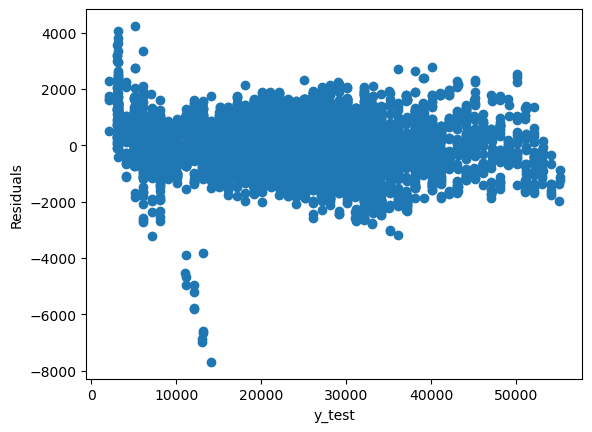

In [948]:
plt.scatter(y_test, y_test_predict_f - y_test)
plt.xlabel("y_test")
plt.ylabel("Residuals")

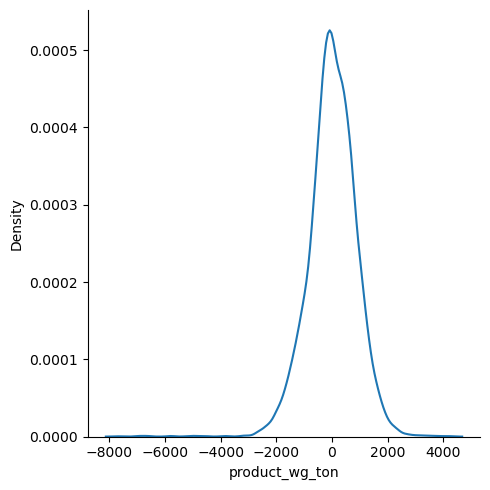

In [947]:
sns.displot(y_test_predict_f - y_test,kind='kde')

In [628]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_predict_f, squared=False)
rmse_train 

845.1338258528816

In [629]:
rmse_test = mean_squared_error(y_test, y_test_predict_f, squared=False)
rmse_test

860.0843711262555

Text(0, 0.5, 'y_train_predict')

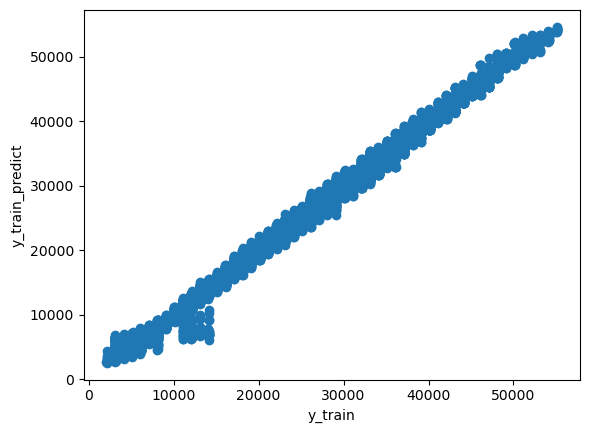

In [630]:
plt.scatter(y_train, y_train_predict_f)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

Text(0, 0.5, 'y_test_predict')

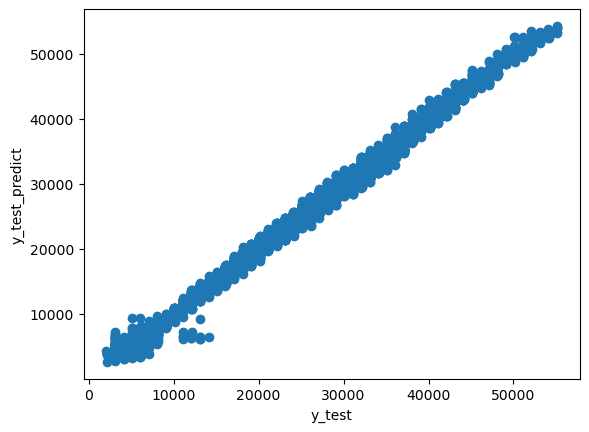

In [631]:
plt.scatter(y_test, y_test_predict_f)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


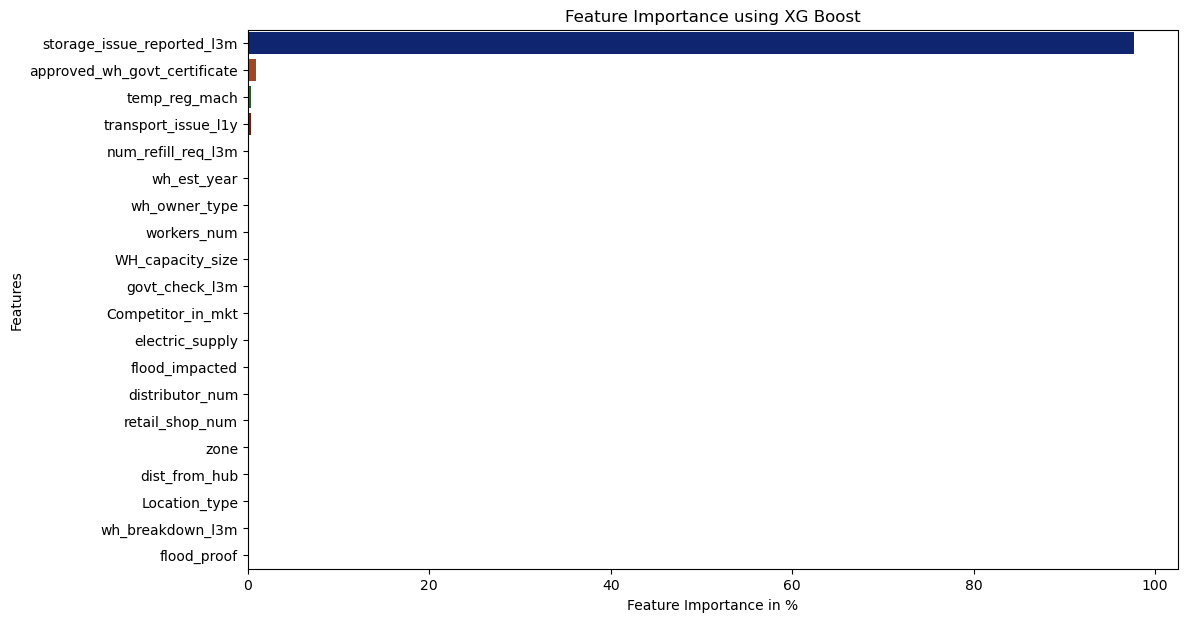

In [632]:
x=pd.DataFrame(xgb.feature_importances_*100,index=X_train_lr.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using XG Boost')
plt.show()


In [633]:
print (pd.DataFrame(xgb.feature_importances_*100, columns = ["Imp"], index = X_train_lr.columns).sort_values('Imp',ascending=False))

                                    Imp
storage_issue_reported_l3m    97.615845
approved_wh_govt_certificate   0.838673
temp_reg_mach                  0.394635
transport_issue_l1y            0.301790
num_refill_req_l3m             0.165332
wh_est_year                    0.135291
wh_owner_type                  0.083247
workers_num                    0.053700
WH_capacity_size               0.052012
govt_check_l3m                 0.046473
Competitor_in_mkt              0.042384
electric_supply                0.040590
flood_impacted                 0.039860
distributor_num                0.031403
retail_shop_num                0.030952
zone                           0.030498
dist_from_hub                  0.030220
Location_type                  0.025747
wh_breakdown_l3m               0.024897
flood_proof                    0.016455


In [634]:
print (pd.DataFrame(xgb.feature_importances_, columns = ["Imp"], index = X_train_lr.columns).sort_values('Imp',ascending=False))

                                   Imp
storage_issue_reported_l3m    0.976158
approved_wh_govt_certificate  0.008387
temp_reg_mach                 0.003946
transport_issue_l1y           0.003018
num_refill_req_l3m            0.001653
wh_est_year                   0.001353
wh_owner_type                 0.000832
workers_num                   0.000537
WH_capacity_size              0.000520
govt_check_l3m                0.000465
Competitor_in_mkt             0.000424
electric_supply               0.000406
flood_impacted                0.000399
distributor_num               0.000314
retail_shop_num               0.000310
zone                          0.000305
dist_from_hub                 0.000302
Location_type                 0.000257
wh_breakdown_l3m              0.000249
flood_proof                   0.000165


**Using Grid Search for ANN**

In [ ]:
param_grid = {
    'hidden_layer_sizes':[(500),(100,100)], 
    # keeping these simple because it would take too much time to run on low-end computers
    "activation": ["tanh", "relu"], 
    "solver": ["sgd", "adam"]}

annr = MLPRegressor(max_iter=10000, random_state=123,early_stopping=True)

grid_search3 = GridSearchCV(estimator = annr, param_grid = param_grid, cv = 3)

In [ ]:
grid_search3.fit(X_train_lr,y_train)

print(grid_search3.best_params_)

In [ ]:
#best_params_annr={'activation': 'relu', 'hidden_layer_sizes': 500, 'solver': 'sgd'}

In [ ]:
grid_search3.score(X_train_lr, y_train)

In [ ]:
grid_search3.score(X_test_lr, y_test)

In [ ]:
y_train_predict = grid_search3.predict(X_train_lr)
y_train_predict

In [ ]:
y_test_predict = grid_search3.predict(X_test_lr)
y_test_predict

In [ ]:
from sklearn.metrics import mean_squared_error

rmse_train = mean_squared_error(y_train, y_train_predict, squared=False)
rmse_train 

In [ ]:
rmse_test = mean_squared_error(y_test, y_test_predict, squared=False)
rmse_test

In [ ]:
plt.scatter(y_train, y_train_predict)
plt.xlabel("y_train")
plt.ylabel("y_train_predict")

In [ ]:
plt.scatter(y_test, y_test_predict)
plt.xlabel("y_test")
plt.ylabel("y_test_predict")

In [ ]:
lm17 = smf.ols(formula= 'product_wg_ton~storage_issue_reported_l3m+approved_wh_govt_certificate +temp_reg_mach+ transport_issue_l1y+ num_refill_req_l3m+wh_est_year' , data = data_train).fit()
lm17.params

In [1162]:
## Clean data 
df3 = pd.read_csv("C:/Users/Anshul/OneDrive/Desktop/Data Science GL/Capstone Project/Clean_Data.csv")

In [1163]:
df3.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                  1.0                  2   
1                   0                  0.0                  4   
2                   1                  0.0                  4   
3                   7                  2.5                  2   
4                   3                  1.0                  2   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0               24             91         29.0         2011   
1           6217.0               47            210         31.0         2017   
2           4306.0               64            161         37.0         2007   
3           6000.0               50            103         21.0         2011   
4           4740.0               42            112         25.0         2009   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m  \
0                          13               5.0              15   
1                           4               3.0              17   
2                          17               6.0              22   
3                          17               3.0              27   
4                          18               6.0              24   

   product_wg_ton Location_type WH_capacity_size   zone WH_regional_zone  \
0           17115        Urban             Small   West           Zone 6   
1            5074         Rural            Large  North           Zone 5   
2           23137         Rural              Mid  South           Zone 2   
3           22115         Rural              Mid  North           Zone 3   
4           24071         Rural            Large  North           Zone 5   

   wh_owner_type approved_wh_govt_certificate  flood_impacted  flood_proof  \
0         Rented                            A               0            1   
1  Company Owned                            A               0            0   
2  Company Owned                            A               0            0   
3         Rented                           A+               0            0   
4  Company Owned                            C               1            0   

   electric_supply  temp_reg_mach  
0                1              0  
1                1              0  
2                0              0  
3                0              1  
4                1              0

In [1164]:
df4 = df3.drop(["product_wg_ton","WH_regional_zone"],axis=1)

In [1165]:
df4.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
0                   3                  1.0                  2   
1                   0                  0.0                  4   
2                   1                  0.0                  4   
3                   7                  2.5                  2   
4                   3                  1.0                  2   

   retail_shop_num  distributor_num  dist_from_hub  workers_num  wh_est_year  \
0           4651.0               24             91         29.0         2011   
1           6217.0               47            210         31.0         2017   
2           4306.0               64            161         37.0         2007   
3           6000.0               50            103         21.0         2011   
4           4740.0               42            112         25.0         2009   

   storage_issue_reported_l3m  wh_breakdown_l3m  govt_check_l3m Location_type  \
0                          13               5.0              15        Urban    
1                           4               3.0              17         Rural   
2                          17               6.0              22         Rural   
3                          17               3.0              27         Rural   
4                          18               6.0              24         Rural   

  WH_capacity_size   zone  wh_owner_type approved_wh_govt_certificate  \
0            Small   West         Rented                            A   
1            Large  North  Company Owned                            A   
2              Mid  South  Company Owned                            A   
3              Mid  North         Rented                           A+   
4            Large  North  Company Owned                            C   

   flood_impacted  flood_proof  electric_supply  temp_reg_mach  
0               0            1                1              0  
1               0            0                1              0  
2               0            0                0              0  
3               0            0                0              1  
4               1            0                1              0

In [1166]:
df4.shape

(25000, 20)

In [1167]:
X= df4
y=df3["product_wg_ton"]

In [1168]:
X_trainf,X_testf,y_trainf,y_testf = train_test_split(X,y,test_size=0.3,random_state=1)

In [1169]:
X_trainf.head()

num_refill_req_l3m  transport_issue_l1y  Competitor_in_mkt  \
4289                    0                  2.0                  4   
19621                   6                  2.0                  3   
14965                   6                  0.0                  4   
12321                   6                  1.0                  3   
6269                    4                  2.5                  3   

       retail_shop_num  distributor_num  dist_from_hub  workers_num  \
4289            5031.0               43            127         32.0   
19621           7280.5               59            248         28.0   
14965           5625.0               39             63         27.0   
12321           4240.0               54            260         31.0   
6269            7280.5               23            144         36.0   

       wh_est_year  storage_issue_reported_l3m  wh_breakdown_l3m  \
4289          2007                          20               5.0   
19621         2003                          15               3.0   
14965         2000                          31               2.0   
12321         2006                          28               2.0   
6269          1997                          23               6.0   

       govt_check_l3m Location_type WH_capacity_size   zone  wh_owner_type  \
4289               14         Rural            Large   West         Rented   
19621              30         Rural            Small   West         Rented   
14965              11         Rural              Mid   West         Rented   
12321               2         Rural            Small  South  Company Owned   
6269               26        Urban               Mid   West  Company Owned   

      approved_wh_govt_certificate  flood_impacted  flood_proof  \
4289                             B               0            0   
19621                           A+               0            0   
14965                            B               0            0   
12321                            B               0            0   
6269                            B+               0            0   

       electric_supply  temp_reg_mach  
4289                 1              0  
19621                1              1  
14965                1              0  
12321                1              0  
6269                 1              0

In [1170]:
X_trainf.shape

(17500, 20)

In [1171]:
from sklearn.pipeline import Pipeline

In [1172]:
cat_features= ['Location_type','WH_capacity_size','zone','wh_owner_type','approved_wh_govt_certificate']
num_features = ['num_refill_req_l3m', 'transport_issue_l1y', 'Competitor_in_mkt',
       'retail_shop_num', 'distributor_num', 'dist_from_hub', 'workers_num',
       'wh_est_year', 'storage_issue_reported_l3m', 'wh_breakdown_l3m',
       'govt_check_l3m']

In [1173]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder

In [1174]:
List = {
    'Location_type': 
    {'Rural':0.0,
      'Urban ':1.0},    
    'WH_capacity_size': 
    {'Large':2.0, 
    "Mid" :1.0,
    "Small":0.0},
    "zone" :
    { "North":1.0,
     "West":3.0,
    "South":2.0,
    "East":0.0},
"wh_owner_type": 
    { "Company Owned":0.0,
     "Rented":1.0},
 "approved_wh_govt_certificate" :
    {"C":4.0,
 "B+":3.0,
"B":2.0,
"A":0.0,
"A+":1.0}}

In [1175]:
step_1 = ColumnTransformer([('categorical', OrdinalEncoder(handle_unknown='error'),[11,12,13,14,15])],remainder='passthrough')

In [1176]:
step_2 = ColumnTransformer([("scaling", StandardScaler(),[0,1,2,3,4,5,6,7,8,9,10,16,17,18,19])],remainder='passthrough')

In [1177]:
pipe =Pipeline([("step-1", step_1),("step-2",step_2),("model",xgb)])

In [1178]:
##visualize pipe
from sklearn import set_config

In [1179]:
set_config(display="diagram")

In [1180]:
pipe

Pipeline(steps=[('step-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  [11, 12, 13, 14, 15])])),
                ('step-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 16, 17, 18, 19])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_byle...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=42, ...))])

In [1181]:
##from sklearn.pipeline import make_pipeline

In [1182]:
##alternate
##pipe = make_pipeline(step_1,step_2, xgb)

In [1183]:
pipe.fit(X_trainf,y_trainf)

Pipeline(steps=[('step-1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('categorical',
                                                  OrdinalEncoder(),
                                                  [11, 12, 13, 14, 15])])),
                ('step-2',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaling', StandardScaler(),
                                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 16, 17, 18, 19])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_byle...
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.01,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=5, max_leaves=None, min_child_weight=3,
                              missing=nan, monotone_constraints=None,
                              n_estimators=1000, n_jobs=None,
                              num_parallel_tree=None, predictor=None,
                              random_state=42, ...))])

In [1184]:
pipe.named_steps

{'step-1': ColumnTransformer(remainder='passthrough',
                   transformers=[('categorical', OrdinalEncoder(),
                                  [11, 12, 13, 14, 15])]),
 'step-2': ColumnTransformer(remainder='passthrough',
                   transformers=[('scaling', StandardScaler(),
                                  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 16, 17, 18,
                                   19])]),
 'model': XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_chi

In [1204]:
y_pred_train = pipe.predict(X_trainf)
y_pred_train

array([23387.574, 19595.1  , 38111.977, ...,  7902.851, 32770.14 ,
       28767.342], dtype=float32)

In [1205]:
y_pred_train - y_trainf

4289      301.574219
19621     487.099609
14965     -13.023438
12321     954.976562
6269      742.587891
7370      791.675781
20922     951.933594
4485      129.521484
11502      16.765625
4704     -445.654297
22027   -1628.395508
1704      325.250977
14844    -782.738281
16368     297.311523
4294     -227.058838
9583     -238.496094
1285       65.248047
2395    -2436.593750
2574     -250.047852
10569    -679.308594
19784     343.316406
5692      607.412109
9592      871.361328
5013    -1294.353516
23996   -1154.816406
5476      368.400391
2819     -297.769531
11708      -2.533203
3105     1330.123047
22892     551.742188
12782     -54.429688
3239    -1661.697266
8357      754.589844
6091    -1007.828125
21322     616.292969
9830     -272.695312
11521    1080.518066
24717     761.187500
9336    -1956.398438
8236       62.482422
14596    1048.837891
24450     -62.740234
21075     606.889648
11371   -1416.292969
8942       38.481445
10048      65.714844
20347    1137.738281
12633      43

In [1206]:
y_pred_test = pipe.predict(X_testf)
y_pred_test

array([31401.871 ,  6099.9805,  8268.617 , ..., 38036.63  , 38794.742 ,
       44769.855 ], dtype=float32)

In [1209]:
mean_squared_error(y_trainf,y_pred_train,squared=False)

845.1338258528816

In [1216]:
mean_squared_error(y_testf,y_pred_test,squared=False)

860.1042793851313

In [1210]:
y_pred_test - y_testf

21492    -671.128906
9488     1027.980469
16933     212.617188
12604     479.101562
8222     1293.708984
9110      -66.404297
21196    -820.152344
17193     -28.574219
23846    -486.537109
10415     435.486328
9018    -1076.042969
24056    -675.359375
19992     293.979492
11464    -139.285156
10641    -181.435547
7192       82.517578
2164     -139.779297
2277     -948.728516
6038       91.191406
15100    1192.239746
12112      50.169922
23028     228.558594
23128     439.484375
21519     416.502930
5221    -1684.955078
15321     713.970703
17858     -69.875000
22558     598.289062
18400     124.601562
7385     -555.156250
24768     433.781250
6714      367.171875
18578    -609.179688
1368     1806.455078
15671   -2305.367188
1520      975.546875
18294    -859.110352
15013     612.015625
12764     765.726562
20818    -493.167969
9772     -951.541016
13025   -1378.021484
4829     -899.906250
7201    -1157.191406
23623    -300.027344
4599      936.462891
11818    -408.962402
7746      786

## Pickling the Model file for deployment

In [1211]:
import pickle

In [1212]:
pickle.dump(pipe,open("pipe.pkl",'wb'))

In [1213]:
pickled_model = pickle.load(open("pipe.pkl",'rb'))

In [1214]:
test_input = np.array([3,1.0,2,4651.0,24,91,29.0,2011,13,5.0,15,'Urban ','Small','West','Rented','A',0,1,1,0],dtype=object).reshape(1,20)

In [1215]:
pipe.predict(test_input)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but OrdinalEncoder was fitted with feature names
  warnings.warn(


array([17221.076], dtype=float32)